# **Sofifa adatok beállítása**

---



In [1]:
import numpy as np
import os
import tensorflow as tf
assert tf.__version__.startswith('2')
from google.colab import drive
import pandas as pd

In [2]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
fifa13df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/sofifa/sofifa13.csv')
fifa14df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/sofifa/sofifa14.csv')
fifa15df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/sofifa/sofifa15.csv')
fifa16df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/sofifa/sofifa16.csv')
fifa17df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/sofifa/sofifa17.csv')
fifa18df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/sofifa/sofifa18.csv')
fifa19df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/sofifa/sofifa19.csv')
fifa20df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/sofifa/sofifa20.csv')
fifa21df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/sofifa/sofifa21.csv')
fifa22df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data/sofifa/sofifa22.csv')


# **Fifa 22 adatelőkészítés**

---



klub adatok az adatbázis feltöltéshez

eltávolítottam a felesleges sorokat 

In [6]:
fifa22df = fifa22df.drop(['teams', 'web-scraper-order', 'web-scraper-start-url', 'teams-href'], axis='columns')

In [7]:
fifa22df.loc[fifa22df.OffenceWidth == 'Chance CreationPossession', 'OffenceWidth'] = 'Width5'

a hasznos sorokból kiszedtem a felesleges szövegeket(vagy általakítottam értelmezhető alakká, ha tartalmazott információt) és átalakítottam float vagy int típussá

In [8]:
fifa22df['MidfieldRating'] = fifa22df['MidfieldRating'].map(lambda x: x.rstrip('Midfield')).astype(float)
fifa22df['DefenceRating'] = fifa22df['DefenceRating'].map(lambda x: x.rstrip('Defence')).astype(float)
fifa22df['ClubWorth'] = fifa22df['ClubWorth'].map(lambda x: x.lstrip('Club Worth€'))
fifa22df['XIAverageAge'] = fifa22df['XIAverageAge'].map(lambda x: x.lstrip('Starting XI Average Age')).astype(float)
fifa22df['DefenceWidth'] = fifa22df['DefenceWidth'].map(lambda x: x.lstrip('Team Width')).astype(float)
fifa22df['DefenceDepth'] = fifa22df['DefenceDepth'].map(lambda x: x.lstrip('Depth')).astype(float)
fifa22df['OffenceWidth'] = fifa22df['OffenceWidth'].map(lambda x: x.lstrip('Width')).astype(float)

In [9]:
for idx in fifa22df.index: 
  if fifa22df.loc[idx, 'ClubWorth'].strip()[-1] == 'M':
    fifa22df.loc[idx, 'ClubWorth'] = float(fifa22df.loc[idx, 'ClubWorth'].rstrip('M'))
  elif fifa22df.loc[idx, 'ClubWorth'].strip()[-1] == 'B':
    fifa22df.loc[idx, 'ClubWorth'] = float(fifa22df.loc[idx, 'ClubWorth'].rstrip('B'))*1000

In [10]:
fifa22df['overall'] = fifa22df['overall'].astype(float)
fifa22df['AttackingRating'] = fifa22df['AttackingRating'].astype(float)
fifa22df['ClubWorth'] = fifa22df['ClubWorth'].astype(float)
fifa22df['Likes'] = fifa22df['Likes'].astype(float)
fifa22df['Dislikes'] = fifa22df['Dislikes'].astype(float)

In [11]:
fifa22df.head(20)

,name,overall,AttackingRating,MidfieldRating,DefenceRating,ClubWorth,XIAverageAge,DefenceWidth,DefenceDepth,OffenceWidth,Likes,Dislikes
0,Valencia CF,78.0,77.0,77.0,78.0,530.0,26.82,40.0,40.0,40.0,248.0,45.0
1,Sevilla FC,82.0,80.0,82.0,83.0,540.0,28.64,70.0,70.0,80.0,180.0,48.0
2,Real Madrid CF,84.0,83.0,86.0,83.0,3100.0,28.09,50.0,80.0,50.0,959.0,451.0
3,RCD Mallorca,74.0,75.0,74.0,73.0,6.8,26.73,50.0,50.0,60.0,49.0,14.0
4,Athletic Club de Bilbao,78.0,80.0,79.0,78.0,250.0,27.64,50.0,50.0,70.0,148.0,31.0
5,Levante Unión Deportiva,77.0,79.0,77.0,74.0,49.0,28.27,50.0,60.0,70.0,39.0,13.0
6,RC Celta de Vigo,76.0,80.0,76.0,75.0,110.0,28.45,70.0,60.0,40.0,62.0,11.0
7,Villarreal CF,80.0,83.0,79.0,79.0,370.0,27.09,60.0,50.0,60.0,123.0,36.0
8,Real Sociedad,80.0,82.0,80.0,77.0,150.0,25.18,40.0,50.0,60.0,146.0,31.0
9,Atlético de Madrid,84.0,84.0,84.0,83.0,1200.0,27.91,60.0,60.0,40.0,400.0,113.0


In [12]:
fifa22df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20 non-null     object 
 1   overall          20 non-null     float64
 2   AttackingRating  20 non-null     float64
 3   MidfieldRating   20 non-null     float64
 4   DefenceRating    20 non-null     float64
 5   ClubWorth        20 non-null     float64
 6   XIAverageAge     20 non-null     float64
 7   DefenceWidth     20 non-null     float64
 8   DefenceDepth     20 non-null     float64
 9   OffenceWidth     20 non-null     float64
 10  Likes            20 non-null     float64
 11  Dislikes         20 non-null     float64
dtypes: float64(11), object(1)
memory usage: 2.0+ KB


In [13]:
'''if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):
  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)
  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)'''

"if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):\n  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)\n  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)"

In [14]:
fifa_22_names = pd.DataFrame(fifa22df.name.unique(),columns = ['names'])
fifa_22_names

,names
0,Valencia CF
1,Sevilla FC
2,Real Madrid CF
3,RCD Mallorca
4,Athletic Club de Bilbao
5,Levante Unión Deportiva
6,RC Celta de Vigo
7,Villarreal CF
8,Real Sociedad
9,Atlético de Madrid


# **Fifa 21 adatelőkészítés**

---



eltávolítottam a felesleges sorokat 

In [15]:
fifa21df = fifa21df.drop(['teams', 'web-scraper-order', 'web-scraper-start-url', 'teams-href'], axis='columns')

In [16]:
fifa21df.loc[fifa21df.OffenceWidth == 'Chance CreationPossession', 'OffenceWidth'] = 'Width5'

a hasznos sorokból kiszedtem a felesleges szövegeket(vagy általakítottam értelmezhető alakká, ha tartalmazott információt) és átalakítottam float vagy int típussá

In [17]:
fifa21df['MidfieldRating'] = fifa21df['MidfieldRating'].map(lambda x: x.rstrip('Midfield')).astype(float)
fifa21df['DefenceRating'] = fifa21df['DefenceRating'].map(lambda x: x.rstrip('Defence')).astype(float)
fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.lstrip('Club Worth€'))
fifa21df['XIAverageAge'] = fifa21df['XIAverageAge'].map(lambda x: x.lstrip('Starting XI Average Age')).astype(float)
fifa21df['DefenceWidth'] = fifa21df['DefenceWidth'].map(lambda x: x.lstrip('Team Width')).astype(float)*10
fifa21df['DefenceDepth'] = fifa21df['DefenceDepth'].map(lambda x: x.lstrip('Depth')).astype(float)*10
fifa21df['OffenceWidth'] = fifa21df['OffenceWidth'].map(lambda x: x.lstrip('Width')).astype(float)*10
fifa21df.loc[7,'DefenceDepth'] = fifa21df.loc[7,'DefenceDepth']/10
fifa21df.loc[7,'DefenceWidth'] = fifa21df.loc[7,'DefenceWidth']/10

In [18]:
for idx in fifa21df.index: 
  if fifa21df.loc[idx, 'ClubWorth'].strip()[-1] == 'M':
    fifa21df.loc[idx, 'ClubWorth'] = float(fifa21df.loc[idx, 'ClubWorth'].rstrip('M'))
  elif fifa21df.loc[idx, 'ClubWorth'].strip()[-1] == 'B':
    fifa21df.loc[idx, 'ClubWorth'] = float(fifa21df.loc[idx, 'ClubWorth'].rstrip('B'))*1000

In [19]:
fifa21df.head(20)

,name,overall,AttackingRating,MidfieldRating,DefenceRating,ClubWorth,XIAverageAge,DefenceWidth,DefenceDepth,OffenceWidth,Likes,Dislikes
0,Real Valladolid CF,75,76,76.0,74.0,8.9,27.64,40.0,40.0,60.0,43,11
1,RC Celta de Vigo,75,80,75.0,75.0,110,26.55,70.0,60.0,40.0,61,10
2,Atlético de Madrid,83,85,82.0,83.0,1200,27.55,60.0,60.0,40.0,394,106
3,FC Barcelona,83,84,82.0,81.0,3200,25.45,60.0,80.0,30.0,1400,523
4,SD Huesca,73,73,73.0,73.0,4.5,27.18,60.0,50.0,60.0,22,6
5,CA Osasuna,76,76,77.0,75.0,15,27.55,70.0,70.0,60.0,27,2
6,Deportivo Alavés,76,77,74.0,76.0,13,28.73,50.0,30.0,70.0,44,15
7,Real Madrid CF,84,83,86.0,83.0,3100,28.09,50.0,80.0,50.0,937,443
8,Sevilla FC,81,80,81.0,82.0,540,27.45,70.0,70.0,80.0,177,48
9,Real Sociedad,79,81,81.0,77.0,150,25.64,40.0,50.0,60.0,140,30


In [20]:
fifa21df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20 non-null     object 
 1   overall          20 non-null     int64  
 2   AttackingRating  20 non-null     int64  
 3   MidfieldRating   20 non-null     float64
 4   DefenceRating    20 non-null     float64
 5   ClubWorth        20 non-null     object 
 6   XIAverageAge     20 non-null     float64
 7   DefenceWidth     20 non-null     float64
 8   DefenceDepth     20 non-null     float64
 9   OffenceWidth     20 non-null     float64
 10  Likes            20 non-null     int64  
 11  Dislikes         20 non-null     int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.0+ KB


In [21]:
'''if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):
  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)
  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)'''

"if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):\n  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)\n  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)"

In [22]:
fifa_21_names = pd.DataFrame(fifa21df.name.unique(),columns = ['names'])
fifa_21_names

,names
0,Real Valladolid CF
1,RC Celta de Vigo
2,Atlético de Madrid
3,FC Barcelona
4,SD Huesca
5,CA Osasuna
6,Deportivo Alavés
7,Real Madrid CF
8,Sevilla FC
9,Real Sociedad


# **Fifa 20 adatelőkészítés**

---



In [23]:
fifa20df = fifa20df.drop(['teams', 'web-scraper-order', 'web-scraper-start-url', 'teams-href'], axis='columns')

In [24]:
fifa20df['MidfieldRating'] = fifa20df['MidfieldRating'].map(lambda x: x.rstrip('Midfield')).astype(float)
fifa20df['DefenceRating'] = fifa20df['DefenceRating'].map(lambda x: x.rstrip('Defence')).astype(float)
fifa20df['ClubWorth'] = fifa20df['ClubWorth'].map(lambda x: x.lstrip('Club Worth€'))
fifa20df['XIAverageAge'] = fifa20df['XIAverageAge'].map(lambda x: x.lstrip('Starting XI Average Age')).astype(float)
fifa20df['DefenceWidth'] = fifa20df['DefenceWidth'].map(lambda x: x.lstrip('Team Width')).astype(float)*10
fifa20df['DefenceDepth'] = fifa20df['DefenceDepth'].map(lambda x: x.lstrip('Depth')).astype(float)*10
fifa20df['OffenceWidth'] = fifa20df['OffenceWidth'].map(lambda x: x.lstrip('Width')).astype(float)*10

In [25]:
for idx in fifa20df.index: 
  if fifa20df.loc[idx, 'ClubWorth'].strip()[-1] == 'M':
    fifa20df.loc[idx, 'ClubWorth'] = float(fifa20df.loc[idx, 'ClubWorth'].rstrip('M'))
  elif fifa20df.loc[idx, 'ClubWorth'].strip()[-1] == 'B':
    fifa20df.loc[idx, 'ClubWorth'] = float(fifa20df.loc[idx, 'ClubWorth'].rstrip('B'))*1000

In [26]:
fifa20df.head(20)

,name,overall,AttackingRating,MidfieldRating,DefenceRating,ClubWorth,XIAverageAge,DefenceWidth,DefenceDepth,OffenceWidth,Likes,Dislikes
0,RCD Mallorca,73,76,73.0,72.0,5.3,25.64,50.0,50.0,60.0,49,14
1,Real Betis Balompié,80,81,81.0,78.0,175,27.91,40.0,40.0,60.0,163,48
2,Real Valladolid CF,76,76,76.0,73.0,8.9,27.55,50.0,40.0,70.0,43,11
3,FC Barcelona,86,88,85.0,85.0,3500,27.82,60.0,80.0,30.0,1400,523
4,SD Eibar,77,77,78.0,75.0,29,29.36,50.0,80.0,60.0,34,8
5,CA Osasuna,74,76,74.0,74.0,15,27.64,70.0,70.0,60.0,27,2
6,Atlético de Madrid,83,81,83.0,82.0,1200,25.36,60.0,60.0,40.0,394,106
7,CD Leganés,75,75,75.0,75.0,10.8,27.64,40.0,70.0,70.0,27,11
8,Real Madrid CF,86,85,87.0,85.0,3500,28.27,50.0,80.0,50.0,937,443
9,Athletic Club de Bilbao,79,79,79.0,79.0,250,26.09,50.0,70.0,80.0,145,28


In [27]:
fifa_20_names = pd.DataFrame(fifa20df.name.unique(),columns = ['names'])
fifa_20_names

,names
0,RCD Mallorca
1,Real Betis Balompié
2,Real Valladolid CF
3,FC Barcelona
4,SD Eibar
5,CA Osasuna
6,Atlético de Madrid
7,CD Leganés
8,Real Madrid CF
9,Athletic Club de Bilbao


In [28]:
'''if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):
  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)
  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)'''

"if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):\n  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)\n  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)"

# **Fifa 19 adatelőkészítés**

---



In [29]:
fifa19df = fifa19df.drop(['teams', 'web-scraper-order', 'web-scraper-start-url', 'teams-href'], axis='columns')

In [30]:
fifa19df['MidfieldRating'] = fifa19df['MidfieldRating'].map(lambda x: x.rstrip('Midfield')).astype(float)
fifa19df['DefenceRating'] = fifa19df['DefenceRating'].map(lambda x: x.rstrip('Defence')).astype(float)
fifa19df['ClubWorth'] = fifa19df['ClubWorth'].map(lambda x: x.lstrip('Club Worth€'))
fifa19df['XIAverageAge'] = fifa19df['XIAverageAge'].map(lambda x: x.lstrip('Starting XI Average Age')).astype(float)
fifa19df['DefenceWidth'] = fifa19df['DefenceWidth'].map(lambda x: x.lstrip('Team Width')).astype(float)*10
fifa19df['DefenceDepth'] = fifa19df['DefenceDepth'].map(lambda x: x.lstrip('Depth')).astype(float)*10
fifa19df['OffenceWidth'] = fifa19df['OffenceWidth'].map(lambda x: x.lstrip('Width')).astype(float)*10

In [31]:
for idx in fifa19df.index: 
  if fifa19df.loc[idx, 'ClubWorth'].strip()[-1] == 'M':
    fifa19df.loc[idx, 'ClubWorth'] = float(fifa19df.loc[idx, 'ClubWorth'].rstrip('M'))
  elif fifa19df.loc[idx, 'ClubWorth'].strip()[-1] == 'B':
    fifa19df.loc[idx, 'ClubWorth'] = float(fifa19df.loc[idx, 'ClubWorth'].rstrip('B'))*1000

In [32]:
fifa19df.head(20)

,name,overall,AttackingRating,MidfieldRating,DefenceRating,ClubWorth,XIAverageAge,DefenceWidth,DefenceDepth,OffenceWidth,Likes,Dislikes
0,Athletic Club de Bilbao,79,80,80.0,78.0,250,26.73,50.0,50.0,50.0,145,28
1,RC Celta de Vigo,77,80,77.0,75.0,110,25.45,70.0,60.0,70.0,61,10
2,Getafe CF,77,79,75.0,78.0,35.4,26.36,40.0,50.0,50.0,50,19
3,FC Barcelona,86,87,86.0,85.0,3500,27.55,60.0,80.0,60.0,1400,523
4,RCD Espanyol de Barcelona,77,77,77.0,75.0,75,26.00,60.0,50.0,60.0,72,25
5,Rayo Vallecano,74,78,75.0,73.0,10,27.18,70.0,60.0,70.0,40,7
6,SD Huesca,72,74,73.0,72.0,4.5,26.73,60.0,60.0,60.0,22,6
7,Real Madrid CF,86,83,88.0,86.0,3500,26.73,50.0,80.0,50.0,937,443
8,Atlético de Madrid,84,85,83.0,84.0,1200,25.73,60.0,70.0,60.0,394,106
9,Villarreal CF,79,78,79.0,78.0,370,27.09,60.0,50.0,60.0,118,36


In [33]:
fifa_19_names = pd.DataFrame(fifa19df.name.unique(),columns = ['names'])
fifa_19_names

,names
0,Athletic Club de Bilbao
1,RC Celta de Vigo
2,Getafe CF
3,FC Barcelona
4,RCD Espanyol de Barcelona
5,Rayo Vallecano
6,SD Huesca
7,Real Madrid CF
8,Atlético de Madrid
9,Villarreal CF


In [34]:
'''if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):
  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)
  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)'''

"if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):\n  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)\n  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)"

# **Fifa 18 adatelőkészítés**

---



In [35]:
fifa18df = fifa18df.drop(['teams', 'web-scraper-order', 'web-scraper-start-url', 'teams-href'], axis='columns')

In [36]:
fifa18df['MidfieldRating'] = fifa18df['MidfieldRating'].map(lambda x: x.rstrip('Midfield')).astype(float)
fifa18df['DefenceRating'] = fifa18df['DefenceRating'].map(lambda x: x.rstrip('Defence')).astype(float)
fifa18df['ClubWorth'] = fifa18df['ClubWorth'].map(lambda x: x.lstrip('Club Worth€'))
fifa18df['XIAverageAge'] = fifa18df['XIAverageAge'].map(lambda x: x.lstrip('Starting XI Average Age')).astype(float)
fifa18df['DefenceWidth'] = fifa18df['DefenceWidth'].map(lambda x: x.lstrip('Team WidthNormal '))
fifa18df['DefenceWidth'] = fifa18df['DefenceWidth'].map(lambda x: x.lstrip('w')).astype(float)
fifa18df['DefenceDepth'] = fifa18df['DefenceDepth'].map(lambda x: x.lstrip('PressureMedium'))
fifa18df['DefenceDepth'] = fifa18df['DefenceDepth'].map(lambda x: x.lstrip('High'))
fifa18df['DefenceDepth'] = fifa18df['DefenceDepth'].map(lambda x: x.lstrip('Deep')).astype(float)
fifa18df['OffenceWidth'] = fifa18df['OffenceWidth'].map(lambda x: x.lstrip('CrossingNormal'))
fifa18df['OffenceWidth'] = fifa18df['OffenceWidth'].map(lambda x: x.lstrip('Lots'))
fifa18df['OffenceWidth'] = fifa18df['OffenceWidth'].map(lambda x: x.lstrip('ittle')).astype(float)

In [37]:
for idx in fifa18df.index: 
  if fifa18df.loc[idx, 'ClubWorth'].strip()[-1] == 'M':
    fifa18df.loc[idx, 'ClubWorth'] = float(fifa18df.loc[idx, 'ClubWorth'].rstrip('M'))
  elif fifa18df.loc[idx, 'ClubWorth'].strip()[-1] == 'B':
    fifa18df.loc[idx, 'ClubWorth'] = float(fifa18df.loc[idx, 'ClubWorth'].rstrip('B'))*1000

In [38]:
fifa18df.head(20)

,name,overall,AttackingRating,MidfieldRating,DefenceRating,ClubWorth,XIAverageAge,DefenceWidth,DefenceDepth,OffenceWidth,Likes,Dislikes
0,Málaga CF,75,75,75.0,75.0,105,26.91,35.0,44.0,47.0,86,25
1,RCD Espanyol de Barcelona,78,79,78.0,76.0,75,25.64,59.0,47.0,78.0,72,25
2,Athletic Club de Bilbao,79,81,79.0,78.0,250,27.18,42.0,43.0,68.0,145,28
3,Villarreal CF,79,79,79.0,80.0,370,25.73,56.0,48.0,38.0,118,36
4,CD Leganés,75,74,75.0,74.0,10.5,27.55,33.0,46.0,62.0,27,11
5,Deportivo de La Coruña,77,79,77.0,77.0,100,29.09,66.0,47.0,78.0,61,11
6,Real Madrid CF,86,86,86.0,86.0,3000,28.18,49.0,76.0,79.0,937,443
7,Atlético de Madrid,83,85,82.0,83.0,1200,26.64,69.0,68.0,39.0,394,106
8,Getafe CF,74,75,74.0,75.0,30.4,28.36,56.0,44.0,36.0,50,19
9,Unión Deportiva Las Palmas,75,77,74.0,75.0,38,25.82,38.0,47.0,55.0,48,8


In [39]:
fifa_18_names = pd.DataFrame(fifa18df.name.unique(),columns = ['names'])
fifa_18_names

,names
0,Málaga CF
1,RCD Espanyol de Barcelona
2,Athletic Club de Bilbao
3,Villarreal CF
4,CD Leganés
5,Deportivo de La Coruña
6,Real Madrid CF
7,Atlético de Madrid
8,Getafe CF
9,Unión Deportiva Las Palmas


In [40]:
'''if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):
  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)
  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)'''

"if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):\n  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)\n  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)"

# **Fifa 17 adatelőkészítés**

---



In [41]:
fifa17df = fifa17df.drop(['teams', 'web-scraper-order', 'web-scraper-start-url', 'teams-href'], axis='columns')

In [42]:
fifa17df['MidfieldRating'] = fifa17df['MidfieldRating'].map(lambda x: x.rstrip('Midfield')).astype(float)
fifa17df['DefenceRating'] = fifa17df['DefenceRating'].map(lambda x: x.rstrip('Defence')).astype(float)
fifa17df['ClubWorth'] = fifa17df['ClubWorth'].map(lambda x: x.lstrip('Club Worth€'))
fifa17df['XIAverageAge'] = fifa17df['XIAverageAge'].map(lambda x: x.lstrip('Starting XI Average Age')).astype(float)
fifa17df['DefenceWidth'] = fifa17df['DefenceWidth'].map(lambda x: x.lstrip('Team WidthNormal '))
fifa17df['DefenceWidth'] = fifa17df['DefenceWidth'].map(lambda x: x.lstrip('w')).astype(float)
fifa17df['DefenceDepth'] = fifa17df['DefenceDepth'].map(lambda x: x.lstrip('PressureMedium'))
fifa17df['DefenceDepth'] = fifa17df['DefenceDepth'].map(lambda x: x.lstrip('High'))
fifa17df['DefenceDepth'] = fifa17df['DefenceDepth'].map(lambda x: x.lstrip('Deep')).astype(float)
fifa17df['OffenceWidth'] = fifa17df['OffenceWidth'].map(lambda x: x.lstrip('CrossingNormal'))
fifa17df['OffenceWidth'] = fifa17df['OffenceWidth'].map(lambda x: x.lstrip('Lots'))
fifa17df['OffenceWidth'] = fifa17df['OffenceWidth'].map(lambda x: x.lstrip('ittle')).astype(float)

In [43]:
for idx in fifa17df.index: 
  if fifa17df.loc[idx, 'ClubWorth'].strip()[-1] == 'M':
    fifa17df.loc[idx, 'ClubWorth'] = float(fifa17df.loc[idx, 'ClubWorth'].rstrip('M'))
  elif fifa17df.loc[idx, 'ClubWorth'].strip()[-1] == 'B':
    fifa17df.loc[idx, 'ClubWorth'] = float(fifa17df.loc[idx, 'ClubWorth'].rstrip('B'))*1000

In [44]:
fifa17df.head(20)

,name,overall,AttackingRating,MidfieldRating,DefenceRating,ClubWorth,XIAverageAge,DefenceWidth,DefenceDepth,OffenceWidth,Likes,Dislikes
0,Unión Deportiva Las Palmas,77,77,79.0,76.0,38,26.27,57.0,53.0,24.0,48,8
1,Real Betis Balompié,76,79,76.0,74.0,175,24.55,58.0,60.0,56.0,163,48
2,Real Madrid CF,86,88,86.0,86.0,2700,27.18,63.0,67.0,55.0,937,443
3,RCD Espanyol de Barcelona,77,78,77.0,76.0,75,27.18,45.0,37.0,59.0,72,25
4,RC Celta de Vigo,78,79,79.0,78.0,110,25.18,55.0,41.0,42.0,61,10
5,Athletic Club de Bilbao,79,80,81.0,79.0,250,26.36,50.0,49.0,64.0,145,28
6,Deportivo Alavés,75,73,76.0,75.0,10.2,24.73,66.0,45.0,47.0,44,15
7,Real Sporting de Gijón,74,75,73.0,73.0,17,25.45,41.0,45.0,43.0,24,6
8,Valencia CF,78,78,79.0,79.0,613,26.00,53.0,49.0,57.0,243,45
9,Granada CF,74,78,73.0,72.0,55,24.18,62.0,41.0,58.0,45,10


In [45]:
fifa_17_names = pd.DataFrame(fifa17df.name.unique(),columns = ['names'])
fifa_17_names

,names
0,Unión Deportiva Las Palmas
1,Real Betis Balompié
2,Real Madrid CF
3,RCD Espanyol de Barcelona
4,RC Celta de Vigo
5,Athletic Club de Bilbao
6,Deportivo Alavés
7,Real Sporting de Gijón
8,Valencia CF
9,Granada CF


In [46]:
'''if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):
  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)
  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)'''

"if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):\n  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)\n  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)"

# **Fifa 16 adatelőkészítés**

---



In [47]:
fifa16df = fifa16df.drop(['teams', 'web-scraper-order', 'web-scraper-start-url', 'teams-href'], axis='columns')

In [48]:
fifa16df['MidfieldRating'] = fifa16df['MidfieldRating'].map(lambda x: x.rstrip('Midfield')).astype(float)
fifa16df['DefenceRating'] = fifa16df['DefenceRating'].map(lambda x: x.rstrip('Defence')).astype(float)
fifa16df['Transfer Budget'] = fifa16df['Transfer Budget'].map(lambda x: x.lstrip('Transfer Budget€'))
fifa16df['XIAverageAge'] = fifa16df['XIAverageAge'].map(lambda x: x.lstrip('Starting XI Average Age')).astype(float)
fifa16df['DefenceWidth'] = fifa16df['DefenceWidth'].map(lambda x: x.lstrip('Team WidthNormal ')).astype(float)
fifa16df['DefenceDepth'] = fifa16df['DefenceDepth'].map(lambda x: x.lstrip('PressureMedium')).astype(float)
fifa16df['OffenceWidth'] = fifa16df['OffenceWidth'].map(lambda x: x.lstrip('CrossingNormal')).astype(float)

In [49]:
fifa16df.rename(columns = {'Transfer Budget': 'ClubWorth'},inplace=True)

In [50]:
for idx in fifa16df.index: 
  if fifa16df.loc[idx, 'ClubWorth'].strip()[-1] == 'M':
    fifa16df.loc[idx, 'ClubWorth'] = float(fifa16df.loc[idx, 'ClubWorth'].rstrip('M'))*30
  elif fifa16df.loc[idx, 'ClubWorth'].strip()[-1] == 'B':
    fifa16df.loc[idx, 'ClubWorth'] = float(fifa16df.loc[idx, 'ClubWorth'].rstrip('B'))*1000*30

In [51]:
fifa16df.head(20)

,name,overall,AttackingRating,MidfieldRating,DefenceRating,ClubWorth,XIAverageAge,DefenceWidth,DefenceDepth,OffenceWidth,Likes,Dislikes
0,Rayo Vallecano,75,75,75.0,74.0,120,27.73,63.0,54.0,44.0,40,7
1,Real Sporting de Gijón,73,73,74.0,73.0,84,24.18,41.0,45.0,59.0,24,6
2,RC Celta de Vigo,76,77,76.0,76.0,210,26.45,59.0,55.0,48.0,61,10
3,Málaga CF,76,75,76.0,75.0,210,27.36,52.0,47.0,40.0,86,25
4,RCD Espanyol de Barcelona,75,76,75.0,74.0,195,25.00,45.0,37.0,60.0,72,25
5,Getafe CF,74,73,75.0,74.0,186,27.18,49.0,43.0,39.0,50,19
6,Granada CF,74,73,73.0,74.0,183,25.64,62.0,48.0,63.0,45,10
7,Sevilla FC,79,79,80.0,80.0,1035,26.27,59.0,42.0,52.0,177,48
8,FC Barcelona,84,91,85.0,82.0,3000,28.36,65.0,61.0,49.0,1400,523
9,Athletic Club de Bilbao,79,78,78.0,78.0,360,26.64,50.0,49.0,60.0,145,28


In [52]:
fifa_16_names = pd.DataFrame(fifa16df.name.unique(),columns = ['names'])
fifa_16_names

,names
0,Rayo Vallecano
1,Real Sporting de Gijón
2,RC Celta de Vigo
3,Málaga CF
4,RCD Espanyol de Barcelona
5,Getafe CF
6,Granada CF
7,Sevilla FC
8,FC Barcelona
9,Athletic Club de Bilbao


In [53]:
'''if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):
  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)
  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)'''

"if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):\n  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)\n  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)"

# **Fifa 15 adatelőkészítés**

---



In [54]:
fifa15df = fifa15df.drop(['teams', 'web-scraper-order', 'web-scraper-start-url', 'teams-href'], axis='columns')

In [55]:
fifa15df['MidfieldRating'] = fifa15df['MidfieldRating'].map(lambda x: x.rstrip('Midfield')).astype(float)
fifa15df['DefenceRating'] = fifa15df['DefenceRating'].map(lambda x: x.rstrip('Defence')).astype(float)
fifa15df['Transfer Budget'] = fifa15df['Transfer Budget'].map(lambda x: x.lstrip('Transfer Budget€'))
fifa15df['XIAverageAge'] = fifa15df['XIAverageAge'].map(lambda x: x.lstrip('Starting XI Average Age')).astype(float)
fifa15df['DefenceWidth'] = fifa15df['DefenceWidth'].map(lambda x: x.lstrip('Team WidthNormal ')).astype(float)
fifa15df['DefenceDepth'] = fifa15df['DefenceDepth'].map(lambda x: x.lstrip('PressureMedium')).astype(float)
fifa15df['OffenceWidth'] = fifa15df['OffenceWidth'].map(lambda x: x.lstrip('CrossingNormal')).astype(float)

In [56]:
fifa15df.rename(columns = {'Transfer Budget': 'ClubWorth'},inplace=True)

In [57]:
for idx in fifa15df.index: 
  if fifa15df.loc[idx, 'ClubWorth'].strip()[-1] == 'M':
    fifa15df.loc[idx, 'ClubWorth'] = float(fifa15df.loc[idx, 'ClubWorth'].rstrip('M'))*30
  elif fifa15df.loc[idx, 'ClubWorth'].strip()[-1] == 'B':
    fifa15df.loc[idx, 'ClubWorth'] = float(fifa15df.loc[idx, 'ClubWorth'].rstrip('B'))*1000*30
  elif fifa15df.loc[idx, 'ClubWorth'].strip()[-1] == 'K':
    fifa15df.loc[idx, 'ClubWorth'] = float(fifa15df.loc[idx, 'ClubWorth'].rstrip('K'))/1000*30

In [58]:
fifa15df.head(20)

,name,overall,AttackingRating,MidfieldRating,DefenceRating,ClubWorth,XIAverageAge,DefenceWidth,DefenceDepth,OffenceWidth,Likes,Dislikes
0,Atlético de Madrid,80,81,78.0,79.0,1050,25.73,52.0,49.0,62.0,394,106
1,Villarreal CF,76,78,76.0,74.0,240,25.55,44.0,47.0,52.0,118,36
2,Getafe CF,73,72,73.0,69.0,219,25.73,49.0,43.0,39.0,50,19
3,Real Madrid CF,84,86,83.0,81.0,2850,26.64,63.0,52.0,41.0,937,443
4,Unión Deportiva Almería,72,73,70.0,71.0,150,25.18,45.0,37.0,54.0,32,5
5,Córdoba CF,71,72,71.0,70.0,12.6,25.36,52.0,38.0,59.0,9,0
6,Granada CF,73,72,74.0,72.0,150,26.64,62.0,48.0,63.0,45,10
7,FC Barcelona,84,88,85.0,81.0,2400,26.45,65.0,61.0,49.0,1400,523
8,Valencia CF,79,81,79.0,77.0,600,25.00,53.0,49.0,51.0,243,45
9,Athletic Club de Bilbao,77,77,77.0,77.0,315,26.36,50.0,49.0,60.0,145,28


In [59]:
fifa_15_names = pd.DataFrame(fifa15df.name.unique(),columns = ['names'])
fifa_15_names

,names
0,Atlético de Madrid
1,Villarreal CF
2,Getafe CF
3,Real Madrid CF
4,Unión Deportiva Almería
5,Córdoba CF
6,Granada CF
7,FC Barcelona
8,Valencia CF
9,Athletic Club de Bilbao


In [60]:
'''if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):
  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)
  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)'''

"if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):\n  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)\n  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)"

# **Fifa 14 adatelőkészítés**

---



In [61]:
fifa14df = fifa14df.drop(['teams', 'web-scraper-order', 'web-scraper-start-url', 'teams-href'], axis='columns')

In [62]:
fifa14df['MidfieldRating'] = fifa14df['MidfieldRating'].map(lambda x: x.rstrip('Midfield')).astype(float)
fifa14df['DefenceRating'] = fifa14df['DefenceRating'].map(lambda x: x.rstrip('Defence')).astype(float)
fifa14df['Transfer Budget'] = fifa14df['Transfer Budget'].map(lambda x: x.lstrip('Transfer Budget€'))
fifa14df['XIAverageAge'] = fifa14df['XIAverageAge'].map(lambda x: x.lstrip('Starting XI Average Age')).astype(float)
fifa14df['DefenceWidth'] = fifa14df['DefenceWidth'].map(lambda x: x.lstrip('Team WidthNormal ')).astype(float)
fifa14df['DefenceDepth'] = fifa14df['DefenceDepth'].map(lambda x: x.lstrip('PressureMedium')).astype(float)
fifa14df['OffenceWidth'] = fifa14df['OffenceWidth'].map(lambda x: x.lstrip('CrossingNormal'))
fifa14df['OffenceWidth'] = fifa14df['OffenceWidth'].map(lambda x: x.lstrip('Lots'))
fifa14df['OffenceWidth'] = fifa14df['OffenceWidth'].map(lambda x: x.lstrip('ittle')).astype(float)

In [63]:
fifa14df.rename(columns = {'Transfer Budget': 'ClubWorth'},inplace=True)

In [64]:
for idx in fifa14df.index: 
  if fifa14df.loc[idx, 'ClubWorth'].strip()[-1] == 'M':
    fifa14df.loc[idx, 'ClubWorth'] = float(fifa14df.loc[idx, 'ClubWorth'].rstrip('M'))*30
  elif fifa14df.loc[idx, 'ClubWorth'].strip()[-1] == 'B':
    fifa14df.loc[idx, 'ClubWorth'] = float(fifa14df.loc[idx, 'ClubWorth'].rstrip('B'))*1000*30
  elif fifa14df.loc[idx, 'ClubWorth'].strip()[-1] == 'K':
    fifa14df.loc[idx, 'ClubWorth'] = float(fifa14df.loc[idx, 'ClubWorth'].rstrip('K'))/1000*30

In [65]:
fifa14df.head(20)

,name,overall,AttackingRating,MidfieldRating,DefenceRating,ClubWorth,XIAverageAge,DefenceWidth,DefenceDepth,OffenceWidth,Likes,Dislikes
0,Levante Unión Deportiva,74,72,73.0,73.0,75,28.36,56.0,47.0,61.0,39,13
1,Real Madrid CF,84,88,83.0,82.0,2850,26.27,65.0,39.0,54.0,937,443
2,RC Celta de Vigo,73,74,72.0,71.0,108,25.45,65.0,42.0,68.0,61,10
3,Sevilla FC,76,78,75.0,75.0,540,25.91,55.0,38.0,57.0,177,48
4,Valencia CF,77,76,77.0,76.0,600,25.91,59.0,51.0,56.0,243,45
5,Real Sociedad,77,80,76.0,76.0,174,25.73,65.0,48.0,52.0,140,30
6,Real Betis Balompié,74,74,72.0,73.0,120,26.45,58.0,58.0,43.0,163,48
7,Unión Deportiva Almería,70,73,69.0,70.0,159,27.91,45.0,37.0,54.0,32,5
8,Athletic Club de Bilbao,76,77,78.0,75.0,285,25.73,65.0,37.0,68.0,145,28
9,Málaga CF,76,75,73.0,76.0,300,27.55,42.0,64.0,69.0,86,25


In [66]:
fifa_14_names = pd.DataFrame(fifa14df.name.unique(),columns = ['names'])
fifa_14_names

,names
0,Levante Unión Deportiva
1,Real Madrid CF
2,RC Celta de Vigo
3,Sevilla FC
4,Valencia CF
5,Real Sociedad
6,Real Betis Balompié
7,Unión Deportiva Almería
8,Athletic Club de Bilbao
9,Málaga CF


In [67]:
'''if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):
  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)
  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)'''

"if(fifa21df['ClubWorth'].str[-1:].all() == 'B'):\n  fifa21df['ClubWorth'] = fifa21df['ClubWorth'].map(lambda x: x.rstrip('B')).astype(float)\n  fifa21df = fifa21df.assign(ClubWorth=lambda x: x.ClubWorth*1000)"

# **Nevek gyűjtése**

---



In [68]:
fifateamnames = fifa_21_names.append([fifa_20_names,fifa_19_names,fifa_18_names,fifa_17_names,fifa_16_names,fifa_15_names,fifa_14_names])
fifateamnames.names.unique()

array(['Real Valladolid CF', 'RC Celta de Vigo', 'Atlético de Madrid',
       'FC Barcelona', 'SD Huesca', 'CA Osasuna', 'Deportivo Alavés',
       'Real Madrid CF', 'Sevilla FC', 'Real Sociedad',
       'Levante Unión Deportiva', 'Elche CF', 'Real Betis Balompié',
       'Villarreal CF', 'Athletic Club de Bilbao', 'Cádiz CF',
       'Granada CF', 'Getafe CF', 'Valencia CF', 'SD Eibar',
       'RCD Mallorca', 'CD Leganés', 'RCD Espanyol de Barcelona',
       'Rayo Vallecano', 'Girona FC', 'Málaga CF',
       'Deportivo de La Coruña', 'Unión Deportiva Las Palmas',
       'Real Sporting de Gijón', 'Unión Deportiva Almería', 'Córdoba CF'],
      dtype=object)

Létrehoztam egy segédadathalmazt, ami a neveket köti össze, így könnyebb lesz az adathalmazok összefésülése

In [69]:
namehelp_df = pd.DataFrame(
    {'dataname':['Alaves'          , 'Almeria'               ,'Ath Bilbao'             , 'Atl. Madrid'      ,   'Barcelona', 'Betis'             ,'Cadiz CF', 'Celta Vigo'     , 'Cordoba'  , 'Dep. La Coruna'       , 'Eibar'  , 'Elche'  , 'Espanyol'                , 'Getafe'  , 'Gijon'                 , 'Girona'  , 'Granada CF', 'Huesca'  , 'Las Palmas'               , 'Leganes'  , 'Levante'               , 'Malaga'  , 'Mallorca'   , 'Osasuna'  ,'Rayo Vallecano', 'Real Madrid'  ,'Real Sociedad', 'Sevilla'  , 'Valencia'  , 'Valladolid'       , 'Villarreal'  ],
    'fifaname':['Deportivo Alavés','Unión Deportiva Almería','Athletic Club de Bilbao','Atlético de Madrid','FC Barcelona','Real Betis Balompié','Cádiz CF','RC Celta de Vigo','Córdoba CF','Deportivo de La Coruña','SD Eibar','Elche CF','RCD Espanyol de Barcelona','Getafe CF','Real Sporting de Gijón','Girona FC', 'Granada CF','SD Huesca','Unión Deportiva Las Palmas','CD Leganés','Levante Unión Deportiva','Málaga CF','RCD Mallorca','CA Osasuna','Rayo Vallecano','Real Madrid CF','Real Sociedad','Sevilla FC','Valencia CF','Real Valladolid CF','Villarreal CF']
    })

In [70]:
namehelp_df

,dataname,fifaname
0,Alaves,Deportivo Alavés
1,Almeria,Unión Deportiva Almería
2,Ath Bilbao,Athletic Club de Bilbao
3,Atl. Madrid,Atlético de Madrid
4,Barcelona,FC Barcelona
5,Betis,Real Betis Balompié
6,Cadiz CF,Cádiz CF
7,Celta Vigo,RC Celta de Vigo
8,Cordoba,Córdoba CF
9,Dep. La Coruna,Deportivo de La Coruña


# **Adat betöltés**

---



az első modell készítéséhez használt adathalmaz, kiegészítve a modell jóslataival

In [71]:
df = pd.read_csv('/content/drive/MyDrive/aszakdoga/data//data2/neuralpredicted_data1.csv')

In [72]:
df.head()

,Unnamed: 0,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin,GoalDiff,winner,PredictedHomeOdds,PredictedDrawOdds,PredictedGuestOdds,PredictedWinner,HomeTeamWin,Draw,GuestTeamWin
0,0,03.12. 20:45Atl. MadridEspanyol0 - 0(0 - 0),Atl. Madrid,Espanyol,67.0,33.0,0,0,11,6,3,3,3,2,5,1,18,14,9,2,03.12.2016 20:45,1.25,5.75,13.00,3,3,0,0,4.000950,3.262679,2.309132,0,0.0,1.0,0.0
1,1,18.04. 20:00Real MadridMalaga3 - 1(1 - 0),Real Madrid,Malaga,65.0,35.0,3,1,12,11,6,2,6,7,0,2,23,15,4,3,18.04.2015 20:00,1.17,8.00,15.00,7,27,2,1,1.404612,4.280032,12.126101,1,1.0,0.0,0.0
2,2,29.04. 20:00Celta VigoMalaga1 - 0(0 - 0),Celta Vigo,Malaga,61.0,39.0,1,0,14,7,2,2,10,4,2,1,16,8,3,5,29.04.2015 20:00,1.67,3.90,5.25,22,20,1,1,2.669432,3.253222,3.514198,1,1.0,0.0,0.0
3,3,02.02. 21:00Ath BilbaoReal Madrid1 - 1(0 - 0),Ath Bilbao,Real Madrid,58.0,42.0,1,1,9,10,3,3,4,6,2,1,16,12,6,3,02.02.2014 21:00,4.75,4.20,1.62,15,17,0,0,2.518175,3.743417,3.217029,0,0.0,1.0,0.0
4,4,01.05. 12:00Ath BilbaoCelta Vigo2 - 1(1 - 1),Ath Bilbao,Celta Vigo,57.0,43.0,2,1,10,5,2,2,5,3,3,0,25,12,7,2,01.05.2016 12:00,1.83,3.50,4.33,1,0,1,1,3.757940,2.721227,2.620515,0,1.0,0.0,0.0


In [73]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True, errors='coerce')

In [74]:
df.head(10)

,Unnamed: 0,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin,GoalDiff,winner,PredictedHomeOdds,PredictedDrawOdds,PredictedGuestOdds,PredictedWinner,HomeTeamWin,Draw,GuestTeamWin
0,0,03.12. 20:45Atl. MadridEspanyol0 - 0(0 - 0),Atl. Madrid,Espanyol,67.0,33.0,0,0,11,6,3,3,3,2,5,1,18,14,9,2,2016-12-03 20:45:00,1.25,5.75,13.00,3,3,0,0,4.000950,3.262679,2.309132,0,0.0,1.0,0.0
1,1,18.04. 20:00Real MadridMalaga3 - 1(1 - 0),Real Madrid,Malaga,65.0,35.0,3,1,12,11,6,2,6,7,0,2,23,15,4,3,2015-04-18 20:00:00,1.17,8.00,15.00,7,27,2,1,1.404612,4.280032,12.126101,1,1.0,0.0,0.0
2,2,29.04. 20:00Celta VigoMalaga1 - 0(0 - 0),Celta Vigo,Malaga,61.0,39.0,1,0,14,7,2,2,10,4,2,1,16,8,3,5,2015-04-29 20:00:00,1.67,3.90,5.25,22,20,1,1,2.669432,3.253222,3.514198,1,1.0,0.0,0.0
3,3,02.02. 21:00Ath BilbaoReal Madrid1 - 1(0 - 0),Ath Bilbao,Real Madrid,58.0,42.0,1,1,9,10,3,3,4,6,2,1,16,12,6,3,2014-02-02 21:00:00,4.75,4.20,1.62,15,17,0,0,2.518175,3.743417,3.217029,0,0.0,1.0,0.0
4,4,01.05. 12:00Ath BilbaoCelta Vigo2 - 1(1 - 1),Ath Bilbao,Celta Vigo,57.0,43.0,2,1,10,5,2,2,5,3,3,0,25,12,7,2,2016-05-01 12:00:00,1.83,3.50,4.33,1,0,1,1,3.757940,2.721227,2.620515,0,1.0,0.0,0.0
5,5,21.09. 22:00ValladolidAtl. Madrid0 - 2(0 - 0),Valladolid,Atl. Madrid,49.0,51.0,0,2,12,15,2,6,3,7,7,2,14,16,2,6,2013-09-21 22:00:00,6.25,3.75,1.57,33,27,-2,-1,5.324813,4.480423,1.706427,-1,0.0,0.0,1.0
6,6,22.12. 19:45Real SociedadAtl. Madrid0 - 2(0 - 0),Real Sociedad,Atl. Madrid,59.0,41.0,0,2,6,8,1,3,3,2,2,3,17,22,5,5,2020-12-22 19:45:00,3.00,3.00,2.55,1,1,-2,-1,3.724333,2.965501,2.533375,-1,0.0,0.0,1.0
7,7,18.08. 17:00AlavesLevante1 - 0(0 - 0),Alaves,Levante,37.0,63.0,1,0,9,16,2,4,6,7,1,5,15,18,2,9,2019-08-18 17:00:00,2.30,3.40,3.20,4,1,1,1,2.342051,3.250520,3.638474,1,1.0,0.0,0.0
8,8,04.04. 20:30LevanteGijon0 - 0(0 - 0),Levante,Gijon,54.0,46.0,0,0,16,11,4,1,8,4,4,6,16,19,4,6,2016-04-04 20:30:00,2.10,3.40,3.50,1,4,0,0,1.658457,2.905106,14.567371,0,0.0,1.0,0.0
9,9,22.04. 12:00GironaEspanyol0 - 2(0 - 1),Girona,Espanyol,59.0,41.0,0,2,20,5,6,4,9,1,5,0,20,21,10,0,2018-04-22 12:00:00,2.04,3.25,4.00,2,6,-2,-1,3.867715,3.367103,2.065337,-1,0.0,0.0,1.0


In [75]:
df = df.dropna()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3038 entries, 0 to 3037
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          3038 non-null   int64         
 1   matches             3038 non-null   object        
 2   hometeamname        3038 non-null   object        
 3   guestteamname       3038 non-null   object        
 4   homepossession      3038 non-null   float64       
 5   guestpossession     3038 non-null   float64       
 6   homegoals           3038 non-null   int64         
 7   guestgoals          3038 non-null   int64         
 8   homegoalattempts    3038 non-null   int64         
 9   guestgoalattempts   3038 non-null   int64         
 10  homeshotsongoal     3038 non-null   int64         
 11  guestshotsongoal    3038 non-null   int64         
 12  homeshotsoffgoal    3038 non-null   int64         
 13  guestshotsoffgoal   3038 non-null   int64       

In [77]:
df.isnull().sum()

Unnamed: 0            0
matches               0
hometeamname          0
guestteamname         0
homepossession        0
guestpossession       0
homegoals             0
guestgoals            0
homegoalattempts      0
guestgoalattempts     0
homeshotsongoal       0
guestshotsongoal      0
homeshotsoffgoal      0
guestshotsoffgoal     0
homeblockedshots      0
guestblockedshots     0
homefreekicks         0
guestfreekicks        0
homecornerkicks       0
guestcornerkicks      0
date                  0
bethomewinodds        0
betdrawodds           0
betguestwinodds       0
homethrowin           0
guestthrowin          0
GoalDiff              0
winner                0
PredictedHomeOdds     0
PredictedDrawOdds     0
PredictedGuestOdds    0
PredictedWinner       0
HomeTeamWin           0
Draw                  0
GuestTeamWin          0
dtype: int64

# **+ sorok hozzáadása**

---



Létrehoztam a szezonok intervallumait

In [78]:
seasons_interval= pd.date_range("2012-07", periods=10, freq="A-JUL")
seasons_interval

DatetimeIndex(['2012-07-31', '2013-07-31', '2014-07-31', '2015-07-31',
               '2016-07-31', '2017-07-31', '2018-07-31', '2019-07-31',
               '2020-07-31', '2021-07-31'],
              dtype='datetime64[ns]', freq='A-JUL')

In [79]:
df['season'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
print(df['date'].max())
print(df['date'].min())

2021-05-23 21:00:00
2013-08-17 19:00:00


Beállítottam minden csapathoz a megfelelő szezont

In [81]:
for idx in df.index:
  if(seasons_interval[0] < df.loc[idx, 'date'] and df.loc[idx, 'date'] < seasons_interval[1]):
    df.loc[idx, 'season'] = 2013
  if(seasons_interval[1] < df.loc[idx, 'date'] and df.loc[idx, 'date'] < seasons_interval[2]):
    df.loc[idx, 'season'] = 2014
  if(seasons_interval[2] < df.loc[idx, 'date'] and df.loc[idx, 'date'] < seasons_interval[3]):
    df.loc[idx, 'season'] = 2015
  if(seasons_interval[3] < df.loc[idx, 'date'] and df.loc[idx, 'date'] < seasons_interval[4]):
    df.loc[idx, 'season'] = 2016
  if(seasons_interval[4] < df.loc[idx, 'date'] and df.loc[idx, 'date'] < seasons_interval[5]):
    df.loc[idx, 'season'] = 2017
  if(seasons_interval[5] < df.loc[idx, 'date'] and df.loc[idx, 'date'] < seasons_interval[6]):
    df.loc[idx, 'season'] = 2018
  if(seasons_interval[6] < df.loc[idx, 'date'] and df.loc[idx, 'date'] < seasons_interval[7]):
    df.loc[idx, 'season'] = 2019
  if(seasons_interval[7] < df.loc[idx, 'date'] and df.loc[idx, 'date'] < seasons_interval[8]):
    df.loc[idx, 'season'] = 2020
  if(seasons_interval[8] < df.loc[idx, 'date'] and df.loc[idx, 'date'] < seasons_interval[9]):
    df.loc[idx, 'season'] = 2021

megvizsgáltam, hogy minden szezon ugyanannyi meccset tartalmaz-e

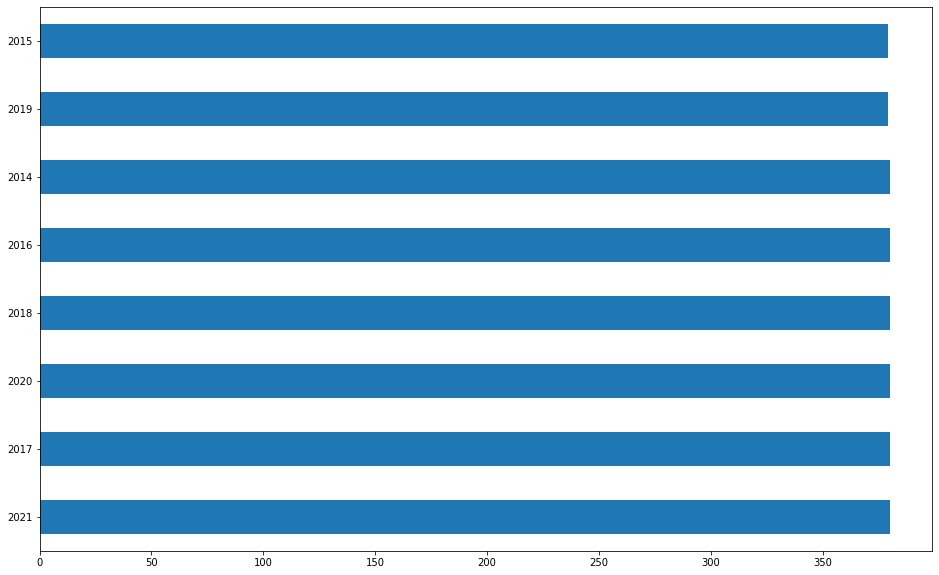

In [82]:
plt.figure(figsize=(16,10))
df.season.value_counts().plot(kind = 'barh')

Megnéztem, hogy ugyanannyi egyedi nevet tartalmaz e a fifa és a meccsek adatait tartalmazó adathalmaz, ezzel megbizonyosodva, arról, hogy az egyes szezonokban megvannak e szükséges adatok

In [83]:
print(len(df.hometeamname.unique()))
print(len(fifateamnames.names.unique()))

31
31


In [84]:
print(sorted(df.hometeamname.unique()))
print(sorted(fifateamnames.names.unique()))

['Alaves', 'Almeria', 'Ath Bilbao', 'Atl. Madrid', 'Barcelona', 'Betis', 'Cadiz CF', 'Celta Vigo', 'Cordoba', 'Dep. La Coruna', 'Eibar', 'Elche', 'Espanyol', 'Getafe', 'Gijon', 'Girona', 'Granada CF', 'Huesca', 'Las Palmas', 'Leganes', 'Levante', 'Malaga', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Madrid', 'Real Sociedad', 'Sevilla', 'Valencia', 'Valladolid', 'Villarreal']
['Athletic Club de Bilbao', 'Atlético de Madrid', 'CA Osasuna', 'CD Leganés', 'Cádiz CF', 'Córdoba CF', 'Deportivo Alavés', 'Deportivo de La Coruña', 'Elche CF', 'FC Barcelona', 'Getafe CF', 'Girona FC', 'Granada CF', 'Levante Unión Deportiva', 'Málaga CF', 'RC Celta de Vigo', 'RCD Espanyol de Barcelona', 'RCD Mallorca', 'Rayo Vallecano', 'Real Betis Balompié', 'Real Madrid CF', 'Real Sociedad', 'Real Sporting de Gijón', 'Real Valladolid CF', 'SD Eibar', 'SD Huesca', 'Sevilla FC', 'Unión Deportiva Almería', 'Unión Deportiva Las Palmas', 'Valencia CF', 'Villarreal CF']


In [85]:
df['home_overall'] = 0
df['away_overall'] = 0
df['home_AttackingRating'] = 0
df['away_AttackingRating'] = 0
df['home_MidfieldRating'] = 0
df['away_MidfieldRating'] = 0
df['home_DefenceRating'] = 0
df['away_DefenceRating'] = 0
df['home_ClubWorth'] = 0
df['away_ClubWorth'] = 0
df['home_XIAverageAge'] = 0
df['away_XIAverageAge'] = 0
df['home_DefenceWidth'] = 0
df['away_DefenceWidth'] = 0
df['home_DefenceDepth'] = 0
df['away_DefenceDepth'] = 0
df['home_OffenceWidth'] = 0
df['away_OffenceWidth'] = 0
df['home_Likes'] = 0
df['away_Likes'] = 0
df['home_Dislikes'] = 0
df['away_Dislikes'] = 0

Név alapján a hazai és vendégcsapatokhoz hozzárendeltem az az évi fifaadataikat

In [86]:
#overall	AttackingRating	MidfieldRating	DefenceRating	ClubWorth	XIAverageAge	DefenceWidth	DefenceDepth	OffenceWidth	Likes	Dislikes
def fifa_insert(idx):
  for i in namehelp_df.index:
    if(namehelp_df.loc[i,'dataname'] == df.loc[idx, 'hometeamname']):
      h_name = namehelp_df.loc[i,'fifaname']
    if(namehelp_df.loc[i,'dataname'] == df.loc[idx, 'guestteamname']):
      g_name = namehelp_df.loc[i,'fifaname']

  if(df.loc[idx, 'season'] == 2014):
    for i in fifa14df.index:
      if(fifa14df.loc[i,'name'] == h_name):
        df.loc[idx,'home_overall'] = fifa14df.loc[i,'overall']
        df.loc[idx,'home_AttackingRating'] = fifa14df.loc[i,'AttackingRating']
        df.loc[idx,'home_MidfieldRating'] = fifa14df.loc[i,'MidfieldRating']
        df.loc[idx,'home_DefenceRating'] = fifa14df.loc[i,'DefenceRating']
        df.loc[idx,'home_ClubWorth'] = fifa14df.loc[i,'ClubWorth']
        df.loc[idx,'home_XIAverageAge'] = fifa14df.loc[i,'XIAverageAge']
        df.loc[idx,'home_DefenceWidth'] = fifa14df.loc[i,'DefenceWidth']
        df.loc[idx,'home_DefenceDepth'] = fifa14df.loc[i,'DefenceDepth']
        df.loc[idx,'home_OffenceWidth'] = fifa14df.loc[i,'OffenceWidth']
        df.loc[idx,'home_Likes'] = fifa14df.loc[i,'Likes']
        df.loc[idx,'home_Dislikes'] = fifa14df.loc[i,'Dislikes']
        
      if(fifa14df.loc[i,'name'] == g_name):
        df.loc[idx,'away_overall'] = fifa14df.loc[i,'overall']
        df.loc[idx,'away_AttackingRating'] = fifa14df.loc[i,'AttackingRating']
        df.loc[idx,'away_MidfieldRating'] = fifa14df.loc[i,'MidfieldRating']
        df.loc[idx,'away_DefenceRating'] = fifa14df.loc[i,'DefenceRating']
        df.loc[idx,'away_ClubWorth'] = fifa14df.loc[i,'ClubWorth']
        df.loc[idx,'away_XIAverageAge'] = fifa14df.loc[i,'XIAverageAge']
        df.loc[idx,'away_DefenceWidth'] = fifa14df.loc[i,'DefenceWidth']
        df.loc[idx,'away_DefenceDepth'] = fifa14df.loc[i,'DefenceDepth']
        df.loc[idx,'away_OffenceWidth'] = fifa14df.loc[i,'OffenceWidth']
        df.loc[idx,'away_Likes'] = fifa14df.loc[i,'Likes']
        df.loc[idx,'away_Dislikes'] = fifa14df.loc[i,'Dislikes']

  if(df.loc[idx, 'season'] == 2015):
    for i in fifa15df.index:
      if(fifa15df.loc[i,'name'] == h_name):
        df.loc[idx,'home_overall'] = fifa15df.loc[i,'overall']
        df.loc[idx,'home_AttackingRating'] = fifa15df.loc[i,'AttackingRating']
        df.loc[idx,'home_MidfieldRating'] = fifa15df.loc[i,'MidfieldRating']
        df.loc[idx,'home_DefenceRating'] = fifa15df.loc[i,'DefenceRating']
        df.loc[idx,'home_ClubWorth'] = fifa15df.loc[i,'ClubWorth']
        df.loc[idx,'home_XIAverageAge'] = fifa15df.loc[i,'XIAverageAge']
        df.loc[idx,'home_DefenceWidth'] = fifa15df.loc[i,'DefenceWidth']
        df.loc[idx,'home_DefenceDepth'] = fifa15df.loc[i,'DefenceDepth']
        df.loc[idx,'home_OffenceWidth'] = fifa15df.loc[i,'OffenceWidth']
        df.loc[idx,'home_Likes'] = fifa15df.loc[i,'Likes']
        df.loc[idx,'home_Dislikes'] = fifa15df.loc[i,'Dislikes']
        
      if(fifa15df.loc[i,'name'] == g_name):
        df.loc[idx,'away_overall'] = fifa15df.loc[i,'overall']
        df.loc[idx,'away_AttackingRating'] = fifa15df.loc[i,'AttackingRating']
        df.loc[idx,'away_MidfieldRating'] = fifa15df.loc[i,'MidfieldRating']
        df.loc[idx,'away_DefenceRating'] = fifa15df.loc[i,'DefenceRating']
        df.loc[idx,'away_ClubWorth'] = fifa15df.loc[i,'ClubWorth']
        df.loc[idx,'away_XIAverageAge'] = fifa15df.loc[i,'XIAverageAge']
        df.loc[idx,'away_DefenceWidth'] = fifa15df.loc[i,'DefenceWidth']
        df.loc[idx,'away_DefenceDepth'] = fifa15df.loc[i,'DefenceDepth']
        df.loc[idx,'away_OffenceWidth'] = fifa15df.loc[i,'OffenceWidth']
        df.loc[idx,'away_Likes'] = fifa15df.loc[i,'Likes']
        df.loc[idx,'away_Dislikes'] = fifa15df.loc[i,'Dislikes']

  if(df.loc[idx, 'season'] == 2016):
    for i in fifa16df.index:
      if(fifa16df.loc[i,'name'] == h_name):
        df.loc[idx,'home_overall'] = fifa16df.loc[i,'overall']
        df.loc[idx,'home_AttackingRating'] = fifa16df.loc[i,'AttackingRating']
        df.loc[idx,'home_MidfieldRating'] = fifa16df.loc[i,'MidfieldRating']
        df.loc[idx,'home_DefenceRating'] = fifa16df.loc[i,'DefenceRating']
        df.loc[idx,'home_ClubWorth'] = fifa16df.loc[i,'ClubWorth']
        df.loc[idx,'home_XIAverageAge'] = fifa16df.loc[i,'XIAverageAge']
        df.loc[idx,'home_DefenceWidth'] = fifa16df.loc[i,'DefenceWidth']
        df.loc[idx,'home_DefenceDepth'] = fifa16df.loc[i,'DefenceDepth']
        df.loc[idx,'home_OffenceWidth'] = fifa16df.loc[i,'OffenceWidth']
        df.loc[idx,'home_Likes'] = fifa16df.loc[i,'Likes']
        df.loc[idx,'home_Dislikes'] = fifa16df.loc[i,'Dislikes']
        
      if(fifa16df.loc[i,'name'] == g_name):
        df.loc[idx,'away_overall'] = fifa16df.loc[i,'overall']
        df.loc[idx,'away_AttackingRating'] = fifa16df.loc[i,'AttackingRating']
        df.loc[idx,'away_MidfieldRating'] = fifa16df.loc[i,'MidfieldRating']
        df.loc[idx,'away_DefenceRating'] = fifa16df.loc[i,'DefenceRating']
        df.loc[idx,'away_ClubWorth'] = fifa16df.loc[i,'ClubWorth']
        df.loc[idx,'away_XIAverageAge'] = fifa16df.loc[i,'XIAverageAge']
        df.loc[idx,'away_DefenceWidth'] = fifa16df.loc[i,'DefenceWidth']
        df.loc[idx,'away_DefenceDepth'] = fifa16df.loc[i,'DefenceDepth']
        df.loc[idx,'away_OffenceWidth'] = fifa16df.loc[i,'OffenceWidth']
        df.loc[idx,'away_Likes'] = fifa16df.loc[i,'Likes']
        df.loc[idx,'away_Dislikes'] = fifa16df.loc[i,'Dislikes']

  if(df.loc[idx, 'season'] == 2017):
    for i in fifa17df.index:
      if(fifa17df.loc[i,'name'] == h_name):
        df.loc[idx,'home_overall'] = fifa17df.loc[i,'overall']
        df.loc[idx,'home_AttackingRating'] = fifa17df.loc[i,'AttackingRating']
        df.loc[idx,'home_MidfieldRating'] = fifa17df.loc[i,'MidfieldRating']
        df.loc[idx,'home_DefenceRating'] = fifa17df.loc[i,'DefenceRating']
        df.loc[idx,'home_ClubWorth'] = fifa17df.loc[i,'ClubWorth']
        df.loc[idx,'home_XIAverageAge'] = fifa17df.loc[i,'XIAverageAge']
        df.loc[idx,'home_DefenceWidth'] = fifa17df.loc[i,'DefenceWidth']
        df.loc[idx,'home_DefenceDepth'] = fifa17df.loc[i,'DefenceDepth']
        df.loc[idx,'home_OffenceWidth'] = fifa17df.loc[i,'OffenceWidth']
        df.loc[idx,'home_Likes'] = fifa17df.loc[i,'Likes']
        df.loc[idx,'home_Dislikes'] = fifa17df.loc[i,'Dislikes']
        
      if(fifa17df.loc[i,'name'] == g_name):
        df.loc[idx,'away_overall'] = fifa17df.loc[i,'overall']
        df.loc[idx,'away_AttackingRating'] = fifa17df.loc[i,'AttackingRating']
        df.loc[idx,'away_MidfieldRating'] = fifa17df.loc[i,'MidfieldRating']
        df.loc[idx,'away_DefenceRating'] = fifa17df.loc[i,'DefenceRating']
        df.loc[idx,'away_ClubWorth'] = fifa17df.loc[i,'ClubWorth']
        df.loc[idx,'away_XIAverageAge'] = fifa17df.loc[i,'XIAverageAge']
        df.loc[idx,'away_DefenceWidth'] = fifa17df.loc[i,'DefenceWidth']
        df.loc[idx,'away_DefenceDepth'] = fifa17df.loc[i,'DefenceDepth']
        df.loc[idx,'away_OffenceWidth'] = fifa17df.loc[i,'OffenceWidth']
        df.loc[idx,'away_Likes'] = fifa17df.loc[i,'Likes']
        df.loc[idx,'away_Dislikes'] = fifa17df.loc[i,'Dislikes']

  if(df.loc[idx, 'season'] == 2018):
    for i in fifa18df.index:
      if(fifa18df.loc[i,'name'] == h_name):
        df.loc[idx,'home_overall'] = fifa18df.loc[i,'overall']
        df.loc[idx,'home_AttackingRating'] = fifa18df.loc[i,'AttackingRating']
        df.loc[idx,'home_MidfieldRating'] = fifa18df.loc[i,'MidfieldRating']
        df.loc[idx,'home_DefenceRating'] = fifa18df.loc[i,'DefenceRating']
        df.loc[idx,'home_ClubWorth'] = fifa18df.loc[i,'ClubWorth']
        df.loc[idx,'home_XIAverageAge'] = fifa18df.loc[i,'XIAverageAge']
        df.loc[idx,'home_DefenceWidth'] = fifa18df.loc[i,'DefenceWidth']
        df.loc[idx,'home_DefenceDepth'] = fifa18df.loc[i,'DefenceDepth']
        df.loc[idx,'home_OffenceWidth'] = fifa18df.loc[i,'OffenceWidth']
        df.loc[idx,'home_Likes'] = fifa18df.loc[i,'Likes']
        df.loc[idx,'home_Dislikes'] = fifa18df.loc[i,'Dislikes']
        
      if(fifa18df.loc[i,'name'] == g_name):
        df.loc[idx,'away_overall'] = fifa18df.loc[i,'overall']
        df.loc[idx,'away_AttackingRating'] = fifa18df.loc[i,'AttackingRating']
        df.loc[idx,'away_MidfieldRating'] = fifa18df.loc[i,'MidfieldRating']
        df.loc[idx,'away_DefenceRating'] = fifa18df.loc[i,'DefenceRating']
        df.loc[idx,'away_ClubWorth'] = fifa18df.loc[i,'ClubWorth']
        df.loc[idx,'away_XIAverageAge'] = fifa18df.loc[i,'XIAverageAge']
        df.loc[idx,'away_DefenceWidth'] = fifa18df.loc[i,'DefenceWidth']
        df.loc[idx,'away_DefenceDepth'] = fifa18df.loc[i,'DefenceDepth']
        df.loc[idx,'away_OffenceWidth'] = fifa18df.loc[i,'OffenceWidth']
        df.loc[idx,'away_Likes'] = fifa18df.loc[i,'Likes']
        df.loc[idx,'away_Dislikes'] = fifa18df.loc[i,'Dislikes']

  if(df.loc[idx, 'season'] == 2019):
    for i in fifa19df.index:
      if(fifa19df.loc[i,'name'] == h_name):
        df.loc[idx,'home_overall'] = fifa19df.loc[i,'overall']
        df.loc[idx,'home_AttackingRating'] = fifa19df.loc[i,'AttackingRating']
        df.loc[idx,'home_MidfieldRating'] = fifa19df.loc[i,'MidfieldRating']
        df.loc[idx,'home_DefenceRating'] = fifa19df.loc[i,'DefenceRating']
        df.loc[idx,'home_ClubWorth'] = fifa19df.loc[i,'ClubWorth']
        df.loc[idx,'home_XIAverageAge'] = fifa19df.loc[i,'XIAverageAge']
        df.loc[idx,'home_DefenceWidth'] = fifa19df.loc[i,'DefenceWidth']
        df.loc[idx,'home_DefenceDepth'] = fifa19df.loc[i,'DefenceDepth']
        df.loc[idx,'home_OffenceWidth'] = fifa19df.loc[i,'OffenceWidth']
        df.loc[idx,'home_Likes'] = fifa19df.loc[i,'Likes']
        df.loc[idx,'home_Dislikes'] = fifa19df.loc[i,'Dislikes']
        
      if(fifa19df.loc[i,'name'] == g_name):
        df.loc[idx,'away_overall'] = fifa19df.loc[i,'overall']
        df.loc[idx,'away_AttackingRating'] = fifa19df.loc[i,'AttackingRating']
        df.loc[idx,'away_MidfieldRating'] = fifa19df.loc[i,'MidfieldRating']
        df.loc[idx,'away_DefenceRating'] = fifa19df.loc[i,'DefenceRating']
        df.loc[idx,'away_ClubWorth'] = fifa19df.loc[i,'ClubWorth']
        df.loc[idx,'away_XIAverageAge'] = fifa19df.loc[i,'XIAverageAge']
        df.loc[idx,'away_DefenceWidth'] = fifa19df.loc[i,'DefenceWidth']
        df.loc[idx,'away_DefenceDepth'] = fifa19df.loc[i,'DefenceDepth']
        df.loc[idx,'away_OffenceWidth'] = fifa19df.loc[i,'OffenceWidth']
        df.loc[idx,'away_Likes'] = fifa19df.loc[i,'Likes']
        df.loc[idx,'away_Dislikes'] = fifa19df.loc[i,'Dislikes']

  if(df.loc[idx, 'season'] == 2020):
    for i in fifa20df.index:
      if(fifa20df.loc[i,'name'] == h_name):
        df.loc[idx,'home_overall'] = fifa20df.loc[i,'overall']
        df.loc[idx,'home_AttackingRating'] = fifa20df.loc[i,'AttackingRating']
        df.loc[idx,'home_MidfieldRating'] = fifa20df.loc[i,'MidfieldRating']
        df.loc[idx,'home_DefenceRating'] = fifa20df.loc[i,'DefenceRating']
        df.loc[idx,'home_ClubWorth'] = fifa20df.loc[i,'ClubWorth']
        df.loc[idx,'home_XIAverageAge'] = fifa20df.loc[i,'XIAverageAge']
        df.loc[idx,'home_DefenceWidth'] = fifa20df.loc[i,'DefenceWidth']
        df.loc[idx,'home_DefenceDepth'] = fifa20df.loc[i,'DefenceDepth']
        df.loc[idx,'home_OffenceWidth'] = fifa20df.loc[i,'OffenceWidth']
        df.loc[idx,'home_Likes'] = fifa20df.loc[i,'Likes']
        df.loc[idx,'home_Dislikes'] = fifa20df.loc[i,'Dislikes']
        
      if(fifa20df.loc[i,'name'] == g_name):
        df.loc[idx,'away_overall'] = fifa20df.loc[i,'overall']
        df.loc[idx,'away_AttackingRating'] = fifa20df.loc[i,'AttackingRating']
        df.loc[idx,'away_MidfieldRating'] = fifa20df.loc[i,'MidfieldRating']
        df.loc[idx,'away_DefenceRating'] = fifa20df.loc[i,'DefenceRating']
        df.loc[idx,'away_ClubWorth'] = fifa20df.loc[i,'ClubWorth']
        df.loc[idx,'away_XIAverageAge'] = fifa20df.loc[i,'XIAverageAge']
        df.loc[idx,'away_DefenceWidth'] = fifa20df.loc[i,'DefenceWidth']
        df.loc[idx,'away_DefenceDepth'] = fifa20df.loc[i,'DefenceDepth']
        df.loc[idx,'away_OffenceWidth'] = fifa20df.loc[i,'OffenceWidth']
        df.loc[idx,'away_Likes'] = fifa20df.loc[i,'Likes']
        df.loc[idx,'away_Dislikes'] = fifa20df.loc[i,'Dislikes']

  if(df.loc[idx, 'season'] == 2021):
    for i in fifa21df.index:
      if(fifa21df.loc[i,'name'] == h_name):
        df.loc[idx,'home_overall'] = fifa21df.loc[i,'overall']
        df.loc[idx,'home_AttackingRating'] = fifa21df.loc[i,'AttackingRating']
        df.loc[idx,'home_MidfieldRating'] = fifa21df.loc[i,'MidfieldRating']
        df.loc[idx,'home_DefenceRating'] = fifa21df.loc[i,'DefenceRating']
        df.loc[idx,'home_ClubWorth'] = fifa21df.loc[i,'ClubWorth']
        df.loc[idx,'home_XIAverageAge'] = fifa21df.loc[i,'XIAverageAge']
        df.loc[idx,'home_DefenceWidth'] = fifa21df.loc[i,'DefenceWidth']
        df.loc[idx,'home_DefenceDepth'] = fifa21df.loc[i,'DefenceDepth']
        df.loc[idx,'home_OffenceWidth'] = fifa21df.loc[i,'OffenceWidth']
        df.loc[idx,'home_Likes'] = fifa21df.loc[i,'Likes']
        df.loc[idx,'home_Dislikes'] = fifa21df.loc[i,'Dislikes']
        
      if(fifa21df.loc[i,'name'] == g_name):
        df.loc[idx,'away_overall'] = fifa21df.loc[i,'overall']
        df.loc[idx,'away_AttackingRating'] = fifa21df.loc[i,'AttackingRating']
        df.loc[idx,'away_MidfieldRating'] = fifa21df.loc[i,'MidfieldRating']
        df.loc[idx,'away_DefenceRating'] = fifa21df.loc[i,'DefenceRating']
        df.loc[idx,'away_ClubWorth'] = fifa21df.loc[i,'ClubWorth']
        df.loc[idx,'away_XIAverageAge'] = fifa21df.loc[i,'XIAverageAge']
        df.loc[idx,'away_DefenceWidth'] = fifa21df.loc[i,'DefenceWidth']
        df.loc[idx,'away_DefenceDepth'] = fifa21df.loc[i,'DefenceDepth']
        df.loc[idx,'away_OffenceWidth'] = fifa21df.loc[i,'OffenceWidth']
        df.loc[idx,'away_Likes'] = fifa21df.loc[i,'Likes']
        df.loc[idx,'away_Dislikes'] = fifa21df.loc[i,'Dislikes']


In [87]:
for idx in df.index:
  fifa_insert(idx)

In [88]:
df.shape

(3038, 58)

Megvizsgáltam, hogy került-e null érték az adathalmazba

In [89]:
df.isnull().sum()

Unnamed: 0              0
matches                 0
hometeamname            0
guestteamname           0
homepossession          0
guestpossession         0
homegoals               0
guestgoals              0
homegoalattempts        0
guestgoalattempts       0
homeshotsongoal         0
guestshotsongoal        0
homeshotsoffgoal        0
guestshotsoffgoal       0
homeblockedshots        0
guestblockedshots       0
homefreekicks           0
guestfreekicks          0
homecornerkicks         0
guestcornerkicks        0
date                    0
bethomewinodds          0
betdrawodds             0
betguestwinodds         0
homethrowin             0
guestthrowin            0
GoalDiff                0
winner                  0
PredictedHomeOdds       0
PredictedDrawOdds       0
PredictedGuestOdds      0
PredictedWinner         0
HomeTeamWin             0
Draw                    0
GuestTeamWin            0
season                  0
home_overall            0
away_overall            0
home_Attacki

In [90]:
df.sort_values(by=['date'], inplace=True)

In [91]:
df.head(10)

,Unnamed: 0,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin,GoalDiff,winner,PredictedHomeOdds,PredictedDrawOdds,PredictedGuestOdds,PredictedWinner,HomeTeamWin,Draw,GuestTeamWin,season,home_overall,away_overall,home_AttackingRating,away_AttackingRating,home_MidfieldRating,away_MidfieldRating,home_DefenceRating,away_DefenceRating,home_ClubWorth,away_ClubWorth,home_XIAverageAge,away_XIAverageAge,home_DefenceWidth,away_DefenceWidth,home_DefenceDepth,away_DefenceDepth,home_OffenceWidth,away_OffenceWidth,home_Likes,away_Likes,home_Dislikes,away_Dislikes
2846,2847,17.08. 19:00Real SociedadGetafe2 - 0(1 - 0),Real Sociedad,Getafe,51.0,49.0,2,0,16,15,7,1,6,12,3,2,10,15,6,5,2013-08-17 19:00:00,1.67,3.75,5.0,25,24,2,1,3.795312,2.711120,2.657975,1,1.0,0.0,0.0,2014,77,74,80,73,76.0,73.0,76.0,74.0,174.0,249.0,25.73,27.45,65.0,47.0,48.0,49.0,52.0,42.0,140,50,30,19
1767,1768,17.08. 21:00ValladolidAth Bilbao1 - 2(1 - 1),Valladolid,Ath Bilbao,58.0,42.0,1,2,8,13,2,3,5,8,1,2,9,13,5,5,2013-08-17 21:00:00,2.70,3.10,2.7,35,30,-1,-1,1.880976,5.012423,3.760858,1,0.0,0.0,1.0,2014,72,76,73,77,72.0,78.0,71.0,75.0,90.0,285.0,28.00,25.73,60.0,65.0,51.0,37.0,68.0,68.0,43,145,11,28
865,865,17.08. 23:00ValenciaMalaga1 - 0(0 - 0),Valencia,Malaga,63.0,37.0,1,0,9,11,1,2,5,5,3,4,23,20,9,6,2013-08-17 23:00:00,1.40,4.50,8.0,29,22,1,1,4.108138,2.235742,2.760695,1,1.0,0.0,0.0,2014,77,76,76,75,77.0,73.0,76.0,76.0,600.0,300.0,25.91,27.55,59.0,42.0,51.0,64.0,56.0,69.0,243,86,45,25
172,172,18.08. 19:00BarcelonaLevante7 - 0(6 - 0),Barcelona,Levante,78.0,22.0,7,0,22,4,13,1,4,2,5,1,18,18,9,3,2013-08-18 19:00:00,1.06,12.00,26.0,21,14,7,1,0.874877,14.593257,-5.294981,1,1.0,0.0,0.0,2014,84,74,84,72,86.0,73.0,84.0,73.0,2100.0,75.0,27.55,28.36,65.0,56.0,61.0,47.0,31.0,61.0,1400,39,523,13
2745,2746,18.08. 21:00Real MadridBetis2 - 1(1 - 1),Real Madrid,Betis,62.0,38.0,2,1,20,11,9,4,10,6,1,1,19,20,5,7,2013-08-18 21:00:00,1.12,8.50,17.0,29,15,1,1,2.594320,4.215818,2.792347,1,1.0,0.0,0.0,2014,84,74,88,74,83.0,72.0,82.0,73.0,2850.0,120.0,26.27,26.45,65.0,58.0,39.0,58.0,54.0,43.0,937,163,443,48
795,795,18.08. 21:00OsasunaGranada CF1 - 2(0 - 2),Osasuna,Granada CF,64.0,36.0,1,2,14,13,5,4,6,8,3,1,21,14,7,6,2013-08-18 21:00:00,2.00,3.30,3.8,33,33,-1,-1,2.192683,4.028142,2.988583,-1,0.0,0.0,1.0,2014,72,73,71,73,71.0,72.0,73.0,71.0,144.0,150.0,27.36,26.27,65.0,64.0,47.0,49.0,59.0,68.0,27,45,2,10
2289,2290,18.08. 23:00SevillaAtl. Madrid1 - 3(1 - 1),Sevilla,Atl. Madrid,63.0,37.0,1,3,14,16,5,6,3,3,6,7,15,14,1,9,2013-08-18 23:00:00,2.70,3.25,2.6,25,23,-2,-1,4.204813,3.120856,2.542167,-1,0.0,0.0,1.0,2014,76,81,78,81,75.0,80.0,75.0,81.0,540.0,900.0,25.91,26.73,55.0,55.0,38.0,52.0,57.0,67.0,177,394,48,106
2913,2914,19.08. 20:00Rayo VallecanoElche3 - 0(2 - 0),Rayo Vallecano,Elche,64.0,36.0,3,0,11,8,5,1,3,4,3,3,13,18,3,4,2013-08-19 20:00:00,2.10,3.25,3.6,40,37,3,1,1.488584,4.464543,7.491084,1,1.0,0.0,0.0,2014,73,72,71,71,73.0,72.0,73.0,72.0,39.0,57.0,26.64,26.27,59.0,58.0,63.0,49.0,44.0,54.0,40,20,7,3
2157,2158,19.08. 22:00AlmeriaVillarreal2 - 3(1 - 0),Almeria,Villarreal,57.0,43.0,2,3,15,14,2,4,7,7,6,3,14,18,6,10,2013-08-19 22:00:00,2.80,3.20,2.5,22,25,-1,-1,2.283640,5.671656,2.894565,-1,0.0,0.0,1.0,2014,70,73,73,75,69.0,74.0,70.0,72.0,159.0,240.0,27.91,24.45,45.0,56.0,37.0,51.0,54.0,57.0,32,118,5,36
2561,2562,19.08. 22:00Celta VigoEspanyol2 - 2(1 - 0),Celta Vigo,Espanyol,57.0,43.0,2,2,15,6,10,5,4,1,1,0,13,25,7,2,2013-08-19 22:00:00,2.38,3.20,3.0,26,26,0,0,3.909893,3.266303,2.366535,0,0.0,1.0,0.0,2014,73,73,74,72,72.0,73.0,71.0,73.0,108.0,195.0,25.45,26.36,65.0,45.0,42.0,37.0,68.0,60.0,61,72,10,25


In [92]:
df.columns

Index(['Unnamed: 0', 'matches', 'hometeamname', 'guestteamname',
       'homepossession', 'guestpossession', 'homegoals', 'guestgoals',
       'homegoalattempts', 'guestgoalattempts', 'homeshotsongoal',
       'guestshotsongoal', 'homeshotsoffgoal', 'guestshotsoffgoal',
       'homeblockedshots', 'guestblockedshots', 'homefreekicks',
       'guestfreekicks', 'homecornerkicks', 'guestcornerkicks', 'date',
       'bethomewinodds', 'betdrawodds', 'betguestwinodds', 'homethrowin',
       'guestthrowin', 'GoalDiff', 'winner', 'PredictedHomeOdds',
       'PredictedDrawOdds', 'PredictedGuestOdds', 'PredictedWinner',
       'HomeTeamWin', 'Draw', 'GuestTeamWin', 'season', 'home_overall',
       'away_overall', 'home_AttackingRating', 'away_AttackingRating',
       'home_MidfieldRating', 'away_MidfieldRating', 'home_DefenceRating',
       'away_DefenceRating', 'home_ClubWorth', 'away_ClubWorth',
       'home_XIAverageAge', 'away_XIAverageAge', 'home_DefenceWidth',
       'away_DefenceWidth', 'h

In [93]:
df = df.drop(['Unnamed: 0'],
          axis='columns')

kiszedtem a felesleges vagy anomáliát okozó karaktereket

In [94]:
for idx in df.index:
  df.loc[idx, 'hometeamname'] = df.loc[idx, 'hometeamname'].replace(" ", "_")
  df.loc[idx, 'hometeamname'] = df.loc[idx, 'hometeamname'].replace(".", "")
  df.loc[idx, 'guestteamname'] = df.loc[idx, 'guestteamname'].replace(" ", "_")
  df.loc[idx, 'guestteamname'] = df.loc[idx, 'guestteamname'].replace(".", "")

for idx in namehelp_df.index:
  namehelp_df.loc[idx, 'dataname'] = namehelp_df.loc[idx, 'dataname'].replace(" ", "_")
  namehelp_df.loc[idx, 'dataname'] = namehelp_df.loc[idx, 'dataname'].replace(".", "")

# **Csapat df létrehozás**

---



létrehozom az egyes csapatok dataframeit

In [95]:
for idx in namehelp_df.index:
  a = namehelp_df.loc[idx, 'dataname']
  exec(a + 
       """_df = pd.DataFrame(columns = ['matches', 'hometeamname', 'guestteamname', 'homepossession',
       'guestpossession', 'homegoals', 'guestgoals', 'homegoalattempts',
       'guestgoalattempts', 'homeshotsongoal', 'guestshotsongoal',
       'homeshotsoffgoal', 'guestshotsoffgoal', 'homeblockedshots',
       'guestblockedshots', 'homefreekicks', 'guestfreekicks',
       'homecornerkicks', 'guestcornerkicks', 'date', 'bethomewinodds',
       'betdrawodds', 'betguestwinodds', 'homethrowin', 'guestthrowin',
       'GoalDiff', 'winner', 'PredictedHomeOdds', 'PredictedDrawOdds',
       'PredictedGuestOdds', 'PredictedWinner', 'HomeTeamWin', 'Draw',
       'GuestTeamWin', 'season', 'home_overall', 'away_overall',
       'home_AttackingRating', 'away_AttackingRating', 'home_MidfieldRating',
       'away_MidfieldRating', 'home_DefenceRating', 'away_DefenceRating',
       'home_ClubWorth', 'away_ClubWorth', 'home_XIAverageAge',
       'away_XIAverageAge', 'home_DefenceWidth', 'away_DefenceWidth',
       'home_DefenceDepth', 'away_DefenceDepth', 'home_OffenceWidth',
       'away_OffenceWidth', 'home_Likes', 'away_Likes', 'home_Dislikes',
       'away_Dislikes']
)""") 

Hozzáadom a df meccseit az egyes csapatok df-hez

In [96]:
for idx in df.index:
  for i in namehelp_df.index:
    if(namehelp_df.loc[i, 'dataname'] == df.loc[idx, 'hometeamname'] or namehelp_df.loc[i, 'dataname'] == df.loc[idx, 'guestteamname']):
      #exec(namehelp_df.loc[i, 'dataname'] + "_df = pd.concat([" + namehelp_df.loc[i, 'dataname'] + "_df, df.loc[idx,:]])") 
      exec(namehelp_df.loc[i, 'dataname'] + "_df = "+ namehelp_df.loc[i, 'dataname'] + "_df.append(df.loc[idx,:],ignore_index=True)") 

megnéztem, hogy mennyi adatból történne a tanítás az egyes osztályokra

In [97]:
matches_by_team = np.array([])
for i in namehelp_df.index:
    exec("matches_by_team = np.append(matches_by_team, len(" + namehelp_df.loc[i, 'dataname'] + "_df))")

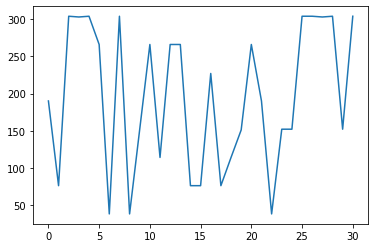

In [98]:
plt.plot(matches_by_team)
plt.show()

megnéztem, hogy az értékek oszthatóak-e 38-cal(ennyi meccs van egy szezonban)

In [99]:
matches_by_team

array([190.,  76., 304., 303., 304., 266.,  38., 304.,  38., 152., 266.,
       114., 266., 266.,  76.,  76., 227.,  76., 114., 151., 266., 190.,
        38., 152., 152., 304., 304., 303., 304., 152., 304.])

In [100]:
Alaves_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   matches               190 non-null    object        
 1   hometeamname          190 non-null    object        
 2   guestteamname         190 non-null    object        
 3   homepossession        190 non-null    float64       
 4   guestpossession       190 non-null    float64       
 5   homegoals             190 non-null    object        
 6   guestgoals            190 non-null    object        
 7   homegoalattempts      190 non-null    object        
 8   guestgoalattempts     190 non-null    object        
 9   homeshotsongoal       190 non-null    object        
 10  guestshotsongoal      190 non-null    object        
 11  homeshotsoffgoal      190 non-null    object        
 12  guestshotsoffgoal     190 non-null    object        
 13  homeblockedshots    

In [101]:
cnames = list(Alaves_df)
cnames

['matches',
 'hometeamname',
 'guestteamname',
 'homepossession',
 'guestpossession',
 'homegoals',
 'guestgoals',
 'homegoalattempts',
 'guestgoalattempts',
 'homeshotsongoal',
 'guestshotsongoal',
 'homeshotsoffgoal',
 'guestshotsoffgoal',
 'homeblockedshots',
 'guestblockedshots',
 'homefreekicks',
 'guestfreekicks',
 'homecornerkicks',
 'guestcornerkicks',
 'date',
 'bethomewinodds',
 'betdrawodds',
 'betguestwinodds',
 'homethrowin',
 'guestthrowin',
 'GoalDiff',
 'winner',
 'PredictedHomeOdds',
 'PredictedDrawOdds',
 'PredictedGuestOdds',
 'PredictedWinner',
 'HomeTeamWin',
 'Draw',
 'GuestTeamWin',
 'season',
 'home_overall',
 'away_overall',
 'home_AttackingRating',
 'away_AttackingRating',
 'home_MidfieldRating',
 'away_MidfieldRating',
 'home_DefenceRating',
 'away_DefenceRating',
 'home_ClubWorth',
 'away_ClubWorth',
 'home_XIAverageAge',
 'away_XIAverageAge',
 'home_DefenceWidth',
 'away_DefenceWidth',
 'home_DefenceDepth',
 'away_DefenceDepth',
 'home_OffenceWidth',
 'away

In [102]:
for i in namehelp_df.index:
    exec( namehelp_df.loc[i, 'dataname'] + "_df = " + namehelp_df.loc[i, 'dataname'] + """_df.astype({
    'homegoals': 'float64',
    'guestgoals': 'float64',
    'homegoalattempts': 'float64',
    'guestgoalattempts': 'float64',
    'homeshotsongoal': 'float64',
    'guestshotsongoal': 'float64',
    'homeshotsoffgoal': 'float64',
    'guestshotsoffgoal': 'float64',
    'homeblockedshots': 'float64',
    'guestblockedshots': 'float64',
    'homefreekicks': 'float64',
    'guestfreekicks': 'float64',
    'homecornerkicks': 'float64',
    'guestcornerkicks': 'float64',
    'homethrowin': 'float64',
    'guestthrowin': 'float64',
    'GoalDiff': 'float64',
    'winner': 'float64',
    'PredictedWinner': 'float64',
    'season': 'float64',
    'home_overall': 'float64',
    'away_overall': 'float64',
    'home_AttackingRating': 'float64',
    'away_AttackingRating': 'float64',
    'home_ClubWorth': 'float64',
    'away_ClubWorth': 'float64',
    'home_Likes': 'float64',
    'away_Likes': 'float64',
    'home_Dislikes': 'float64',
    'away_Dislikes': 'float64',
    'homefreekicks': 'float64',
     })""")

In [103]:
(Betis_df == 0).sum()

matches                   0
hometeamname              0
guestteamname             0
homepossession            0
guestpossession           0
homegoals                60
guestgoals               91
homegoalattempts          0
guestgoalattempts         0
homeshotsongoal           2
guestshotsongoal          8
homeshotsoffgoal          2
guestshotsoffgoal         6
homeblockedshots         22
guestblockedshots        35
homefreekicks             0
guestfreekicks            0
homecornerkicks           4
guestcornerkicks         11
date                      0
bethomewinodds            0
betdrawodds               0
betguestwinodds           0
homethrowin              15
guestthrowin             10
GoalDiff                 63
winner                   63
PredictedHomeOdds         0
PredictedDrawOdds         0
PredictedGuestOdds        0
PredictedWinner          67
HomeTeamWin             140
Draw                    203
GuestTeamWin            189
season                    0
home_overall        

In [104]:
for idx in Alaves_df.index:
  if Alaves_df.loc[idx, 'home_overall'] == 0:
    print(Alaves_df.loc[idx, 'season'])
    print(Alaves_df.loc[idx, 'hometeamname'])

# **Csapat statisztikák és adatvizualizáció**

---



In [105]:
import matplotlib.pyplot as plt
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [106]:
import statistics

In [107]:
from matplotlib.pyplot import hist

Létrehoztam egy új DataFramet, hogy a csapatok adatait, amiket majd az adathalmazhoz fogok használni ebbe tudjam beletölteni.

In [108]:
statistics_df = pd.DataFrame(columns = ['teamname','matches_played','overall', 'AttackingRating', 'MidfieldRating', 'DefenceRating',
       'ClubWorth', 'XIAverageAge', 'DefenceWidth', 'DefenceDepth',
       'OffenceWidth', 'Likes', 'Dislikes',
       'avgoals', 'avconceded', 'avgoalattempts',
       'avshotsongoal', 'avshotsoffgoal', 'avblockedshots',
       'avpossession', 'avfreekicks', 'avGoalDiff', 'avwins',
       'avdraws', 'avloses']
)

Korrelációs mátrixot hoztam létre a klub fifa adataiból, amiket feltöltöttem aszerint, hogy mikorról vannak érvényes fifa adatok utoljára. Az idei szezonban szereplő csapatokról természetes a legújabb adatok érhetőek el, de vannak csapatok, akik utoljára 2015-ben szerepeltek elsőosztályban, így náluk azokat kellett használnom

Elérhető lesz a csapatoktól meccs statisztikákra alapuló mátrix is. Ezeket az ábrákat a drivera mentve képzi a program, mivel az alkalmazásban a modell csak jósolni fog tudni, az adathalmazhoz már nem fog hozzáférni.

In [109]:
def teamprematchcorrplot(teamdf,teamname):
  teamdf = teamdf.drop(['hometeamname',
      'guestteamname',
      'homepossession',
      'guestpossession',
      'homegoals',
      'guestgoals',
      'homegoalattempts',
      'guestgoalattempts',
      'homeshotsongoal',
      'guestshotsongoal',
      'homeshotsoffgoal',
      'guestshotsoffgoal',
      'homeblockedshots',
      'guestblockedshots',
      'homefreekicks',
      'guestfreekicks',
      'homecornerkicks',
      'guestcornerkicks',
      'date',
      'bethomewinodds',
      'betdrawodds',
      'betguestwinodds',
      'homethrowin',
      'guestthrowin',
      'HomeTeamWin',
      'Draw',
      'GuestTeamWin',
      'PredictedHomeOdds',
      'PredictedDrawOdds',
      'PredictedGuestOdds',
      'PredictedWinner',
       'season'],axis=1)
  correlation_df = teamdf.corr()

  correlation_df = correlation_df.drop([
    'home_overall',
    'away_overall',
    'home_AttackingRating',
    'away_AttackingRating',
    'home_MidfieldRating',
    'away_MidfieldRating',
    'home_DefenceRating',
    'away_DefenceRating',
    'home_ClubWorth',
    'away_ClubWorth',
    'home_XIAverageAge',
    'away_XIAverageAge',
    'home_DefenceWidth',
    'away_DefenceWidth',
    'home_DefenceDepth',
    'away_DefenceDepth',
    'home_OffenceWidth',
    'away_OffenceWidth',
    'home_Likes',
    'away_Likes',
    'home_Dislikes',
    'away_Dislikes',
    #'HomeForm',
    #'AwayForm'
    ], axis = 1)
  plt.figure(figsize=(25,65))
  plt.title(label = str(teamname)+" korreláció mátrixa (csapat infó)",fontsize=80,pad=30) 
  sns.set(font_scale=9)
  sns.heatmap(correlation_df, annot=True)
  #plt.imsave(arr = MxNx3, format='png',fname = '/content/drive/MyDrive/aszakdoga/kepek/'+ teamname + 'prematchcorr')
  plt.savefig(format='png',fname = '/content/drive/MyDrive/aszakdoga/kepek/pre/'+ teamname.lower() + 'prematchcorr',bbox_inches = 'tight')
  plt.show()
  '''plt.figure(figsize=(20,20))

  plt.subplot(3,3,1)
  sns.regplot(x=df['GoalDiff'], y=df['home_overall'] - df['away_overall'])

  plt.subplot(3,3,2)
  sns.regplot(x=df['GoalDiff'], y=df['home_AttackingRating'] - df['away_AttackingRating'])


  for idx in namehelp_df.index:
    if(namehelp_df.loc[idx,'dataname'] == teamname):
      fifateamname = namehelp_df.loc[idx,'fifaname']


  for idx in teamdf.index:
    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      goals.append(teamdf.loc[idx, 'homegoals'])
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      goals.append(teamdf.loc[idx, 'guestgoals'])'''


In [110]:
def teamaftmatchcorrplot(teamdf,teamname):
  teamdf = teamdf.drop([
      'hometeamname',
      'guestteamname',
      'home_overall',
      'away_overall',
      'home_AttackingRating',
      'away_AttackingRating',
      'home_MidfieldRating',
      'away_MidfieldRating',
      'home_DefenceRating',
      'away_DefenceRating',
      'home_ClubWorth',
      'away_ClubWorth',
      'home_XIAverageAge',
      'away_XIAverageAge',
      'home_DefenceWidth',
      'away_DefenceWidth',
      'home_DefenceDepth',
      'away_DefenceDepth',
      'home_OffenceWidth',
      'away_OffenceWidth',
      'home_Likes',
      'away_Likes',
      'home_Dislikes',
      'away_Dislikes',
      #'HomeForm',
      #'AwayForm',
      'date',
      'bethomewinodds',
      'betdrawodds',
      'betguestwinodds',
      'homethrowin',
      'guestthrowin',
      'HomeTeamWin',
      'Draw',
      'GuestTeamWin',
      'PredictedHomeOdds',
      'PredictedDrawOdds',
      'PredictedGuestOdds',
      'PredictedWinner',
      'homegoals',
      'guestgoals',
       'season'],axis=1)
  correlation_df = teamdf.corr()

  correlation_df = correlation_df.drop([
      'homepossession',
      'guestpossession',
      'homegoalattempts',
      'guestgoalattempts',
      'homeshotsongoal',
      'guestshotsongoal',
      'homeshotsoffgoal',
      'guestshotsoffgoal',
      'homeblockedshots',
      'guestblockedshots',
      'homefreekicks',
      'guestfreekicks',
      'homecornerkicks',
      'guestcornerkicks'], axis = 1)
  plt.figure(figsize=(25,65))
  #plt.figure(figsize=(25,45))
  plt.title(label = str(teamname)+" korreláció mátrixa (statisztikai)",fontsize=60, pad=30) 
  sns.heatmap(correlation_df, annot=True)
  sns.set(font_scale=9)
  plt.savefig(format='png',fname = '/content/drive/MyDrive/aszakdoga/kepek/after/'+ teamname.lower() + 'aftmatchcorr',bbox_inches = 'tight')
  plt.show()

In [111]:
def teamhistogramplot(teamdf,teamname):
    plt.figure(figsize=(25,40))
    sns.set(font_scale=4)
    plt.subplot(3,2,1)
    plot_df = teamdf.groupby('GoalDiff', as_index=False)['homepossession'].mean()
    plot_df.plot.line('GoalDiff',ax=plt.gca())

    plt.subplot(3,2,2)
    plot_df = teamdf.groupby('GoalDiff', as_index=False)['homegoalattempts'].mean()
    plot_df.plot.line('GoalDiff',ax=plt.gca())

    plt.subplot(3,2,3)
    plot_df = teamdf.groupby('GoalDiff', as_index=False)['homeshotsongoal'].mean()
    plot_df.plot.line('GoalDiff',ax=plt.gca())

    plt.subplot(3,2,4)
    plot_df = teamdf.groupby('GoalDiff', as_index=False)['homeshotsoffgoal'].mean()
    plot_df.plot.line('GoalDiff',ax=plt.gca())

    plt.subplot(3,2,5)
    plot_df = teamdf.groupby('GoalDiff', as_index=False)['homeblockedshots'].mean()
    plot_df.plot.line('GoalDiff',ax=plt.gca())

    plt.subplot(3,2,6)
    plot_df = teamdf.groupby('GoalDiff', as_index=False)['homefreekicks'].mean()
    plot_df.plot.line('GoalDiff',ax=plt.gca())
    plt.savefig(format='png',fname = '/content/drive/MyDrive/aszakdoga/kepek/after/'+ teamname.lower() + 'stat',bbox_inches = 'tight')
    plt.show()

In [112]:
def teamstats(teamdf,teamname):
  matches_played = len(teamdf.index)
  overall = 0
  AttackingRating = 0
  MidfieldRating = 0
  DefenceRating = 0
  ClubWorth = 0
  XIAverageAge = 0
  DefenceWidth = 0
  DefenceDepth = 0
  OffenceWidth = 0
  Likes = 0
  Dislikes = 0
  for idx in namehelp_df.index:
    if(namehelp_df.loc[idx,'dataname'] == teamname):
      fifateamname = namehelp_df.loc[idx,'fifaname']

  for i in fifa22df.index:
    if(fifateamname == fifa22df.loc[i,'name']):
      overall = fifa22df.loc[i,'overall']
      AttackingRating = fifa22df.loc[i,'AttackingRating']
      MidfieldRating = fifa22df.loc[i,'MidfieldRating']
      DefenceRating = fifa22df.loc[i,'DefenceRating']
      ClubWorth = fifa22df.loc[i,'ClubWorth']
      XIAverageAge = fifa22df.loc[i,'XIAverageAge']
      DefenceWidth = fifa22df.loc[i,'DefenceWidth']
      DefenceDepth = fifa22df.loc[i,'DefenceDepth']
      OffenceWidth = fifa22df.loc[i,'OffenceWidth']
      Likes = fifa22df.loc[i,'Likes']
      Dislikes = fifa22df.loc[i,'Dislikes']

  if overall == 0:
    for i in fifa21df.index:
      if(fifateamname == fifa21df.loc[i,'name']):
        overall = fifa21df.loc[i,'overall']
        AttackingRating = fifa21df.loc[i,'AttackingRating']
        MidfieldRating = fifa21df.loc[i,'MidfieldRating']
        DefenceRating = fifa21df.loc[i,'DefenceRating']
        ClubWorth = fifa21df.loc[i,'ClubWorth']
        XIAverageAge = fifa21df.loc[i,'XIAverageAge']
        DefenceWidth = fifa21df.loc[i,'DefenceWidth']
        DefenceDepth = fifa21df.loc[i,'DefenceDepth']
        OffenceWidth = fifa21df.loc[i,'OffenceWidth']
        Likes = fifa21df.loc[i,'Likes']
        Dislikes = fifa21df.loc[i,'Dislikes']

  if overall == 0:
    for i in fifa20df.index:
      if(fifateamname == fifa20df.loc[i,'name']):
        overall = fifa20df.loc[i,'overall']
        AttackingRating = fifa20df.loc[i,'AttackingRating']
        MidfieldRating = fifa20df.loc[i,'MidfieldRating']
        DefenceRating = fifa20df.loc[i,'DefenceRating']
        ClubWorth = fifa20df.loc[i,'ClubWorth']
        XIAverageAge = fifa20df.loc[i,'XIAverageAge']
        DefenceWidth = fifa20df.loc[i,'DefenceWidth']
        DefenceDepth = fifa20df.loc[i,'DefenceDepth']
        OffenceWidth = fifa20df.loc[i,'OffenceWidth']
        Likes = fifa20df.loc[i,'Likes']
        Dislikes = fifa20df.loc[i,'Dislikes']

  if overall == 0:
    for i in fifa19df.index:
      if(fifateamname == fifa19df.loc[i,'name']):
        overall = fifa19df.loc[i,'overall']
        AttackingRating = fifa19df.loc[i,'AttackingRating']
        MidfieldRating = fifa19df.loc[i,'MidfieldRating']
        DefenceRating = fifa19df.loc[i,'DefenceRating']
        ClubWorth = fifa19df.loc[i,'ClubWorth']
        XIAverageAge = fifa19df.loc[i,'XIAverageAge']
        DefenceWidth = fifa19df.loc[i,'DefenceWidth']
        DefenceDepth = fifa19df.loc[i,'DefenceDepth']
        OffenceWidth = fifa19df.loc[i,'OffenceWidth']
        Likes = fifa19df.loc[i,'Likes']
        Dislikes = fifa19df.loc[i,'Dislikes']

  if overall == 0:
    for i in fifa18df.index:
      if(fifateamname == fifa18df.loc[i,'name']):
        overall = fifa18df.loc[i,'overall']
        AttackingRating = fifa18df.loc[i,'AttackingRating']
        MidfieldRating = fifa18df.loc[i,'MidfieldRating']
        DefenceRating = fifa18df.loc[i,'DefenceRating']
        ClubWorth = fifa18df.loc[i,'ClubWorth']
        XIAverageAge = fifa18df.loc[i,'XIAverageAge']
        DefenceWidth = fifa18df.loc[i,'DefenceWidth']
        DefenceDepth = fifa18df.loc[i,'DefenceDepth']
        OffenceWidth = fifa18df.loc[i,'OffenceWidth']
        Likes = fifa18df.loc[i,'Likes']
        Dislikes = fifa18df.loc[i,'Dislikes']

  if overall == 0:
    for i in fifa17df.index:
      if(fifateamname == fifa17df.loc[i,'name']):
        overall = fifa17df.loc[i,'overall']
        AttackingRating = fifa17df.loc[i,'AttackingRating']
        MidfieldRating = fifa17df.loc[i,'MidfieldRating']
        DefenceRating = fifa17df.loc[i,'DefenceRating']
        ClubWorth = fifa17df.loc[i,'ClubWorth']
        XIAverageAge = fifa17df.loc[i,'XIAverageAge']
        DefenceWidth = fifa17df.loc[i,'DefenceWidth']
        DefenceDepth = fifa17df.loc[i,'DefenceDepth']
        OffenceWidth = fifa17df.loc[i,'OffenceWidth']
        Likes = fifa17df.loc[i,'Likes']
        Dislikes = fifa17df.loc[i,'Dislikes']

  if overall == 0:
    for i in fifa15df.index:
      if(fifateamname == fifa15df.loc[i,'name']):
        overall = fifa15df.loc[i,'overall']
        AttackingRating = fifa15df.loc[i,'AttackingRating']
        MidfieldRating = fifa15df.loc[i,'MidfieldRating']
        DefenceRating = fifa15df.loc[i,'DefenceRating']
        ClubWorth = fifa15df.loc[i,'ClubWorth']
        XIAverageAge = fifa15df.loc[i,'XIAverageAge']
        DefenceWidth = fifa15df.loc[i,'DefenceWidth']
        DefenceDepth = fifa15df.loc[i,'DefenceDepth']
        OffenceWidth = fifa15df.loc[i,'OffenceWidth']
        Likes = fifa15df.loc[i,'Likes']
        Dislikes = fifa15df.loc[i,'Dislikes']
  

  goals = []
  conceded = []
  GoalDiff = []

  goalattempts = []
  shotsongoal = []
  shotsoffgoal = []
  blockedshots = []
  possession = []
  freekicks = []

  wins = []
  draws = []
  loses = []

  

  for idx in teamdf.index:
    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      goals.append(teamdf.loc[idx, 'homegoals'])
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      goals.append(teamdf.loc[idx, 'guestgoals'])

    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      conceded.append(teamdf.loc[idx, 'guestgoals'])
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      conceded.append(teamdf.loc[idx, 'homegoals'])

    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      GoalDiff.append(teamdf.loc[idx, 'GoalDiff'])
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      GoalDiff.append(teamdf.loc[idx, 'GoalDiff'])

    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      goalattempts.append(teamdf.loc[idx, 'homegoalattempts'])
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      goalattempts.append(teamdf.loc[idx, 'guestgoalattempts'])

    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      shotsongoal.append(teamdf.loc[idx, 'homeshotsongoal'])
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      shotsongoal.append(teamdf.loc[idx, 'guestshotsongoal'])

    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      shotsoffgoal.append(teamdf.loc[idx, 'homeshotsoffgoal'])
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      shotsoffgoal.append(teamdf.loc[idx, 'guestshotsoffgoal'])

    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      blockedshots.append(teamdf.loc[idx, 'homeblockedshots'])
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      blockedshots.append(teamdf.loc[idx, 'guestblockedshots'])

    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      possession.append(teamdf.loc[idx, 'homepossession'])
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      possession.append(teamdf.loc[idx, 'guestpossession'])

    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      freekicks.append(teamdf.loc[idx, 'homefreekicks'])
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      freekicks.append(teamdf.loc[idx, 'guestfreekicks'])

    if(teamdf.loc[idx, 'hometeamname'] == teamname):
      if teamdf.loc[idx, 'winner'] == 1:
        wins.append(1)
        draws.append(0)
        loses.append(0)
      elif teamdf.loc[idx, 'winner'] == 0:
        wins.append(0)
        draws.append(1)
        loses.append(0)
      elif teamdf.loc[idx, 'winner'] == -1:
        wins.append(0)
        draws.append(0)
        loses.append(1)
    if(teamdf.loc[idx, 'guestteamname'] == teamname):
      if teamdf.loc[idx, 'winner'] == 1:
        wins.append(0)
        draws.append(0)
        loses.append(1)
      elif teamdf.loc[idx, 'winner'] == 0:
        wins.append(0)
        draws.append(1)
        loses.append(0)
      elif teamdf.loc[idx, 'winner'] == -1:
        wins.append(1)
        draws.append(0)
        loses.append(0)


  avgoals = statistics.mean(goals)
  avconceded = statistics.mean(conceded)
  avGoalDiff = statistics.mean(GoalDiff)

  avgoalattempts = statistics.mean(goalattempts)
  avshotsongoal = statistics.mean(shotsongoal)
  avshotsoffgoal = statistics.mean(shotsoffgoal)
  avblockedshots = statistics.mean(blockedshots)
  avpossession = statistics.mean(possession)
  avfreekicks = statistics.mean(freekicks)

  avwins = statistics.mean(wins)
  avdraws = statistics.mean(draws)
  avloses = statistics.mean(loses)


  new_row = {
      'teamname': teamname,
      'matches_played': matches_played,
      'overall':overall,
      'AttackingRating':AttackingRating,
      'MidfieldRating': MidfieldRating,
      'DefenceRating': DefenceRating,
      'ClubWorth':ClubWorth,
      'XIAverageAge':XIAverageAge,
      'DefenceWidth':DefenceWidth,
      'DefenceDepth':DefenceDepth,
      'OffenceWidth':OffenceWidth,
      'Likes':Likes,
      'Dislikes':Dislikes,
      'avgoals':avgoals,
      'avconceded':avconceded,
      'avgoalattempts':avgoalattempts,
      'avshotsongoal':avshotsongoal,
      'avshotsoffgoal':avshotsoffgoal,
      'avblockedshots':avblockedshots,
      'avpossession': avpossession,
      'avfreekicks':avfreekicks,
      'avGoalDiff':avGoalDiff,
      'avwins':avwins,
      'avdraws':avdraws,
      'avloses':avloses,
  }

  teamprematchcorrplot(teamdf,teamname)
  teamaftmatchcorrplot(teamdf,teamname)
  teamhistogramplot(teamdf,teamname)
  return new_row

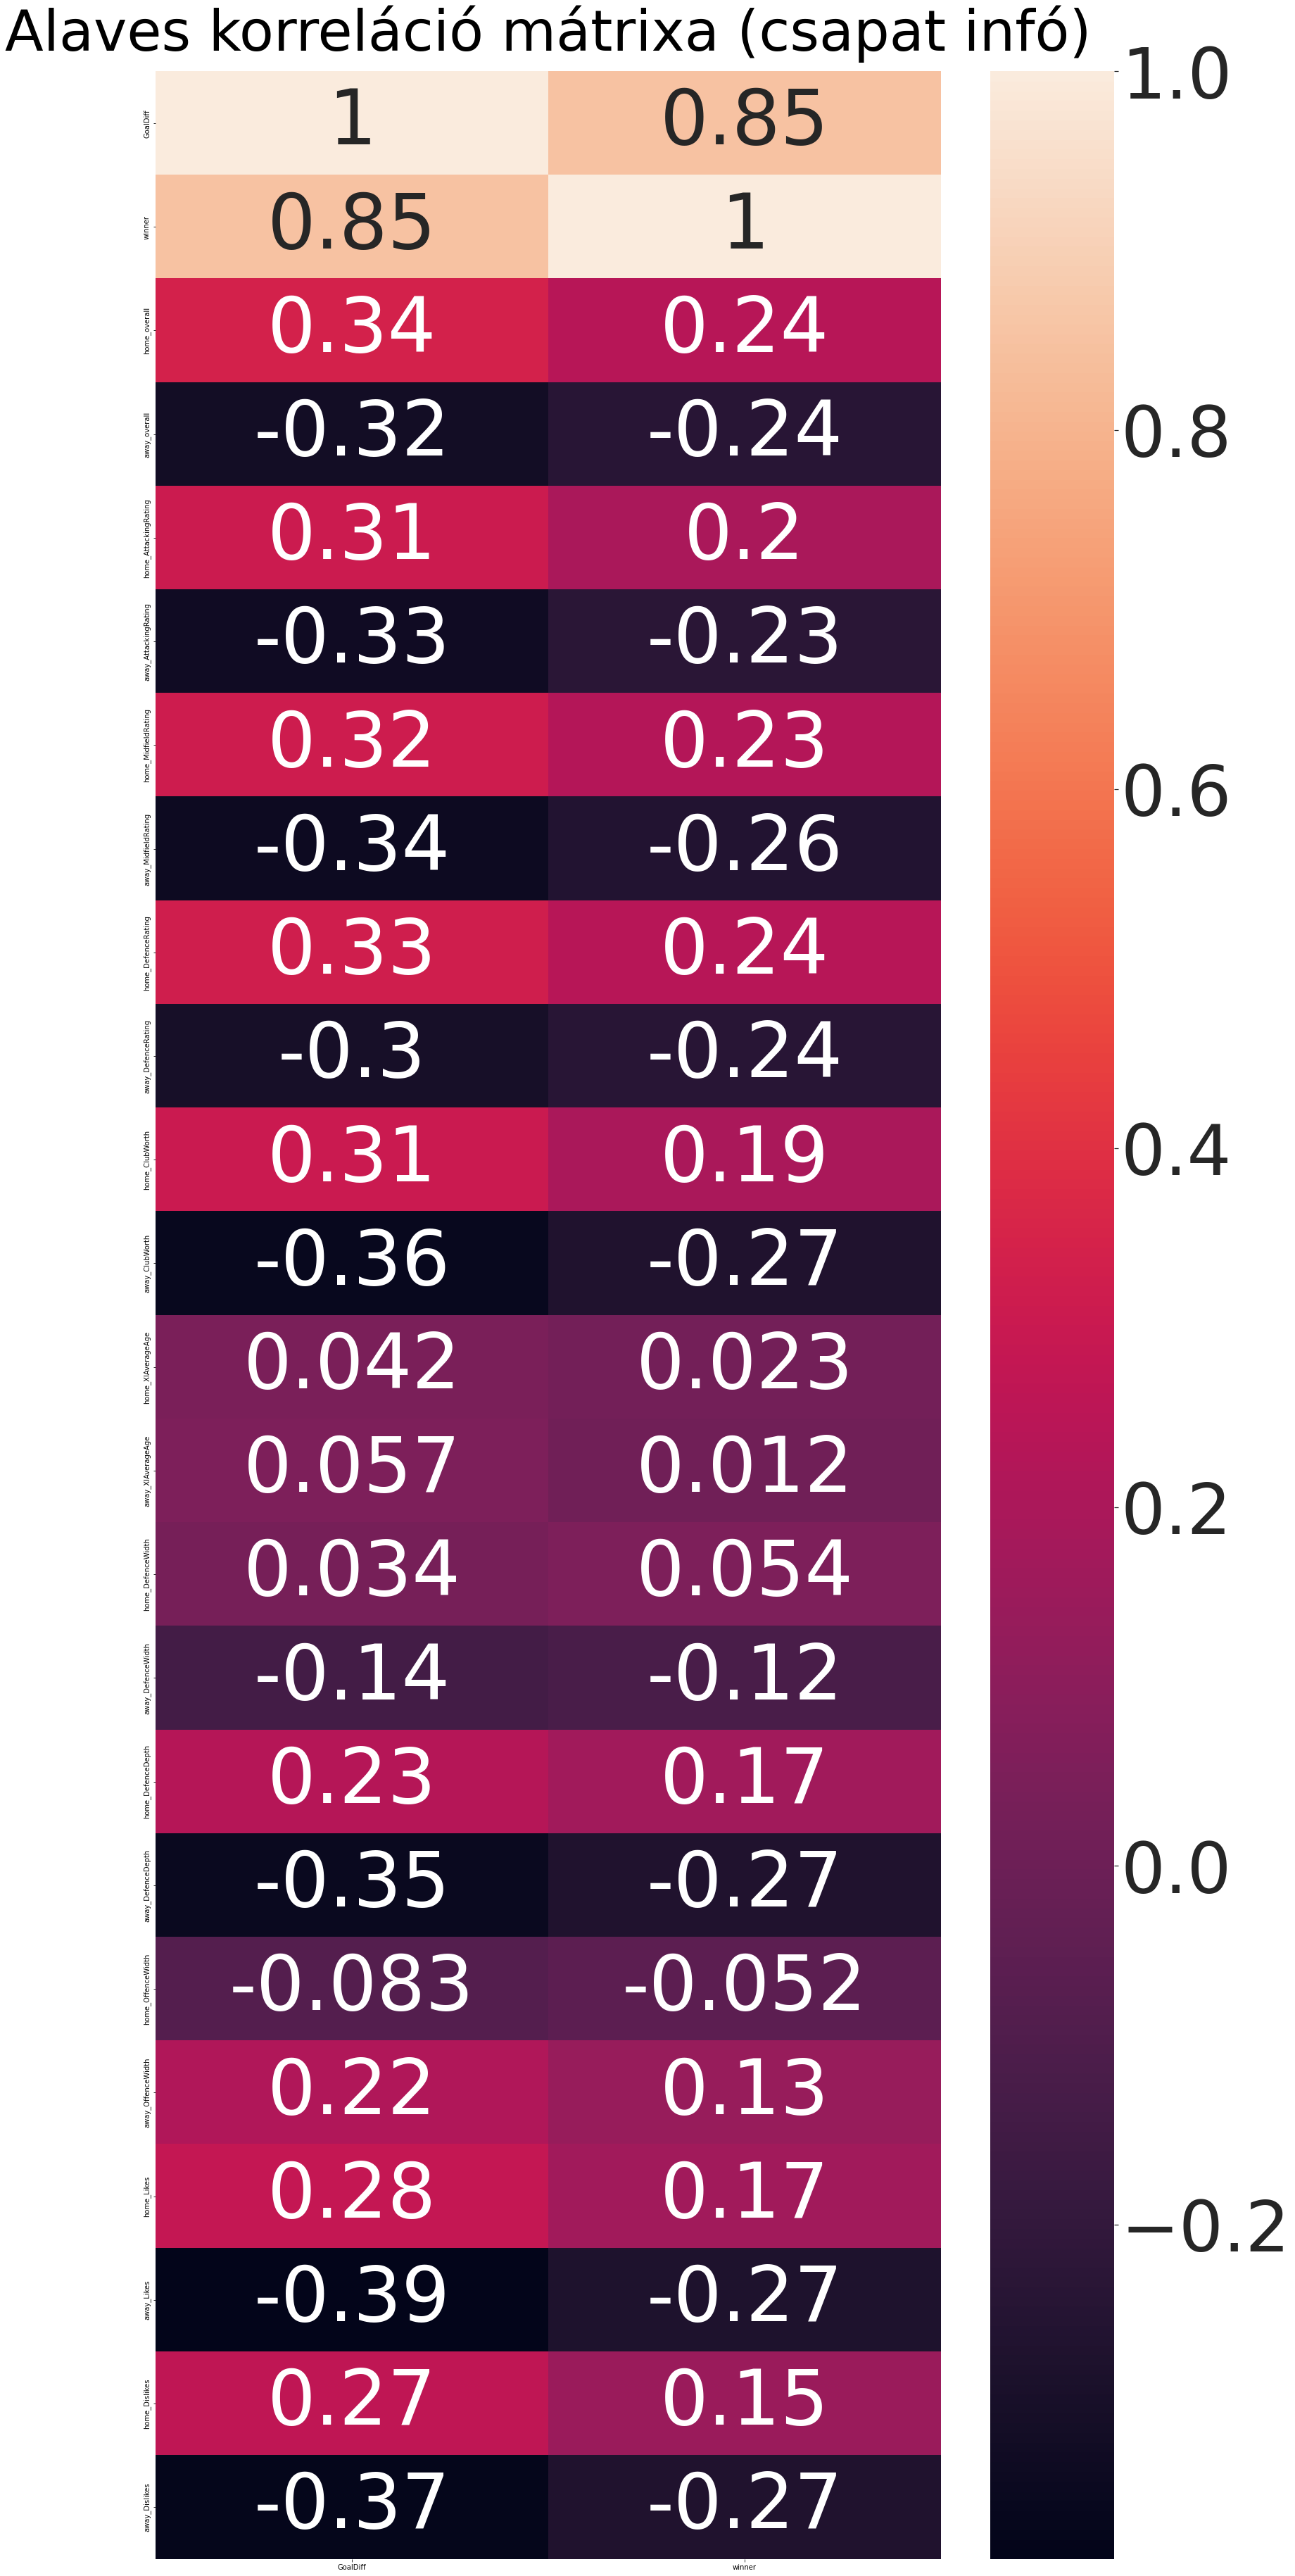

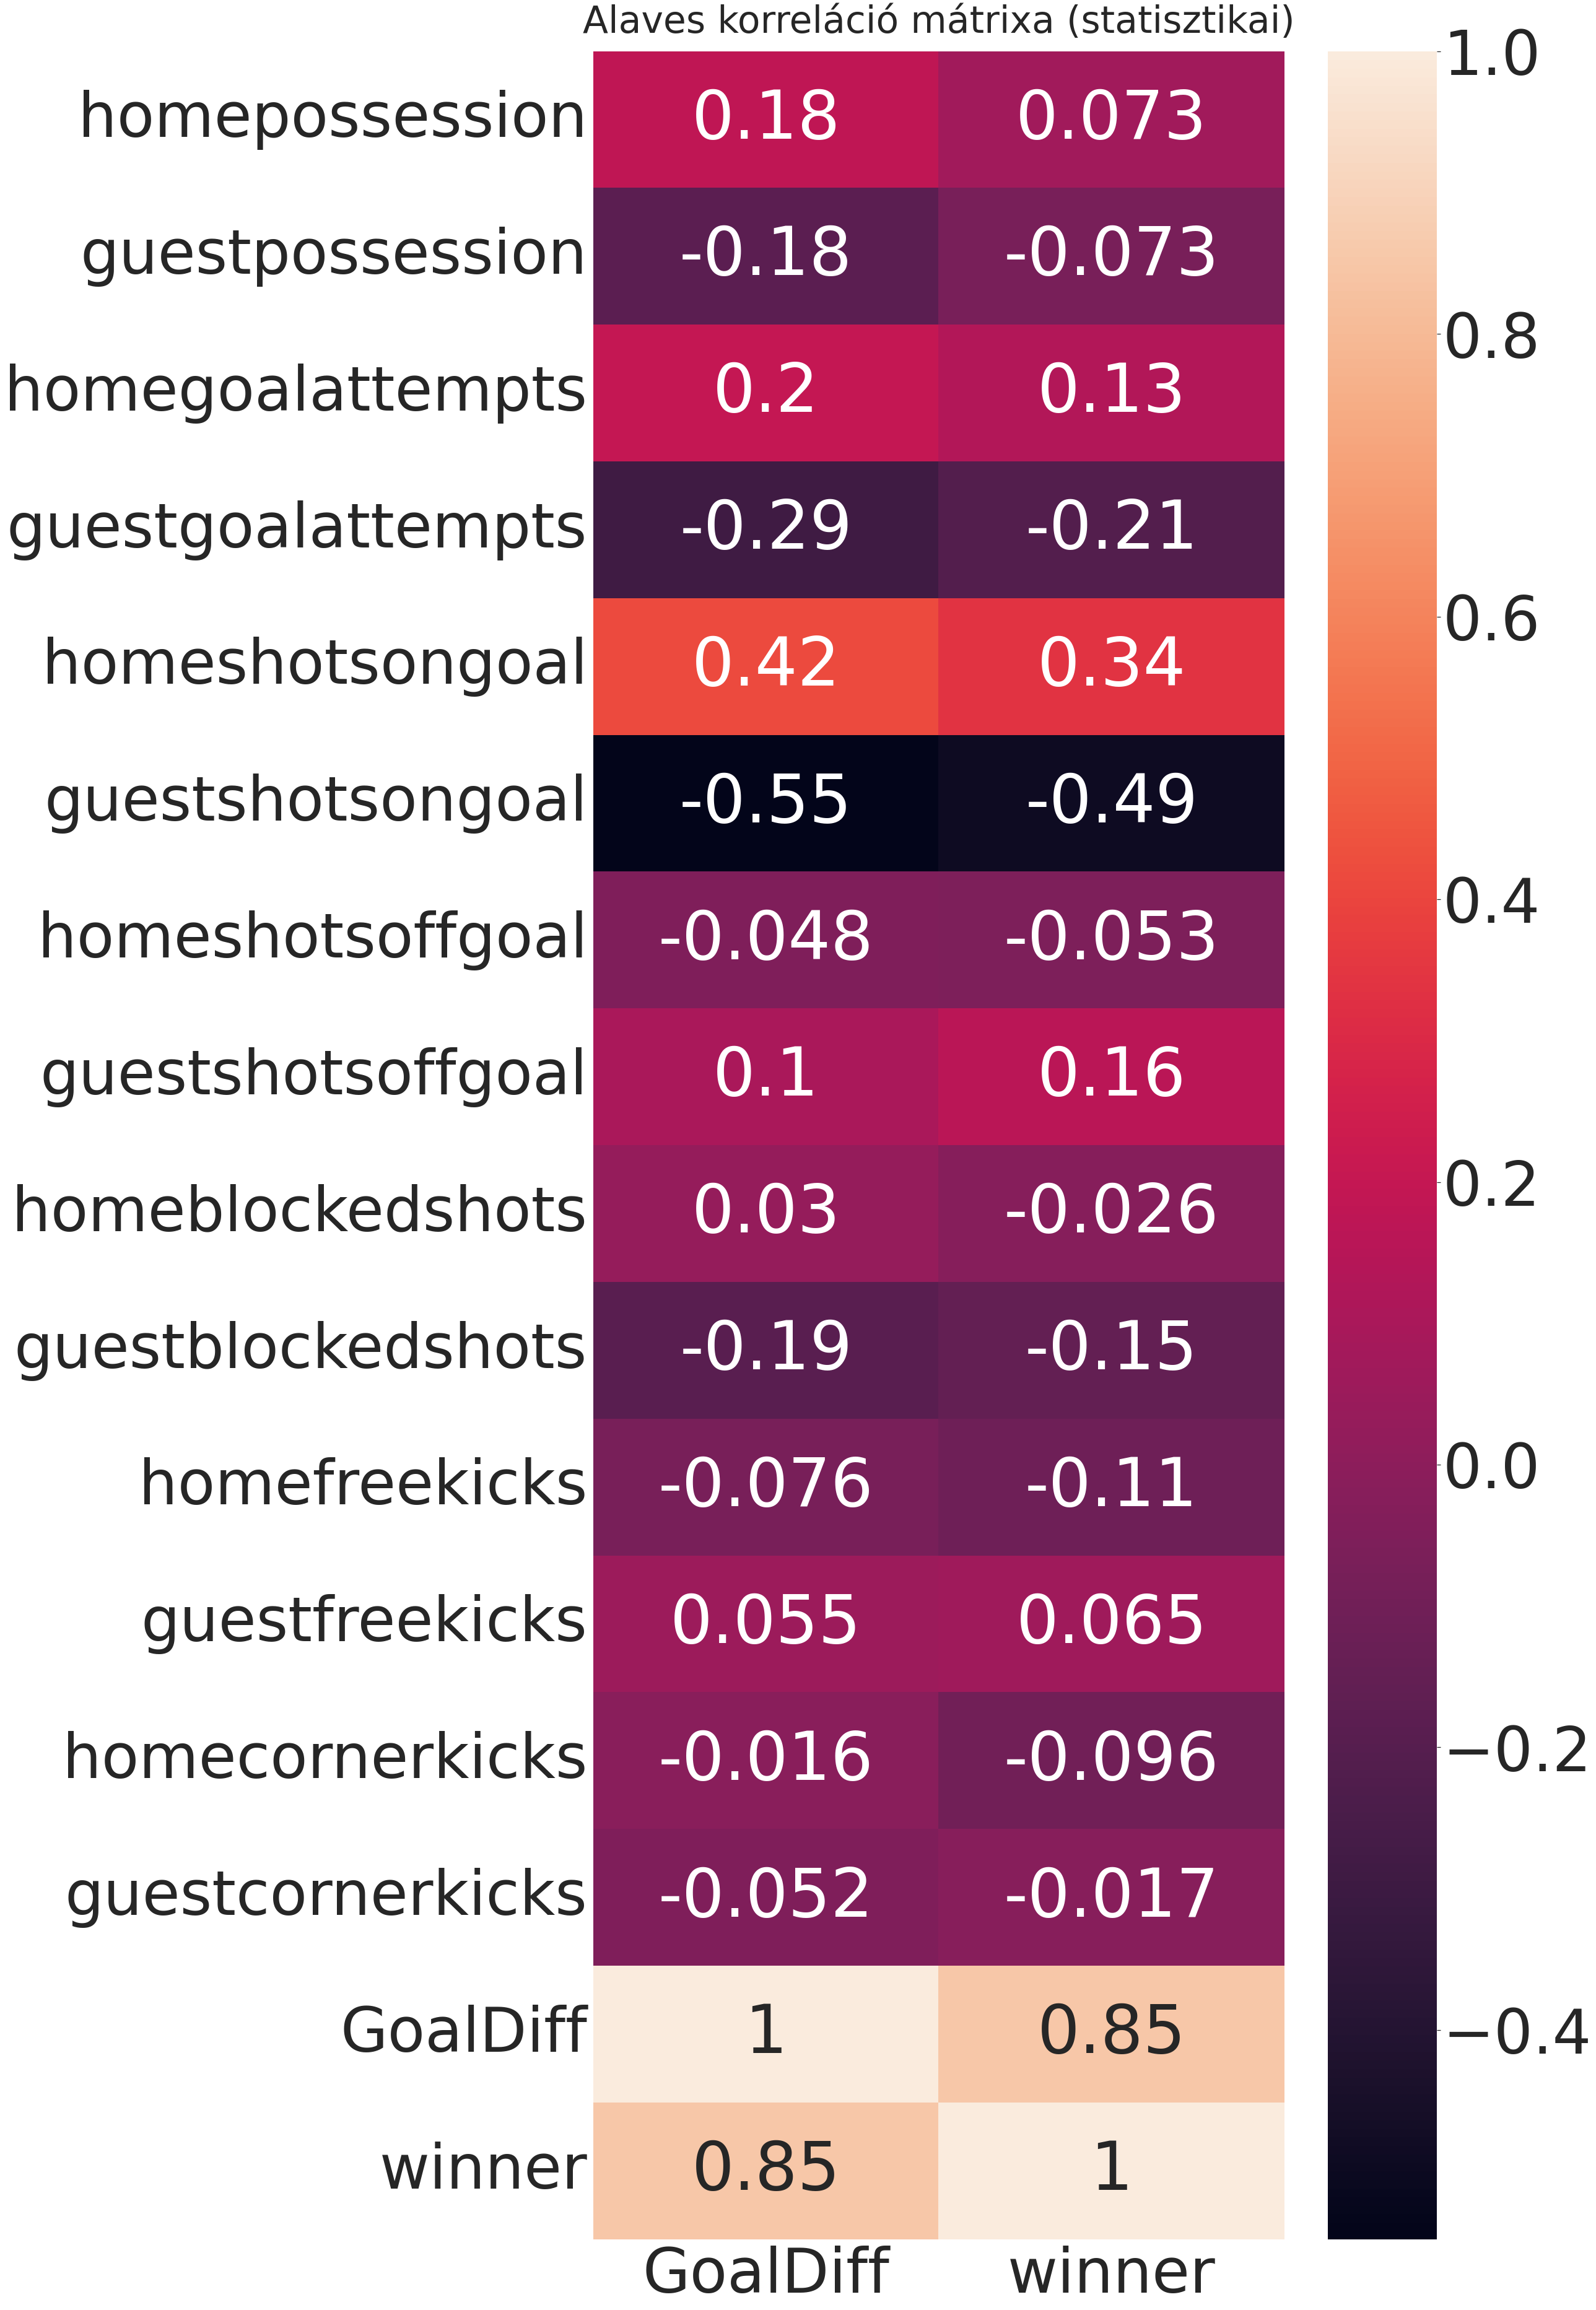

KeyboardInterrupt: ignored

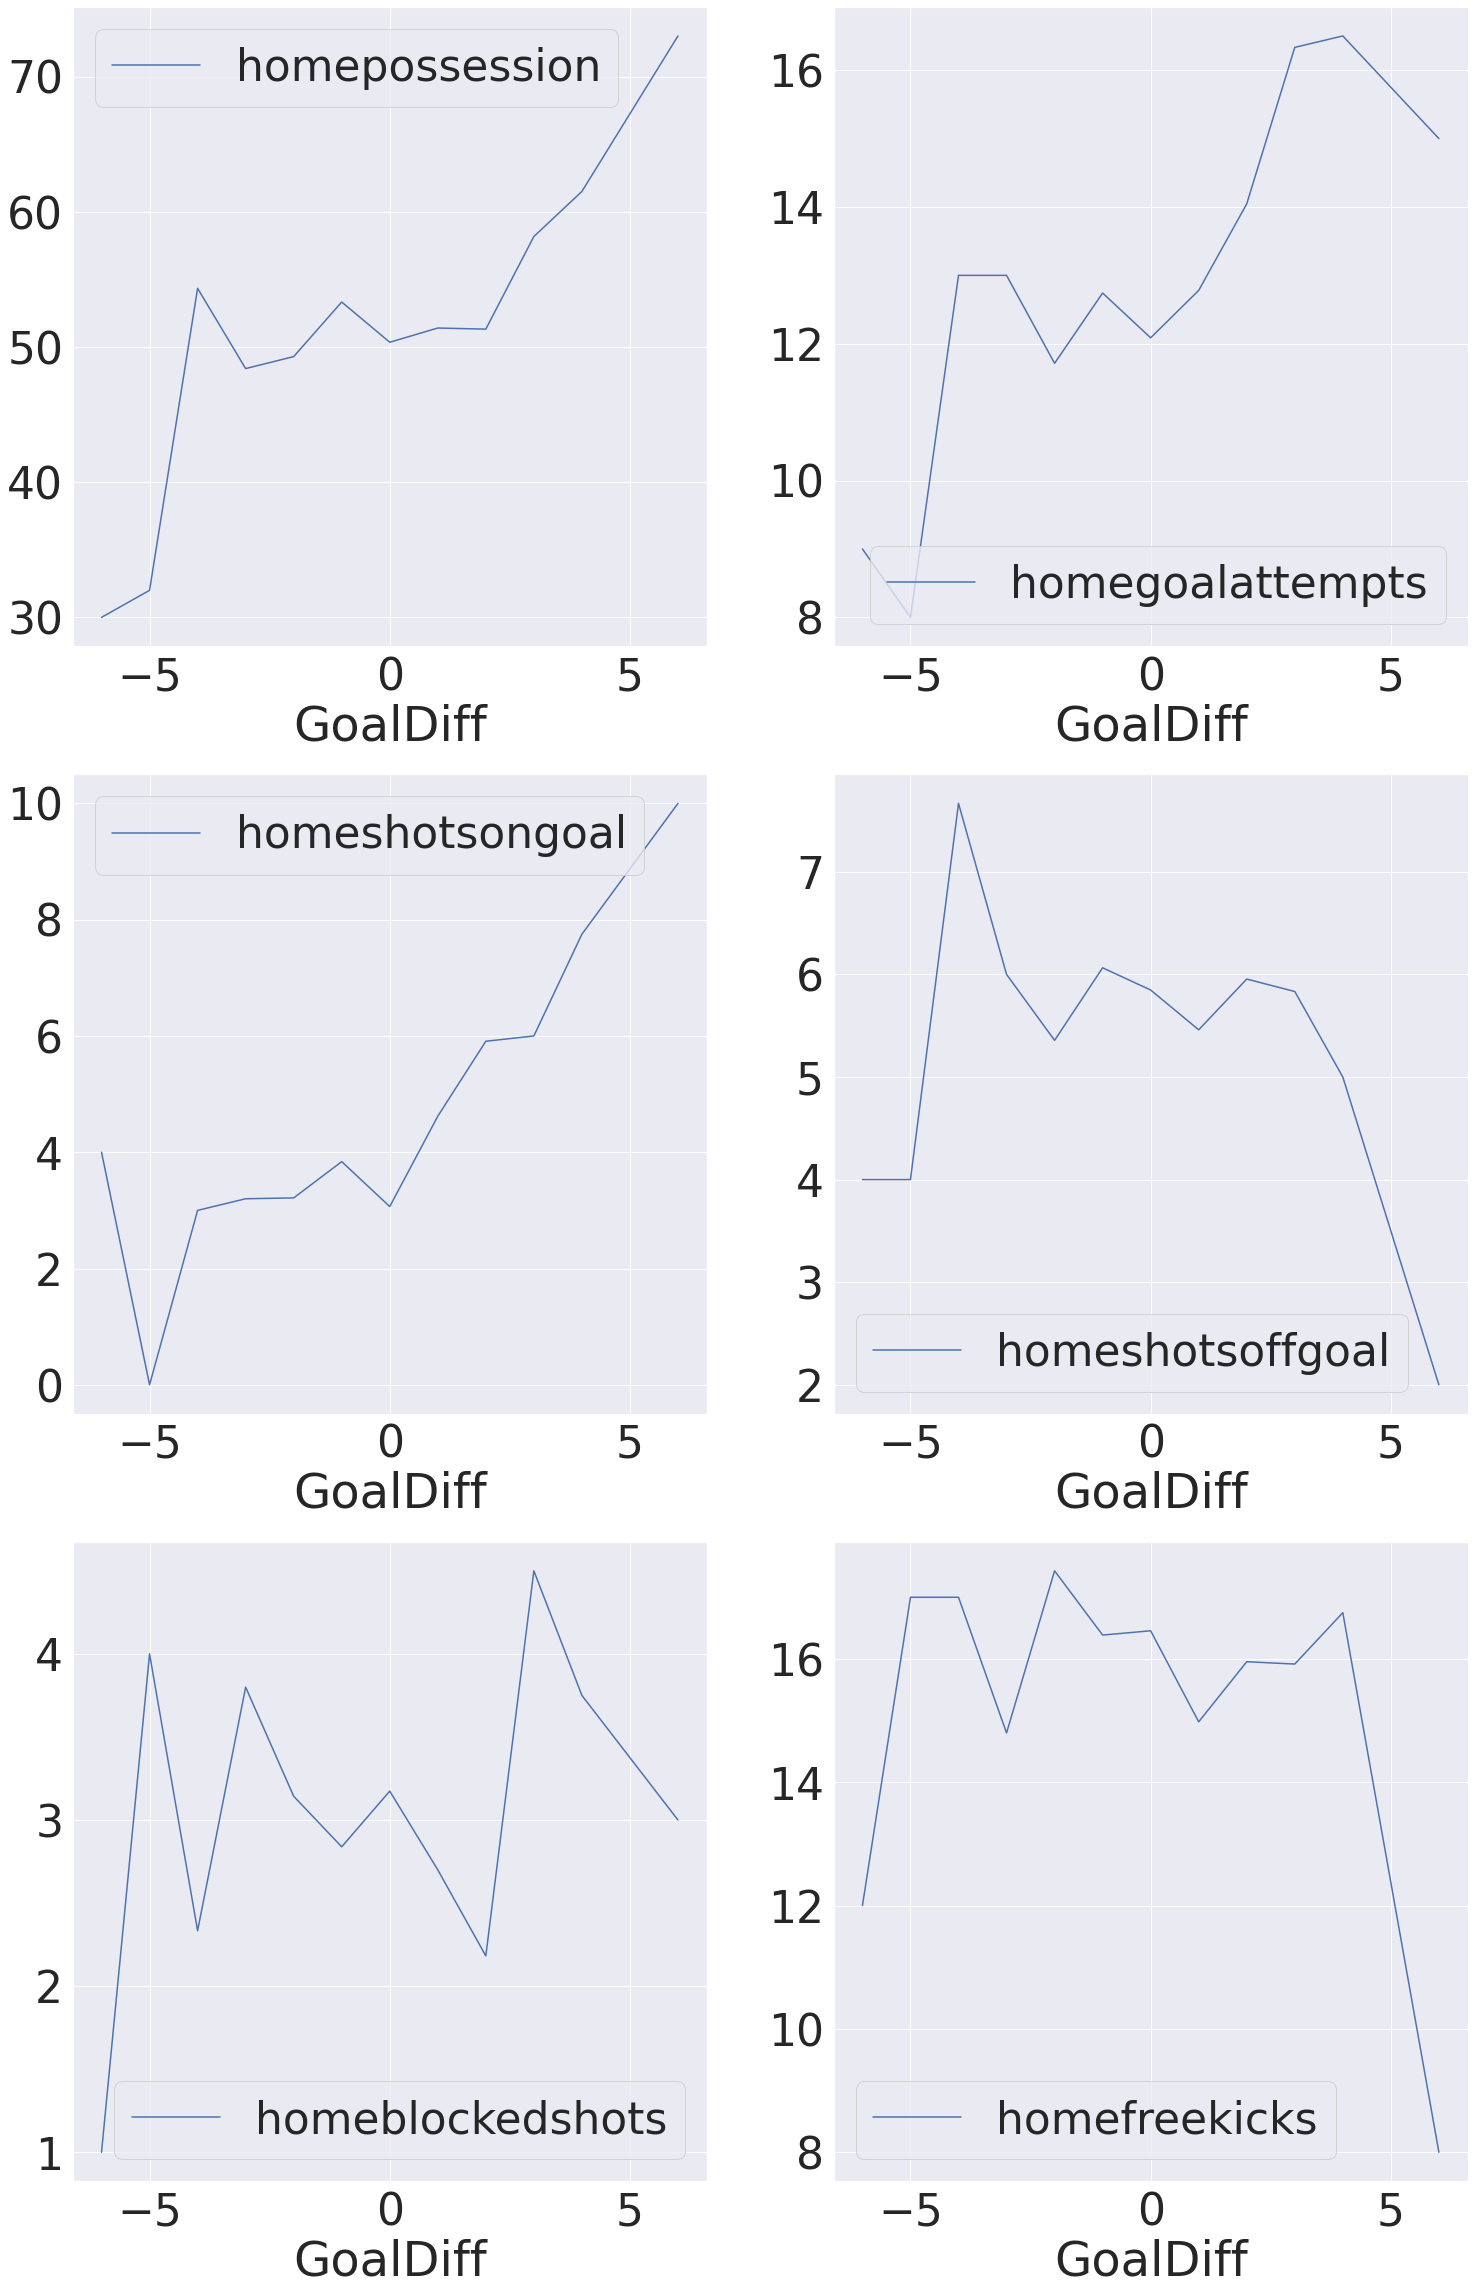

In [113]:
#statisticsdf + diagramok létrehozása
for i in namehelp_df.index:
    teamname = str(namehelp_df.loc[i, 'dataname'])
    exec("teamdf = "+ namehelp_df.loc[i, 'dataname'] +"_df")
    aprow = teamstats(teamdf,teamname)
    statistics_df = statistics_df.append(aprow, ignore_index=True)

In [ ]:
statistics_df.head()

In [ ]:
statistics_df.to_csv(path_or_buf = '/content/drive/MyDrive/aszakdoga/data/sofifa/statistics_df.csv')

vizualizáció

# **Formaszámítás**

---



In [114]:
"""for idx in namehelp_df.index:
    exec(
        namehelp_df.loc[idx, 'dataname'] + "_df.reset_index()\n" +
        namehelp_df.loc[idx, 'dataname'] + "_df['Form'] = 0\n" +
        "for i in " + namehelp_df.loc[idx, 'dataname'] + "_df.index:\n" +
        "  form_counter = 0\n" + 
        "  if(i >= 5):\n" +
        "    for idxform in range(1,6):\n" +
        "      if " + namehelp_df.loc[idx, 'dataname'] + "_df.loc[i-idxform, 'hometeamname'] ==" + namehelp_df.loc[idx, 'dataname'] + ":\n" +
        "        if " +  namehelp_df.loc[idx, 'dataname'] + "_df.loc[i-idxform, 'winner'] == 1:\n" +
        "          form_counter += 3\n" +
        "        elif " +  namehelp_df.loc[idx, 'dataname'] + "_df.loc[i-idxform, 'winner'] == 0:\n" +
        "          form_counter += 1\n" +
        "        elif " +  namehelp_df.loc[idx, 'dataname'] + "_df.loc[i-idxform, 'winner'] == -1:\n" +
        "          form_counter += 0\n" +
        "      if " + namehelp_df.loc[idx, 'dataname'] + "_df.loc[i-idxform, 'guestteamname'] ==" + namehelp_df.loc[idx, 'dataname'] + ":\n" +
        "        if " +  namehelp_df.loc[idx, 'dataname'] + "_df.loc[i-idxform, 'winner'] == 1:\n" +
        "          form_counter += 0\n" +
        "        elif " +  namehelp_df.loc[idx, 'dataname'] + "_df.loc[i-idxform, 'winner'] == 0:\n" +
        "          form_counter += 1\n" +
        "        elif " +  namehelp_df.loc[idx, 'dataname'] + "_df.loc[i-idxform, 'winner'] == -1:\n" +
        "          form_counter += 3\n" +
        "   " + namehelp_df.loc[idx, 'dataname'] + "_df.loc[i, 'Form'] = form_counter\n"
          )"""

'for idx in namehelp_df.index:\n    exec(\n        namehelp_df.loc[idx, \'dataname\'] + "_df.reset_index()\n" +\n        namehelp_df.loc[idx, \'dataname\'] + "_df[\'Form\'] = 0\n" +\n        "for i in " + namehelp_df.loc[idx, \'dataname\'] + "_df.index:\n" +\n        "  form_counter = 0\n" + \n        "  if(i >= 5):\n" +\n        "    for idxform in range(1,6):\n" +\n        "      if " + namehelp_df.loc[idx, \'dataname\'] + "_df.loc[i-idxform, \'hometeamname\'] ==" + namehelp_df.loc[idx, \'dataname\'] + ":\n" +\n        "        if " +  namehelp_df.loc[idx, \'dataname\'] + "_df.loc[i-idxform, \'winner\'] == 1:\n" +\n        "          form_counter += 3\n" +\n        "        elif " +  namehelp_df.loc[idx, \'dataname\'] + "_df.loc[i-idxform, \'winner\'] == 0:\n" +\n        "          form_counter += 1\n" +\n        "        elif " +  namehelp_df.loc[idx, \'dataname\'] + "_df.loc[i-idxform, \'winner\'] == -1:\n" +\n        "          form_counter += 0\n" +\n        "      if " + namehel

Minden csapat adathalmazának minden sorára kiszámolja a formát  

In [115]:
for idx in namehelp_df.index:
  exec("team_df  = " + namehelp_df.loc[idx, 'dataname'] + "_df")
  team_df.reset_index()
  team_df['HomeForm'] = 0
  team_df['AwayForm'] = 0
  for i in team_df.index:
    form_counter = 0
    if(i >= 5):
      for idxform in range(1,6):
        if team_df.loc[i-idxform, 'hometeamname'] ==  namehelp_df.loc[idx, 'dataname']:
          if team_df.loc[i-idxform, 'winner'] == 1:
            form_counter += 3
          elif team_df.loc[i-idxform, 'winner'] == 0:
            form_counter += 1
          elif team_df.loc[i-idxform, 'winner'] == -1:
            form_counter += 0
        elif team_df.loc[i-idxform, 'guestteamname'] ==  namehelp_df.loc[idx, 'dataname']:
          if team_df.loc[i-idxform, 'winner'] == 1:
            form_counter += 0
          elif team_df.loc[i-idxform, 'winner'] == 0:
            form_counter += 1
          elif team_df.loc[i-idxform, 'winner'] == -1:
            form_counter += 3
#attól függően, hogy hazai vagy idegenben játszik, azt az oszlopot állítjuk be
    if(team_df.loc[i, 'hometeamname'] ==  namehelp_df.loc[idx, 'dataname']):
      team_df.loc[i, 'HomeForm'] = form_counter
    if(team_df.loc[i, 'guestteamname'] ==  namehelp_df.loc[idx, 'dataname']):
      team_df.loc[i, 'AwayForm'] = form_counter
#első 5 sor átlagbeállítás
  for i in range(0,5):
    if(team_df.loc[i, 'hometeamname'] ==  namehelp_df.loc[idx, 'dataname']):
      team_df.loc[i, 'HomeForm'] = round(team_df['HomeForm'].mean())*2
  
    if(team_df.loc[i, 'guestteamname'] ==  namehelp_df.loc[idx, 'dataname']):
      team_df.loc[i, 'AwayForm'] = round(team_df['AwayForm'].mean())*2

df törlése és új készítés

In [116]:
del df
df = pd.DataFrame(columns = 
                  ['matches', 'hometeamname', 'guestteamname', 'homepossession',
       'guestpossession', 'homegoals', 'guestgoals', 'homegoalattempts',
       'guestgoalattempts', 'homeshotsongoal', 'guestshotsongoal',
       'homeshotsoffgoal', 'guestshotsoffgoal', 'homeblockedshots',
       'guestblockedshots', 'homefreekicks', 'guestfreekicks',
       'homecornerkicks', 'guestcornerkicks', 'date', 'bethomewinodds',
       'betdrawodds', 'betguestwinodds', 'homethrowin', 'guestthrowin',
       'GoalDiff', 'winner', 'PredictedHomeOdds', 'PredictedDrawOdds',
       'PredictedGuestOdds', 'PredictedWinner', 'HomeTeamWin', 'Draw',
       'GuestTeamWin', 'season', 'home_overall', 'away_overall',
       'home_AttackingRating', 'away_AttackingRating', 'home_MidfieldRating',
       'away_MidfieldRating', 'home_DefenceRating', 'away_DefenceRating',
       'home_ClubWorth', 'away_ClubWorth', 'home_XIAverageAge',
       'away_XIAverageAge', 'home_DefenceWidth', 'away_DefenceWidth',
       'home_DefenceDepth', 'away_DefenceDepth', 'home_OffenceWidth',
       'away_OffenceWidth', 'home_Likes', 'away_Likes', 'home_Dislikes',
       'away_Dislikes'
       ])
newdf = pd.DataFrame(columns = 
                  ['matches', 'hometeamname', 'guestteamname', 'homepossession',
       'guestpossession', 'homegoals', 'guestgoals', 'homegoalattempts',
       'guestgoalattempts', 'homeshotsongoal', 'guestshotsongoal',
       'homeshotsoffgoal', 'guestshotsoffgoal', 'homeblockedshots',
       'guestblockedshots', 'homefreekicks', 'guestfreekicks',
       'homecornerkicks', 'guestcornerkicks', 'date', 'bethomewinodds',
       'betdrawodds', 'betguestwinodds', 'homethrowin', 'guestthrowin',
       'GoalDiff', 'winner', 'PredictedHomeOdds', 'PredictedDrawOdds',
       'PredictedGuestOdds', 'PredictedWinner', 'HomeTeamWin', 'Draw',
       'GuestTeamWin', 'season', 'home_overall', 'away_overall',
       'home_AttackingRating', 'away_AttackingRating', 'home_MidfieldRating',
       'away_MidfieldRating', 'home_DefenceRating', 'away_DefenceRating',
       'home_ClubWorth', 'away_ClubWorth', 'home_XIAverageAge',
       'away_XIAverageAge', 'home_DefenceWidth', 'away_DefenceWidth',
       'home_DefenceDepth', 'away_DefenceDepth', 'home_OffenceWidth',
       'away_OffenceWidth', 'home_Likes', 'away_Likes', 'home_Dislikes',
       'away_Dislikes','HomeForm','AwayForm'
       ])

df feltöltése csapat df-ekkel

In [117]:
for i in namehelp_df.index:
    exec("df = df.append(" + namehelp_df.loc[i, 'dataname'] + "_df,ignore_index=True)") 

In [118]:
df.shape

(6076, 59)

In [119]:
df.sort_values(by=['date', 'hometeamname'], inplace=True, ignore_index=True)
df.head(20)

,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin,GoalDiff,winner,PredictedHomeOdds,PredictedDrawOdds,PredictedGuestOdds,PredictedWinner,HomeTeamWin,Draw,GuestTeamWin,season,home_overall,away_overall,home_AttackingRating,away_AttackingRating,home_MidfieldRating,away_MidfieldRating,home_DefenceRating,away_DefenceRating,home_ClubWorth,away_ClubWorth,home_XIAverageAge,away_XIAverageAge,home_DefenceWidth,away_DefenceWidth,home_DefenceDepth,away_DefenceDepth,home_OffenceWidth,away_OffenceWidth,home_Likes,away_Likes,home_Dislikes,away_Dislikes,HomeForm,AwayForm
0,17.08. 19:00Real SociedadGetafe2 - 0(1 - 0),Real_Sociedad,Getafe,51.0,49.0,2.0,0.0,16.0,15.0,7.0,1.0,6.0,12.0,3.0,2.0,10.0,15.0,6.0,5.0,2013-08-17 19:00:00,1.67,3.75,5.0,25.0,24.0,2.0,1.0,3.795312,2.711120,2.657975,1.0,1.0,0.0,0.0,2014.0,77.0,74.0,80.0,73.0,76.0,73.0,76.0,74.0,174.0,249.0,25.73,27.45,65.0,47.0,48.0,49.0,52.0,42.0,140.0,50.0,30.0,19.0,0.0,6.0
1,17.08. 19:00Real SociedadGetafe2 - 0(1 - 0),Real_Sociedad,Getafe,51.0,49.0,2.0,0.0,16.0,15.0,7.0,1.0,6.0,12.0,3.0,2.0,10.0,15.0,6.0,5.0,2013-08-17 19:00:00,1.67,3.75,5.0,25.0,24.0,2.0,1.0,3.795312,2.711120,2.657975,1.0,1.0,0.0,0.0,2014.0,77.0,74.0,80.0,73.0,76.0,73.0,76.0,74.0,174.0,249.0,25.73,27.45,65.0,47.0,48.0,49.0,52.0,42.0,140.0,50.0,30.0,19.0,6.0,0.0
2,17.08. 21:00ValladolidAth Bilbao1 - 2(1 - 1),Valladolid,Ath_Bilbao,58.0,42.0,1.0,2.0,8.0,13.0,2.0,3.0,5.0,8.0,1.0,2.0,9.0,13.0,5.0,5.0,2013-08-17 21:00:00,2.70,3.10,2.7,35.0,30.0,-1.0,-1.0,1.880976,5.012423,3.760858,1.0,0.0,0.0,1.0,2014.0,72.0,76.0,73.0,77.0,72.0,78.0,71.0,75.0,90.0,285.0,28.00,25.73,60.0,65.0,51.0,37.0,68.0,68.0,43.0,145.0,11.0,28.0,0.0,8.0
3,17.08. 21:00ValladolidAth Bilbao1 - 2(1 - 1),Valladolid,Ath_Bilbao,58.0,42.0,1.0,2.0,8.0,13.0,2.0,3.0,5.0,8.0,1.0,2.0,9.0,13.0,5.0,5.0,2013-08-17 21:00:00,2.70,3.10,2.7,35.0,30.0,-1.0,-1.0,1.880976,5.012423,3.760858,1.0,0.0,0.0,1.0,2014.0,72.0,76.0,73.0,77.0,72.0,78.0,71.0,75.0,90.0,285.0,28.00,25.73,60.0,65.0,51.0,37.0,68.0,68.0,43.0,145.0,11.0,28.0,4.0,0.0
4,17.08. 23:00ValenciaMalaga1 - 0(0 - 0),Valencia,Malaga,63.0,37.0,1.0,0.0,9.0,11.0,1.0,2.0,5.0,5.0,3.0,4.0,23.0,20.0,9.0,6.0,2013-08-17 23:00:00,1.40,4.50,8.0,29.0,22.0,1.0,1.0,4.108138,2.235742,2.760695,1.0,1.0,0.0,0.0,2014.0,77.0,76.0,76.0,75.0,77.0,73.0,76.0,76.0,600.0,300.0,25.91,27.55,59.0,42.0,51.0,64.0,56.0,69.0,243.0,86.0,45.0,25.0,0.0,6.0
5,17.08. 23:00ValenciaMalaga1 - 0(0 - 0),Valencia,Malaga,63.0,37.0,1.0,0.0,9.0,11.0,1.0,2.0,5.0,5.0,3.0,4.0,23.0,20.0,9.0,6.0,2013-08-17 23:00:00,1.40,4.50,8.0,29.0,22.0,1.0,1.0,4.108138,2.235742,2.760695,1.0,1.0,0.0,0.0,2014.0,77.0,76.0,76.0,75.0,77.0,73.0,76.0,76.0,600.0,300.0,25.91,27.55,59.0,42.0,51.0,64.0,56.0,69.0,243.0,86.0,45.0,25.0,6.0,0.0
6,18.08. 19:00BarcelonaLevante7 - 0(6 - 0),Barcelona,Levante,78.0,22.0,7.0,0.0,22.0,4.0,13.0,1.0,4.0,2.0,5.0,1.0,18.0,18.0,9.0,3.0,2013-08-18 19:00:00,1.06,12.00,26.0,21.0,14.0,7.0,1.0,0.874877,14.593257,-5.294981,1.0,1.0,0.0,0.0,2014.0,84.0,74.0,84.0,72.0,86.0,73.0,84.0,73.0,2100.0,75.0,27.55,28.36,65.0,56.0,61.0,47.0,31.0,61.0,1400.0,39.0,523.0,13.0,12.0,0.0
7,18.08. 19:00BarcelonaLevante7 - 0(6 - 0),Barcelona,Levante,78.0,22.0,7.0,0.0,22.0,4.0,13.0,1.0,4.0,2.0,5.0,1.0,18.0,18.0,9.0,3.0,2013-08-18 19:00:00,1.06,12.00,26.0,21.0,14.0,7.0,1.0,0.874877,14.593257,-5.294981,1.0,1.0,0.0,0.0,2014.0,84.0,74.0,84.0,72.0,86.0,73.0,84.0,73.0,2100.0,75.0,27.55,28.36,65.0,56.0,61.0,47.0,31.0,61.0,1400.0,39.0,523.0,13.0,0.0,6.0
8,18.08. 21:00OsasunaGranada CF1 - 2(0 - 2),Osasuna,Granada_CF,64.0,36.0,1.0,2.0,14.0,13.0,5.0,4.0,6.0,8.0,3.0,1.0,21.0,14.0,7.0,6.0,2013-08-18 21:00:00,2.00,3.30,3.8,33.0,33.0,-1.0,-1.0,2.192683,4.028142,2.988583,-1.0,0.0,0.0,1.0,2014.0,72.0,73.0,

In [120]:
i = 0
while i < len(df):
  if (df.loc[i,'HomeForm'] == 0):
    awayform = df.loc[i,'AwayForm']
    df.loc[(i+1),'AwayForm'] = awayform
    newdf = newdf.append(df.loc[i+1,:],ignore_index=True)
  elif (df.loc[i,'AwayForm'] == 0):
    homeform = df.loc[i,'HomeForm']
    df.loc[i+1,'HomeForm'] = homeform
    newdf = newdf.append(df.loc[i+1,:],ignore_index=True)
  i += 2

In [121]:
newdf.head(10)

,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin,GoalDiff,winner,PredictedHomeOdds,PredictedDrawOdds,PredictedGuestOdds,PredictedWinner,HomeTeamWin,Draw,GuestTeamWin,season,home_overall,away_overall,home_AttackingRating,away_AttackingRating,home_MidfieldRating,away_MidfieldRating,home_DefenceRating,away_DefenceRating,home_ClubWorth,away_ClubWorth,home_XIAverageAge,away_XIAverageAge,home_DefenceWidth,away_DefenceWidth,home_DefenceDepth,away_DefenceDepth,home_OffenceWidth,away_OffenceWidth,home_Likes,away_Likes,home_Dislikes,away_Dislikes,HomeForm,AwayForm
0,17.08. 19:00Real SociedadGetafe2 - 0(1 - 0),Real_Sociedad,Getafe,51.0,49.0,2.0,0.0,16.0,15.0,7.0,1.0,6.0,12.0,3.0,2.0,10.0,15.0,6.0,5.0,2013-08-17 19:00:00,1.67,3.75,5.0,25.0,24.0,2.0,1.0,3.795312,2.711120,2.657975,1.0,1.0,0.0,0.0,2014.0,77.0,74.0,80.0,73.0,76.0,73.0,76.0,74.0,174.0,249.0,25.73,27.45,65.0,47.0,48.0,49.0,52.0,42.0,140.0,50.0,30.0,19.0,6.0,6.0
1,17.08. 21:00ValladolidAth Bilbao1 - 2(1 - 1),Valladolid,Ath_Bilbao,58.0,42.0,1.0,2.0,8.0,13.0,2.0,3.0,5.0,8.0,1.0,2.0,9.0,13.0,5.0,5.0,2013-08-17 21:00:00,2.70,3.10,2.7,35.0,30.0,-1.0,-1.0,1.880976,5.012423,3.760858,1.0,0.0,0.0,1.0,2014.0,72.0,76.0,73.0,77.0,72.0,78.0,71.0,75.0,90.0,285.0,28.00,25.73,60.0,65.0,51.0,37.0,68.0,68.0,43.0,145.0,11.0,28.0,4.0,8.0
2,17.08. 23:00ValenciaMalaga1 - 0(0 - 0),Valencia,Malaga,63.0,37.0,1.0,0.0,9.0,11.0,1.0,2.0,5.0,5.0,3.0,4.0,23.0,20.0,9.0,6.0,2013-08-17 23:00:00,1.40,4.50,8.0,29.0,22.0,1.0,1.0,4.108138,2.235742,2.760695,1.0,1.0,0.0,0.0,2014.0,77.0,76.0,76.0,75.0,77.0,73.0,76.0,76.0,600.0,300.0,25.91,27.55,59.0,42.0,51.0,64.0,56.0,69.0,243.0,86.0,45.0,25.0,6.0,6.0
3,18.08. 19:00BarcelonaLevante7 - 0(6 - 0),Barcelona,Levante,78.0,22.0,7.0,0.0,22.0,4.0,13.0,1.0,4.0,2.0,5.0,1.0,18.0,18.0,9.0,3.0,2013-08-18 19:00:00,1.06,12.00,26.0,21.0,14.0,7.0,1.0,0.874877,14.593257,-5.294981,1.0,1.0,0.0,0.0,2014.0,84.0,74.0,84.0,72.0,86.0,73.0,84.0,73.0,2100.0,75.0,27.55,28.36,65.0,56.0,61.0,47.0,31.0,61.0,1400.0,39.0,523.0,13.0,12.0,6.0
4,18.08. 21:00OsasunaGranada CF1 - 2(0 - 2),Osasuna,Granada_CF,64.0,36.0,1.0,2.0,14.0,13.0,5.0,4.0,6.0,8.0,3.0,1.0,21.0,14.0,7.0,6.0,2013-08-18 21:00:00,2.00,3.30,3.8,33.0,33.0,-1.0,-1.0,2.192683,4.028142,2.988583,-1.0,0.0,0.0,1.0,2014.0,72.0,73.0,71.0,73.0,71.0,72.0,73.0,71.0,144.0,150.0,27.36,26.27,65.0,64.0,47.0,49.0,59.0,68.0,27.0,45.0,2.0,10.0,4.0,6.0
5,18.08. 21:00Real MadridBetis2 - 1(1 - 1),Real_Madrid,Betis,62.0,38.0,2.0,1.0,20.0,11.0,9.0,4.0,10.0,6.0,1.0,1.0,19.0,20.0,5.0,7.0,2013-08-18 21:00:00,1.12,8.50,17.0,29.0,15.0,1.0,1.0,2.594320,4.215818,2.792347,1.0,1.0,0.0,0.0,2014.0,84.0,74.0,88.0,74.0,83.0,72.0,82.0,73.0,2850.0,120.0,26.27,26.45,65.0,58.0,39.0,58.0,54.0,43.0,937.0,163.0,443.0,48.0,10.0,6.0
6,18.08. 23:00SevillaAtl. Madrid1 - 3(1 - 1),Sevilla,Atl_Madrid,63.0,37.0,1.0,3.0,14.0,16.0,5.0,6.0,3.0,3.0,6.0,7.0,15.0,14.0,1.0,9.0,2013-08-18 23:00:00,2.70,3.25,2.6,25.0,23.0,-2.0,-1.0,4.204813,3.120856,2.542167,-1.0,0.0,0.0,1.0,2014.0,76.0,81.0,78.0,81.0,75.0,80.0,75.0,81.0,540.0,900.0,25.91,26.73,55.0,55.0,38.0,52.0,57.0,67.0,177.0,394.0,48.0,106.0,8.0,10.0
7,19.08. 20:00Rayo VallecanoElche3 - 0(2 - 0),Rayo_Vallecano,Elche,64.0,36.0,3.0,0.0,11.0,8.0,5.0,1.0,3.0,4.0,3.0,3.0,13.0,18.0,3.0,4.0,2013-08-19 20:00:00,2.10,3.25,3.6,40.0,37.0,3.0,1.0,1.488584,4.464543,7.491084,1.0,1.0,0.0,0.0,2014.0,73.0,72.0,71.0,71.0,73.0,72.0,73.0,72.0,39.0,57.0,26.64,26.27,59.0,58.0,63.0,49.0,44.0,54.0,40.0,20.0,7.0,3.0,6.0,4.0
8,19.08. 22:00AlmeriaVillarreal2 - 3(1 - 0),Almeria,Villarreal,57.0,43.0,2.0,3.0,15.0,14.0,2.0,4.0,7.0,7.0,6.0,3.0,14.0,18.0,6.0,10.0,2013-08-19 22:00:00,2.80,3.20,2.5,22.0,25.0,-1.0,-1.0,2.283640,5.671656,2.894565,-1.0,0.0,0.0,1.0,2014.0,70.0,7

In [122]:
df = newdf
df.shape

(3038, 59)

In [123]:
df.isnull().sum()

matches                 0
hometeamname            0
guestteamname           0
homepossession          0
guestpossession         0
homegoals               0
guestgoals              0
homegoalattempts        0
guestgoalattempts       0
homeshotsongoal         0
guestshotsongoal        0
homeshotsoffgoal        0
guestshotsoffgoal       0
homeblockedshots        0
guestblockedshots       0
homefreekicks           0
guestfreekicks          0
homecornerkicks         0
guestcornerkicks        0
date                    0
bethomewinodds          0
betdrawodds             0
betguestwinodds         0
homethrowin             0
guestthrowin            0
GoalDiff                0
winner                  0
PredictedHomeOdds       0
PredictedDrawOdds       0
PredictedGuestOdds      0
PredictedWinner         0
HomeTeamWin             0
Draw                    0
GuestTeamWin            0
season                  0
home_overall            0
away_overall            0
home_AttackingRating    0
away_Attacki

In [124]:
(df == 0).sum()

matches                    0
hometeamname               0
guestteamname              0
homepossession             0
guestpossession            0
homegoals                726
guestgoals              1023
homegoalattempts           0
guestgoalattempts          2
homeshotsongoal           50
guestshotsongoal         103
homeshotsoffgoal          24
guestshotsoffgoal         67
homeblockedshots         269
guestblockedshots        413
homefreekicks              0
guestfreekicks             0
homecornerkicks           37
guestcornerkicks         102
date                       0
bethomewinodds             0
betdrawodds                0
betguestwinodds            0
homethrowin              211
guestthrowin             144
GoalDiff                 767
winner                   767
PredictedHomeOdds          0
PredictedDrawOdds          0
PredictedGuestOdds         0
PredictedWinner          782
HomeTeamWin             1645
Draw                    2271
GuestTeamWin            2160
season        

# **Adatvizualizáció**

---




In [125]:
import matplotlib.pyplot as plt
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   matches               3038 non-null   object        
 1   hometeamname          3038 non-null   object        
 2   guestteamname         3038 non-null   object        
 3   homepossession        3038 non-null   float64       
 4   guestpossession       3038 non-null   float64       
 5   homegoals             3038 non-null   float64       
 6   guestgoals            3038 non-null   float64       
 7   homegoalattempts      3038 non-null   float64       
 8   guestgoalattempts     3038 non-null   float64       
 9   homeshotsongoal       3038 non-null   float64       
 10  guestshotsongoal      3038 non-null   float64       
 11  homeshotsoffgoal      3038 non-null   float64       
 12  guestshotsoffgoal     3038 non-null   float64       
 13  homeblockedshots  

Megvizsgáltam a csapatok egyes fifa statisztikái és a gólkülönbség közötti összefüggést, abban az esetben is, amikor a hazai és vendég csapatok értékeit külön 2 dimenziós pontábrán ábrázolom és ahol a 2 különbségét figyelem. Az eredményben kevés különbség van, de mivel ha statisztikák alapján jósolható a gólkülönbség, logikus, hogy a 2 csapat közötti erőkülönbségeket kell figyelnünk, így úgy döntöttem, hogy a továbbiakban azt fogom vizsgálni és azokra fogom a tanítást is végezni.

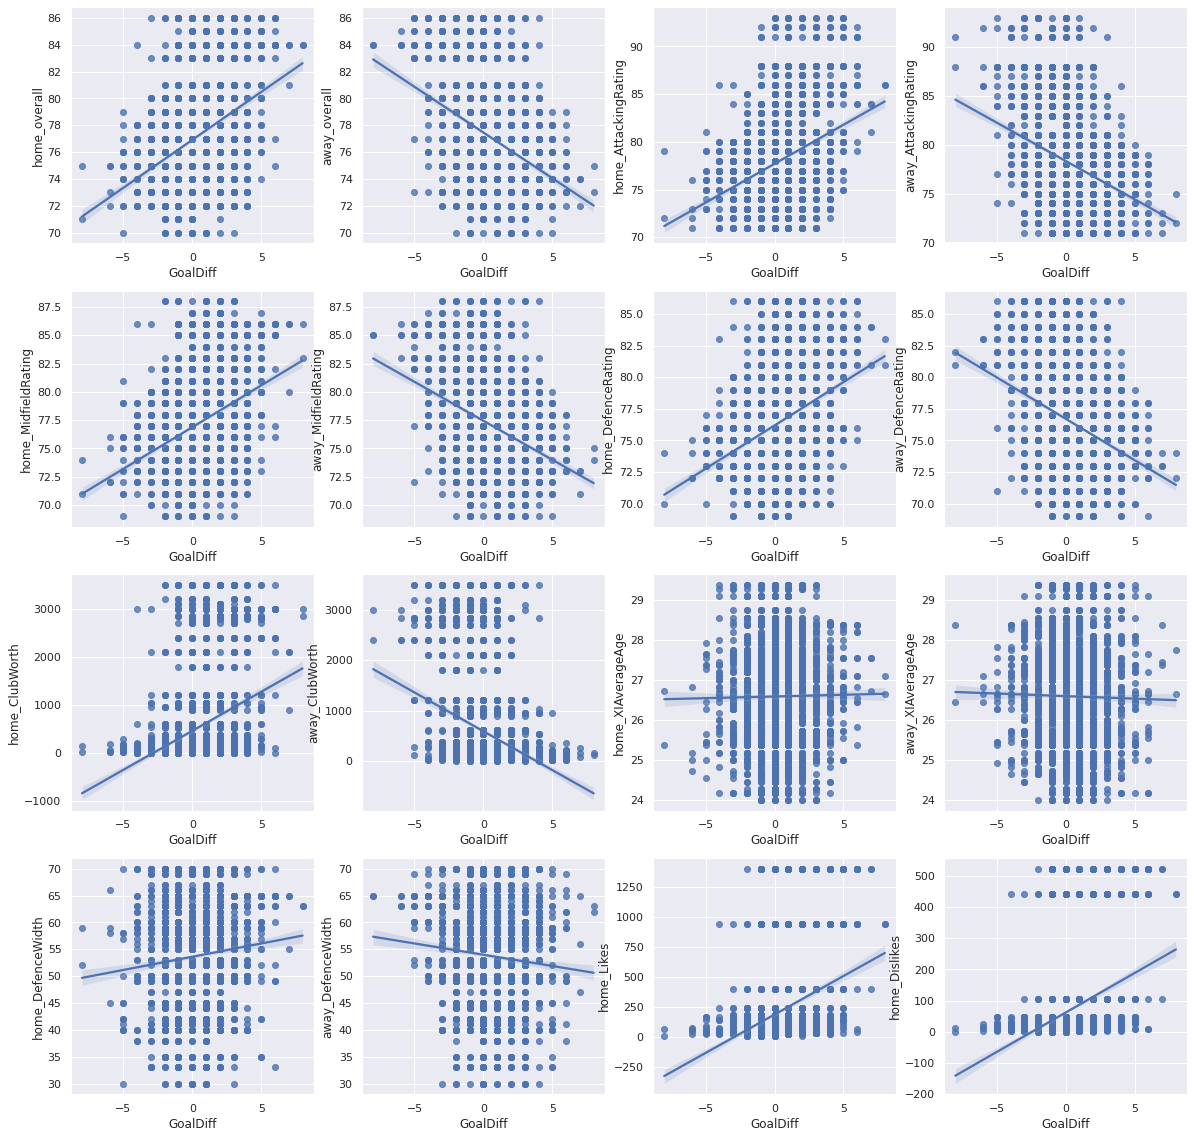

In [127]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
plt.subplot(4,4,1)
sns.regplot(x=df['GoalDiff'], y=df['home_overall'])

plt.subplot(4,4,2)
sns.regplot(x=df['GoalDiff'], y=df['away_overall'])

plt.subplot(4,4,3)
sns.regplot(x=df['GoalDiff'], y=df['home_AttackingRating'])

plt.subplot(4,4,4)
sns.regplot(x=df['GoalDiff'], y=df['away_AttackingRating'])

plt.subplot(4,4,5)
sns.regplot(x=df['GoalDiff'], y=df['home_MidfieldRating'])

plt.subplot(4,4,6)
sns.regplot(x=df['GoalDiff'], y=df['away_MidfieldRating'])

plt.subplot(4,4,7)
sns.regplot(x=df['GoalDiff'], y=df['home_DefenceRating'])

plt.subplot(4,4,8)
sns.regplot(x=df['GoalDiff'], y=df['away_DefenceRating'])

plt.subplot(4,4,9)
sns.regplot(x=df['GoalDiff'], y=df['home_ClubWorth'])

plt.subplot(4,4,10)
sns.regplot(x=df['GoalDiff'], y=df['away_ClubWorth'])

plt.subplot(4,4,11)
sns.regplot(x=df['GoalDiff'], y=df['home_XIAverageAge'])

plt.subplot(4,4,12)
sns.regplot(x=df['GoalDiff'], y=df['away_XIAverageAge'])

plt.subplot(4,4,13)
sns.regplot(x=df['GoalDiff'], y=df['home_DefenceWidth'])

plt.subplot(4,4,14)
sns.regplot(x=df['GoalDiff'], y=df['away_DefenceWidth'])

plt.subplot(4,4,15)
sns.regplot(x=df['GoalDiff'], y=df['home_Likes'])

plt.subplot(4,4,16)
sns.regplot(x=df['GoalDiff'], y=df['home_Dislikes'])

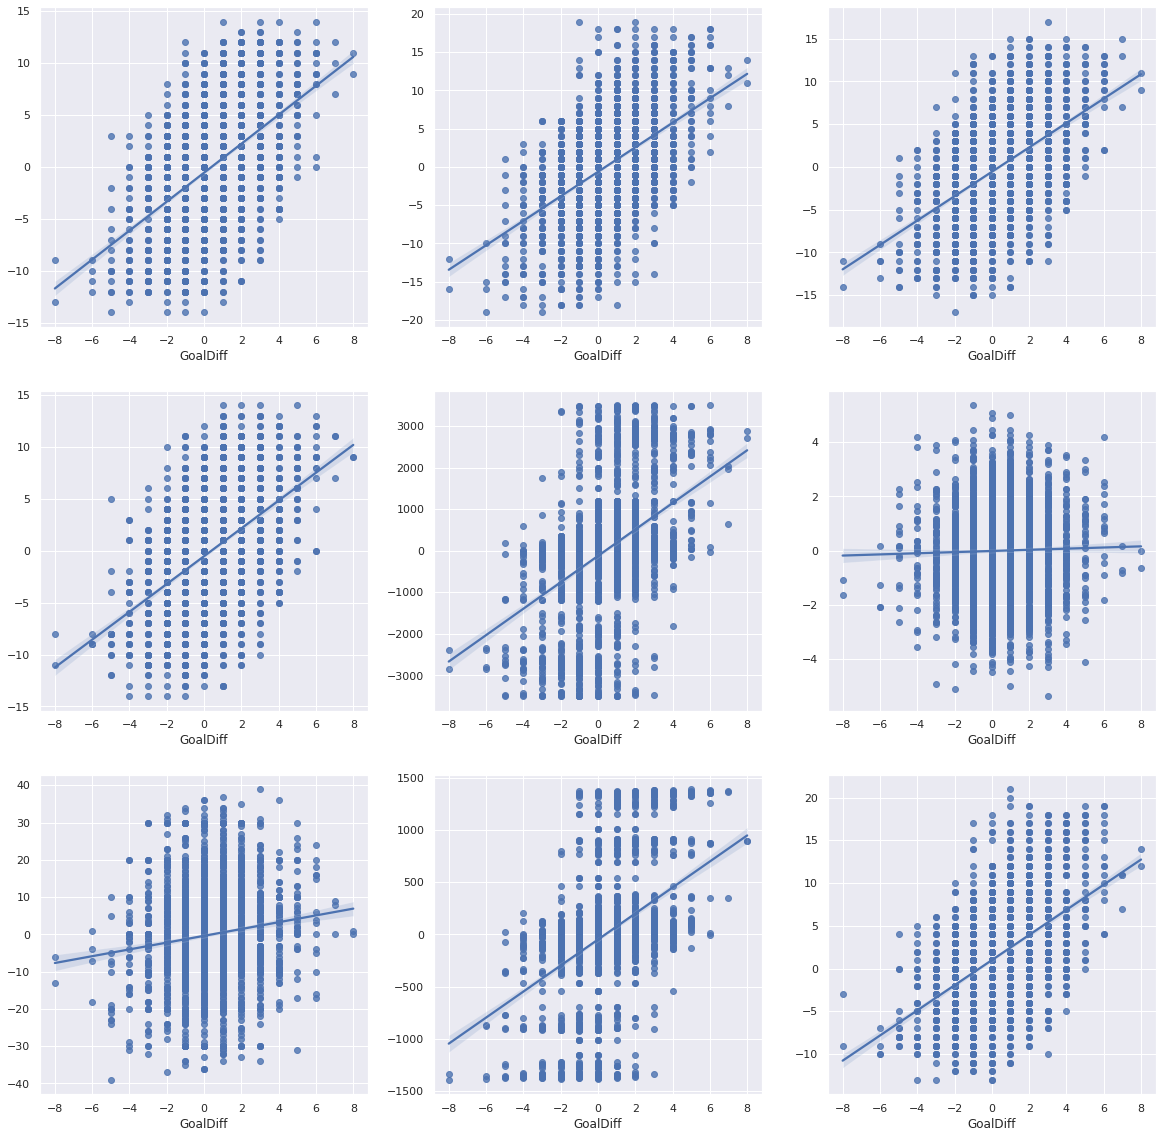

In [128]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.regplot(x=df['GoalDiff'], y=df['home_overall'] - df['away_overall'])

plt.subplot(3,3,2)
sns.regplot(x=df['GoalDiff'], y=df['home_AttackingRating'] - df['away_AttackingRating'])

plt.subplot(3,3,3)
sns.regplot(x=df['GoalDiff'], y=df['home_MidfieldRating'] - df['away_MidfieldRating'])

plt.subplot(3,3,4)
sns.regplot(x=df['GoalDiff'], y=df['home_DefenceRating'] - df['away_DefenceRating'])

plt.subplot(3,3,5)
sns.regplot(x=df['GoalDiff'], y=df['home_ClubWorth'] - df['away_ClubWorth'])

plt.subplot(3,3,6)
sns.regplot(x=df['GoalDiff'], y=df['home_XIAverageAge'] - df['away_XIAverageAge'])

plt.subplot(3,3,7)
sns.regplot(x=df['GoalDiff'], y=df['home_DefenceWidth'] - df['away_DefenceWidth'])

plt.subplot(3,3,8)
sns.regplot(x=df['GoalDiff'], y=df['home_Likes'] - df['away_Likes'])

plt.subplot(3,3,9)
sns.regplot(x=df['GoalDiff'], y=df['home_AttackingRating'] - df['away_DefenceRating'])

# **Df átalakítása traineléshez**

---



In [129]:
df = df.assign(ShotsOnTargetDiff=lambda x: x.homeshotsongoal - x.guestshotsongoal)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   matches               3038 non-null   object        
 1   hometeamname          3038 non-null   object        
 2   guestteamname         3038 non-null   object        
 3   homepossession        3038 non-null   float64       
 4   guestpossession       3038 non-null   float64       
 5   homegoals             3038 non-null   float64       
 6   guestgoals            3038 non-null   float64       
 7   homegoalattempts      3038 non-null   float64       
 8   guestgoalattempts     3038 non-null   float64       
 9   homeshotsongoal       3038 non-null   float64       
 10  guestshotsongoal      3038 non-null   float64       
 11  homeshotsoffgoal      3038 non-null   float64       
 12  guestshotsoffgoal     3038 non-null   float64       
 13  homeblockedshots  

In [131]:
df.head()

,matches,hometeamname,guestteamname,homepossession,guestpossession,homegoals,guestgoals,homegoalattempts,guestgoalattempts,homeshotsongoal,guestshotsongoal,homeshotsoffgoal,guestshotsoffgoal,homeblockedshots,guestblockedshots,homefreekicks,guestfreekicks,homecornerkicks,guestcornerkicks,date,bethomewinodds,betdrawodds,betguestwinodds,homethrowin,guestthrowin,GoalDiff,winner,PredictedHomeOdds,PredictedDrawOdds,PredictedGuestOdds,PredictedWinner,HomeTeamWin,Draw,GuestTeamWin,season,home_overall,away_overall,home_AttackingRating,away_AttackingRating,home_MidfieldRating,away_MidfieldRating,home_DefenceRating,away_DefenceRating,home_ClubWorth,away_ClubWorth,home_XIAverageAge,away_XIAverageAge,home_DefenceWidth,away_DefenceWidth,home_DefenceDepth,away_DefenceDepth,home_OffenceWidth,away_OffenceWidth,home_Likes,away_Likes,home_Dislikes,away_Dislikes,HomeForm,AwayForm,ShotsOnTargetDiff
0,17.08. 19:00Real SociedadGetafe2 - 0(1 - 0),Real_Sociedad,Getafe,51.0,49.0,2.0,0.0,16.0,15.0,7.0,1.0,6.0,12.0,3.0,2.0,10.0,15.0,6.0,5.0,2013-08-17 19:00:00,1.67,3.75,5.0,25.0,24.0,2.0,1.0,3.795312,2.711120,2.657975,1.0,1.0,0.0,0.0,2014.0,77.0,74.0,80.0,73.0,76.0,73.0,76.0,74.0,174.0,249.0,25.73,27.45,65.0,47.0,48.0,49.0,52.0,42.0,140.0,50.0,30.0,19.0,6.0,6.0,6.0
1,17.08. 21:00ValladolidAth Bilbao1 - 2(1 - 1),Valladolid,Ath_Bilbao,58.0,42.0,1.0,2.0,8.0,13.0,2.0,3.0,5.0,8.0,1.0,2.0,9.0,13.0,5.0,5.0,2013-08-17 21:00:00,2.70,3.10,2.7,35.0,30.0,-1.0,-1.0,1.880976,5.012423,3.760858,1.0,0.0,0.0,1.0,2014.0,72.0,76.0,73.0,77.0,72.0,78.0,71.0,75.0,90.0,285.0,28.00,25.73,60.0,65.0,51.0,37.0,68.0,68.0,43.0,145.0,11.0,28.0,4.0,8.0,-1.0
2,17.08. 23:00ValenciaMalaga1 - 0(0 - 0),Valencia,Malaga,63.0,37.0,1.0,0.0,9.0,11.0,1.0,2.0,5.0,5.0,3.0,4.0,23.0,20.0,9.0,6.0,2013-08-17 23:00:00,1.40,4.50,8.0,29.0,22.0,1.0,1.0,4.108138,2.235742,2.760695,1.0,1.0,0.0,0.0,2014.0,77.0,76.0,76.0,75.0,77.0,73.0,76.0,76.0,600.0,300.0,25.91,27.55,59.0,42.0,51.0,64.0,56.0,69.0,243.0,86.0,45.0,25.0,6.0,6.0,-1.0
3,18.08. 19:00BarcelonaLevante7 - 0(6 - 0),Barcelona,Levante,78.0,22.0,7.0,0.0,22.0,4.0,13.0,1.0,4.0,2.0,5.0,1.0,18.0,18.0,9.0,3.0,2013-08-18 19:00:00,1.06,12.00,26.0,21.0,14.0,7.0,1.0,0.874877,14.593257,-5.294981,1.0,1.0,0.0,0.0,2014.0,84.0,74.0,84.0,72.0,86.0,73.0,84.0,73.0,2100.0,75.0,27.55,28.36,65.0,56.0,61.0,47.0,31.0,61.0,1400.0,39.0,523.0,13.0,12.0,6.0,12.0
4,18.08. 21:00OsasunaGranada CF1 - 2(0 - 2),Osasuna,Granada_CF,64.0,36.0,1.0,2.0,14.0,13.0,5.0,4.0,6.0,8.0,3.0,1.0,21.0,14.0,7.0,6.0,2013-08-18 21:00:00,2.00,3.30,3.8,33.0,33.0,-1.0,-1.0,2.192683,4.028142,2.988583,-1.0,0.0,0.0,1.0,2014.0,72.0,73.0,71.0,73.0,71.0,72.0,73.0,71.0,144.0,150.0,27.36,26.27,65.0,64.0,47.0,49.0,59.0,68.0,27.0,45.0,2.0,10.0,4.0,6.0,1.0


In [132]:
cnames = list(df)
cnames

['matches',
 'hometeamname',
 'guestteamname',
 'homepossession',
 'guestpossession',
 'homegoals',
 'guestgoals',
 'homegoalattempts',
 'guestgoalattempts',
 'homeshotsongoal',
 'guestshotsongoal',
 'homeshotsoffgoal',
 'guestshotsoffgoal',
 'homeblockedshots',
 'guestblockedshots',
 'homefreekicks',
 'guestfreekicks',
 'homecornerkicks',
 'guestcornerkicks',
 'date',
 'bethomewinodds',
 'betdrawodds',
 'betguestwinodds',
 'homethrowin',
 'guestthrowin',
 'GoalDiff',
 'winner',
 'PredictedHomeOdds',
 'PredictedDrawOdds',
 'PredictedGuestOdds',
 'PredictedWinner',
 'HomeTeamWin',
 'Draw',
 'GuestTeamWin',
 'season',
 'home_overall',
 'away_overall',
 'home_AttackingRating',
 'away_AttackingRating',
 'home_MidfieldRating',
 'away_MidfieldRating',
 'home_DefenceRating',
 'away_DefenceRating',
 'home_ClubWorth',
 'away_ClubWorth',
 'home_XIAverageAge',
 'away_XIAverageAge',
 'home_DefenceWidth',
 'away_DefenceWidth',
 'home_DefenceDepth',
 'away_DefenceDepth',
 'home_OffenceWidth',
 'away

Adatvizualizációból leszűrhető, hogy jobb összefüggést lehet találni akkor, ha kivonjuk a csapat azonos értékeit, így az összes meccs előtt összegyűjtött adatra alkalmazom a módszert. A tanítást 2 bemenő adathalmazra végzem.: az egyik a különbségfigyelés a másik meg a bontott statisztika

In [133]:
df = df.assign(OverallRatingDiff=lambda x: x.home_overall - x.away_overall)
df = df.assign(AttackingRatingDiff=lambda x: x.home_AttackingRating - x.away_AttackingRating)
df = df.assign(MidfieldRatingDiff=lambda x: x.home_MidfieldRating - x.away_MidfieldRating)
df = df.assign(DefenceRatingDiff=lambda x: x.home_DefenceRating - x.away_DefenceRating)
df = df.assign(AverageAgeDiff=lambda x: x.home_XIAverageAge - x.away_XIAverageAge)
df = df.assign(DefenceWidthDiff=lambda x: x.home_DefenceWidth - x.away_DefenceWidth)
df = df.assign(DefenceDepthDiff=lambda x: x.home_DefenceDepth - x.away_DefenceDepth)
df = df.assign(OffenceWidthDiff=lambda x: x.home_OffenceWidth - x.away_OffenceWidth)
df = df.assign(LikesDiff=lambda x: x.home_Likes - x.away_Likes)
df = df.assign(DislikesDiff=lambda x: x.home_Dislikes - x.away_Dislikes)
df = df.assign(FormDiff=lambda x: x.HomeForm - x.AwayForm)

In [134]:
df = df.drop([
 'homepossession',
 'guestpossession',
 'homegoals',
 'guestgoals',
 'homegoalattempts',
 'guestgoalattempts',
 'homeshotsongoal',
 'guestshotsongoal',
 'homeshotsoffgoal',
 'guestshotsoffgoal',
 'homeblockedshots',
 'guestblockedshots',
 'homefreekicks',
 'guestfreekicks',
 'homecornerkicks',
 'guestcornerkicks',
 'homethrowin',
 'guestthrowin',
 ],axis='columns')

In [135]:
df.head()

,matches,hometeamname,guestteamname,date,bethomewinodds,betdrawodds,betguestwinodds,GoalDiff,winner,PredictedHomeOdds,PredictedDrawOdds,PredictedGuestOdds,PredictedWinner,HomeTeamWin,Draw,GuestTeamWin,season,home_overall,away_overall,home_AttackingRating,away_AttackingRating,home_MidfieldRating,away_MidfieldRating,home_DefenceRating,away_DefenceRating,home_ClubWorth,away_ClubWorth,home_XIAverageAge,away_XIAverageAge,home_DefenceWidth,away_DefenceWidth,home_DefenceDepth,away_DefenceDepth,home_OffenceWidth,away_OffenceWidth,home_Likes,away_Likes,home_Dislikes,away_Dislikes,HomeForm,AwayForm,ShotsOnTargetDiff,OverallRatingDiff,AttackingRatingDiff,MidfieldRatingDiff,DefenceRatingDiff,AverageAgeDiff,DefenceWidthDiff,DefenceDepthDiff,OffenceWidthDiff,LikesDiff,DislikesDiff,FormDiff
0,17.08. 19:00Real SociedadGetafe2 - 0(1 - 0),Real_Sociedad,Getafe,2013-08-17 19:00:00,1.67,3.75,5.0,2.0,1.0,3.795312,2.711120,2.657975,1.0,1.0,0.0,0.0,2014.0,77.0,74.0,80.0,73.0,76.0,73.0,76.0,74.0,174.0,249.0,25.73,27.45,65.0,47.0,48.0,49.0,52.0,42.0,140.0,50.0,30.0,19.0,6.0,6.0,6.0,3.0,7.0,3.0,2.0,-1.72,18.0,-1.0,10.0,90.0,11.0,0.0
1,17.08. 21:00ValladolidAth Bilbao1 - 2(1 - 1),Valladolid,Ath_Bilbao,2013-08-17 21:00:00,2.70,3.10,2.7,-1.0,-1.0,1.880976,5.012423,3.760858,1.0,0.0,0.0,1.0,2014.0,72.0,76.0,73.0,77.0,72.0,78.0,71.0,75.0,90.0,285.0,28.00,25.73,60.0,65.0,51.0,37.0,68.0,68.0,43.0,145.0,11.0,28.0,4.0,8.0,-1.0,-4.0,-4.0,-6.0,-4.0,2.27,-5.0,14.0,0.0,-102.0,-17.0,-4.0
2,17.08. 23:00ValenciaMalaga1 - 0(0 - 0),Valencia,Malaga,2013-08-17 23:00:00,1.40,4.50,8.0,1.0,1.0,4.108138,2.235742,2.760695,1.0,1.0,0.0,0.0,2014.0,77.0,76.0,76.0,75.0,77.0,73.0,76.0,76.0,600.0,300.0,25.91,27.55,59.0,42.0,51.0,64.0,56.0,69.0,243.0,86.0,45.0,25.0,6.0,6.0,-1.0,1.0,1.0,4.0,0.0,-1.64,17.0,-13.0,-13.0,157.0,20.0,0.0
3,18.08. 19:00BarcelonaLevante7 - 0(6 - 0),Barcelona,Levante,2013-08-18 19:00:00,1.06,12.00,26.0,7.0,1.0,0.874877,14.593257,-5.294981,1.0,1.0,0.0,0.0,2014.0,84.0,74.0,84.0,72.0,86.0,73.0,84.0,73.0,2100.0,75.0,27.55,28.36,65.0,56.0,61.0,47.0,31.0,61.0,1400.0,39.0,523.0,13.0,12.0,6.0,12.0,10.0,12.0,13.0,11.0,-0.81,9.0,14.0,-30.0,1361.0,510.0,6.0
4,18.08. 21:00OsasunaGranada CF1 - 2(0 - 2),Osasuna,Granada_CF,2013-08-18 21:00:00,2.00,3.30,3.8,-1.0,-1.0,2.192683,4.028142,2.988583,-1.0,0.0,0.0,1.0,2014.0,72.0,73.0,71.0,73.0,71.0,72.0,73.0,71.0,144.0,150.0,27.36,26.27,65.0,64.0,47.0,49.0,59.0,68.0,27.0,45.0,2.0,10.0,4.0,6.0,1.0,-1.0,-2.0,-1.0,2.0,1.09,1.0,-2.0,-9.0,-18.0,-8.0,-2.0


# **TRAIN TESZT KÉSZÍTÉS**

---



In [136]:
from sklearn.model_selection import train_test_split

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   matches               3038 non-null   object        
 1   hometeamname          3038 non-null   object        
 2   guestteamname         3038 non-null   object        
 3   date                  3038 non-null   datetime64[ns]
 4   bethomewinodds        3038 non-null   float64       
 5   betdrawodds           3038 non-null   float64       
 6   betguestwinodds       3038 non-null   float64       
 7   GoalDiff              3038 non-null   float64       
 8   winner                3038 non-null   float64       
 9   PredictedHomeOdds     3038 non-null   float64       
 10  PredictedDrawOdds     3038 non-null   float64       
 11  PredictedGuestOdds    3038 non-null   float64       
 12  PredictedWinner       3038 non-null   float64       
 13  HomeTeamWin       

In [138]:
cnames = list(df)
cnames

['matches',
 'hometeamname',
 'guestteamname',
 'date',
 'bethomewinodds',
 'betdrawodds',
 'betguestwinodds',
 'GoalDiff',
 'winner',
 'PredictedHomeOdds',
 'PredictedDrawOdds',
 'PredictedGuestOdds',
 'PredictedWinner',
 'HomeTeamWin',
 'Draw',
 'GuestTeamWin',
 'season',
 'home_overall',
 'away_overall',
 'home_AttackingRating',
 'away_AttackingRating',
 'home_MidfieldRating',
 'away_MidfieldRating',
 'home_DefenceRating',
 'away_DefenceRating',
 'home_ClubWorth',
 'away_ClubWorth',
 'home_XIAverageAge',
 'away_XIAverageAge',
 'home_DefenceWidth',
 'away_DefenceWidth',
 'home_DefenceDepth',
 'away_DefenceDepth',
 'home_OffenceWidth',
 'away_OffenceWidth',
 'home_Likes',
 'away_Likes',
 'home_Dislikes',
 'away_Dislikes',
 'HomeForm',
 'AwayForm',
 'ShotsOnTargetDiff',
 'OverallRatingDiff',
 'AttackingRatingDiff',
 'MidfieldRatingDiff',
 'DefenceRatingDiff',
 'AverageAgeDiff',
 'DefenceWidthDiff',
 'DefenceDepthDiff',
 'OffenceWidthDiff',
 'LikesDiff',
 'DislikesDiff',
 'FormDiff']

In [139]:
#train test halmaz kiválasztása
X = df.loc[:,[
              'OverallRatingDiff',
              'AttackingRatingDiff',
              'MidfieldRatingDiff',
              'DefenceRatingDiff',
              'AverageAgeDiff',
              'DefenceWidthDiff',
              'DefenceDepthDiff',
              'OffenceWidthDiff',
              'FormDiff',
              'bethomewinodds',
              'betdrawodds',
              'betguestwinodds'
              ]]
y = df.loc[:,['winner']]
print(X)
print(y)

      OverallRatingDiff  AttackingRatingDiff  ...  betdrawodds  betguestwinodds
0                   3.0                  7.0  ...         3.75             5.00
1                  -4.0                 -4.0  ...         3.10             2.70
2                   1.0                  1.0  ...         4.50             8.00
3                  10.0                 12.0  ...        12.00            26.00
4                  -1.0                 -2.0  ...         3.30             3.80
...                 ...                  ...  ...          ...              ...
3033               -3.0                 -5.0  ...         4.50             1.50
3034                4.0                  1.0  ...         4.50             5.50
3035               -8.0                 -9.0  ...         5.50             1.30
3036                1.0                  0.0  ...         3.25             2.37
3037                5.0                  3.0  ...         5.25             8.00

[3038 rows x 12 columns]
      winner
0

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

29160
2430


In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2430 entries, 2406 to 2016
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OverallRatingDiff    2430 non-null   float64
 1   AttackingRatingDiff  2430 non-null   float64
 2   MidfieldRatingDiff   2430 non-null   float64
 3   DefenceRatingDiff    2430 non-null   float64
 4   AverageAgeDiff       2430 non-null   float64
 5   DefenceWidthDiff     2430 non-null   float64
 6   DefenceDepthDiff     2430 non-null   float64
 7   OffenceWidthDiff     2430 non-null   float64
 8   FormDiff             2430 non-null   float64
 9   bethomewinodds       2430 non-null   float64
 10  betdrawodds          2430 non-null   float64
 11  betguestwinodds      2430 non-null   float64
dtypes: float64(12)
memory usage: 246.8 KB


# **Feature Selection**

---



In [142]:
from numpy import std
from numpy import mean
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [143]:
def run_randomForest(X_train,X_test ,y_train,y_test):
  clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('Accuracy: ', accuracy_score(y_test, y_pred))

In [144]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)
dtcmodel = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',dtcmodel)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores

array([0.42269737, 0.41118421, 0.4375    , 0.46622735, 0.45799012,
       0.42434211, 0.42434211, 0.45065789, 0.43163097, 0.46622735,
       0.45065789, 0.42927632, 0.40460526, 0.42009885, 0.45963756])

In [145]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.437 (0.019)


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

29160
2430


SelectFromModel módszerrel

In [147]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1))
sel.fit(X_train, y_train)
#random forrest után melyikeket találta hasznosnak(true)
sel.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


array([False, False, False, False,  True,  True, False,  True, False,
        True, False,  True])

In [148]:
len(sel.get_support())

12

In [149]:
#random forrest után melyikeket találta hasznosnak
features = X_train.columns[sel.get_support()]
features

Index(['AverageAgeDiff', 'DefenceWidthDiff', 'OffenceWidthDiff',
       'bethomewinodds', 'betguestwinodds'],
      dtype='object')

In [150]:
np.mean(sel.estimator_.feature_importances_)

0.08333333333333333

In [151]:
sel.estimator_.feature_importances_

array([0.07176795, 0.07559646, 0.06648132, 0.0640643 , 0.10162387,
       0.08475512, 0.08246111, 0.08922593, 0.0758638 , 0.10829103,
       0.07289146, 0.10697765])

In [152]:
X_train.columns

Index(['OverallRatingDiff', 'AttackingRatingDiff', 'MidfieldRatingDiff',
       'DefenceRatingDiff', 'AverageAgeDiff', 'DefenceWidthDiff',
       'DefenceDepthDiff', 'OffenceWidthDiff', 'FormDiff', 'bethomewinodds',
       'betdrawodds', 'betguestwinodds'],
      dtype='object')

In [153]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1), n_features_to_select=14)
sel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X[:, features], y, **fit_params)


RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=14)

In [154]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
#Hosszú fv a RFE tesztelésre, hogy hány attr a legalkalmasabb
for index in range(2,14):
  sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select=index)
  sel.fit(X_train, y_train)
  X_train_rfe = sel.transform(X_train)
  X_test_rfe = sel.transform(X_test)
  print('Selected features?', index)
  run_randomForest(X_train_rfe,X_test_rfe,y_train,y_test)
  print()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.46710526315789475



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.4555921052631579



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.45723684210526316



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.46875



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.47368421052631576



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.46875



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.48026315789473684



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Selected features? 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.4934210526315789



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected features? 10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.4868421052631579



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected features? 11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.5082236842105263



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected features? 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.5115131578947368



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected features? 13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  0.5115131578947368



# **TRAIN TESZT KÉSZÍTÉS**

---



In [157]:
from sklearn.model_selection import train_test_split

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   matches               3038 non-null   object        
 1   hometeamname          3038 non-null   object        
 2   guestteamname         3038 non-null   object        
 3   date                  3038 non-null   datetime64[ns]
 4   bethomewinodds        3038 non-null   float64       
 5   betdrawodds           3038 non-null   float64       
 6   betguestwinodds       3038 non-null   float64       
 7   GoalDiff              3038 non-null   float64       
 8   winner                3038 non-null   float64       
 9   PredictedHomeOdds     3038 non-null   float64       
 10  PredictedDrawOdds     3038 non-null   float64       
 11  PredictedGuestOdds    3038 non-null   float64       
 12  PredictedWinner       3038 non-null   float64       
 13  HomeTeamWin       

In [159]:
cnames = list(df)
cnames

['matches',
 'hometeamname',
 'guestteamname',
 'date',
 'bethomewinodds',
 'betdrawodds',
 'betguestwinodds',
 'GoalDiff',
 'winner',
 'PredictedHomeOdds',
 'PredictedDrawOdds',
 'PredictedGuestOdds',
 'PredictedWinner',
 'HomeTeamWin',
 'Draw',
 'GuestTeamWin',
 'season',
 'home_overall',
 'away_overall',
 'home_AttackingRating',
 'away_AttackingRating',
 'home_MidfieldRating',
 'away_MidfieldRating',
 'home_DefenceRating',
 'away_DefenceRating',
 'home_ClubWorth',
 'away_ClubWorth',
 'home_XIAverageAge',
 'away_XIAverageAge',
 'home_DefenceWidth',
 'away_DefenceWidth',
 'home_DefenceDepth',
 'away_DefenceDepth',
 'home_OffenceWidth',
 'away_OffenceWidth',
 'home_Likes',
 'away_Likes',
 'home_Dislikes',
 'away_Dislikes',
 'HomeForm',
 'AwayForm',
 'ShotsOnTargetDiff',
 'OverallRatingDiff',
 'AttackingRatingDiff',
 'MidfieldRatingDiff',
 'DefenceRatingDiff',
 'AverageAgeDiff',
 'DefenceWidthDiff',
 'DefenceDepthDiff',
 'OffenceWidthDiff',
 'LikesDiff',
 'DislikesDiff',
 'FormDiff']

In [160]:
#train test halmaz kiválasztása
X = df.loc[:,[
              'OverallRatingDiff',
              'AttackingRatingDiff',
              'MidfieldRatingDiff',
              'DefenceRatingDiff',
              'AverageAgeDiff',
              'DefenceWidthDiff',
              'DefenceDepthDiff',
              'OffenceWidthDiff',
              'FormDiff',
              'LikesDiff',
              'DislikesDiff',
              'bethomewinodds',
              'betdrawodds',
              'betguestwinodds'
              ]]
y = df.loc[:,['HomeTeamWin','Draw','GuestTeamWin']]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [162]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2430 entries, 2603 to 2689
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OverallRatingDiff    2430 non-null   float64
 1   AttackingRatingDiff  2430 non-null   float64
 2   MidfieldRatingDiff   2430 non-null   float64
 3   DefenceRatingDiff    2430 non-null   float64
 4   AverageAgeDiff       2430 non-null   float64
 5   DefenceWidthDiff     2430 non-null   float64
 6   DefenceDepthDiff     2430 non-null   float64
 7   OffenceWidthDiff     2430 non-null   float64
 8   FormDiff             2430 non-null   float64
 9   LikesDiff            2430 non-null   float64
 10  DislikesDiff         2430 non-null   float64
 11  bethomewinodds       2430 non-null   float64
 12  betdrawodds          2430 non-null   float64
 13  betguestwinodds      2430 non-null   float64
dtypes: float64(14)
memory usage: 284.8 KB


# **TENSORFLOW (Egyetlen réteg, ami 3 kimenetből áll(gyakorlatilag lineáris súlyok képzése az egyes attribútumokhoz))**

---



https://www.youtube.com/watch?v=6_2hzRopPbQ&ab_channel=NicholasRenotte
https://www.youtube.com/watch?v=bqBRET7tbiQ&ab_channel=DigitalSreeni

In [163]:
from tensorflow import keras
from tensorflow import lite

In [164]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
scaler_mm = MinMaxScaler()
#scaler_mm.fit(X)
X = scaler_mm.fit_transform(X)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify = y)

https://www.youtube.com/watch?v=Edhv7-4t0lc&ab_channel=PythonEngineer

In [168]:
neuralmodelraw = Sequential()
neuralmodelraw.add(Dense(3, input_dim=X_train.shape[1]))
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

neuralmodelraw.compile(loss=loss, optimizer=optim, metrics=metrics)
print(neuralmodelraw.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fae455a3190>>


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [169]:
neuralmodelraw.fit(X_train, y_train, verbose = 1, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
76/76 [==============================] - 2s 6ms/step - loss: 1.2691 - accuracy: 0.2506 - val_loss: 1.1663 - val_accuracy: 0.2615
Epoch 2/300
76/76 [==============================] - 0s 4ms/step - loss: 1.1241 - accuracy: 0.3481 - val_loss: 1.0892 - val_accuracy: 0.4457
Epoch 3/300
76/76 [==============================] - 0s 4ms/step - loss: 1.0784 - accuracy: 0.4560 - val_loss: 1.0663 - val_accuracy: 0.4605
Epoch 4/300
76/76 [==============================] - 0s 4ms/step - loss: 1.0629 - accuracy: 0.4580 - val_loss: 1.0559 - val_accuracy: 0.4589
Epoch 5/300
76/76 [==============================] - 0s 4ms/step - loss: 1.0532 - accuracy: 0.4580 - val_loss: 1.0475 - val_accuracy: 0.4589
Epoch 6/300
76/76 [==============================] - 0s 4ms/step - loss: 1.0447 - accuracy: 0.4580 - val_loss: 1.0400 - val_accuracy: 0.4589
Epoch 7/300
76/76 [==============================] - 0s 4ms/step - loss: 1.0371 - accuracy: 0.4580 - val_loss: 1.0330 - val_accuracy: 0.4589
Epoch 8/300
7

In [170]:
probability_model = keras.models.Sequential([
                                             neuralmodelraw,
                                             keras.layers.Softmax()
])

In [171]:
y_hat = probability_model.predict(X_test)
y_hat

array([[0.21414568, 0.22215915, 0.56369513],
       [0.7254645 , 0.18358903, 0.09094641],
       [0.26616144, 0.34319767, 0.39064088],
       ...,
       [0.24600115, 0.2531471 , 0.50085175],
       [0.31693998, 0.2987674 , 0.3842926 ],
       [0.62667876, 0.2253771 , 0.14794412]], dtype=float32)

In [172]:
y_hat = pd.DataFrame(y_hat, columns = ['hometeam','draw','guest'])
y_hat.head()

,hometeam,draw,guest
0,0.214146,0.222159,0.563695
1,0.725465,0.183589,0.090946
2,0.266161,0.343198,0.390641
3,0.437796,0.307021,0.255183
4,0.380142,0.324085,0.295773


In [173]:
for idx in y_hat.index: 
  if y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'draw'] and y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 1
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 1
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'draw']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 1

accuracy_score(y_test, y_hat)

0.5476973684210527



---



In [174]:
dfhelp = probability_model.predict(X)
dfhelp = pd.DataFrame(dfhelp, columns = ['Homepredodds','Drawpredodds','Guestpredodds'])
home = dfhelp['Homepredodds']

print(dfhelp['Homepredodds'].max())
print(dfhelp['Homepredodds'].min())
print(dfhelp['Drawpredodds'].max())
print(dfhelp['Drawpredodds'].min())
print(dfhelp['Guestpredodds'].max())
print(dfhelp['Guestpredodds'].min())

0.991603434085846
0.011256711557507515
0.37607449293136597
0.0067414590157568455
0.95174640417099
0.0015229907585307956


In [175]:
df['PredictedHomeOdds'] = dfhelp['Homepredodds'].map(lambda x: 1/x).astype(float)
df['PredictedDrawOdds'] = dfhelp['Drawpredodds'].map(lambda x: 1/x).astype(float)
df['PredictedGuestOdds'] = dfhelp['Guestpredodds'].map(lambda x: 1/x).astype(float)
#helyes oddsok kiszámolása
def correctodds(a, b, c, d):
    teljesesemenyter = 1/a + 1/b +1/c
    corrodds =1/((1/d) / teljesesemenyter)
    return corrodds

df = df.assign(CurrectHomeOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedHomeOdds))
df = df.assign(CurrectDrawOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedDrawOdds))
df = df.assign(CurrectGuestOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedGuestOdds))
df.head()

,matches,hometeamname,guestteamname,date,bethomewinodds,betdrawodds,betguestwinodds,GoalDiff,winner,PredictedHomeOdds,PredictedDrawOdds,PredictedGuestOdds,PredictedWinner,HomeTeamWin,Draw,GuestTeamWin,season,home_overall,away_overall,home_AttackingRating,away_AttackingRating,home_MidfieldRating,away_MidfieldRating,home_DefenceRating,away_DefenceRating,home_ClubWorth,away_ClubWorth,home_XIAverageAge,away_XIAverageAge,home_DefenceWidth,away_DefenceWidth,home_DefenceDepth,away_DefenceDepth,home_OffenceWidth,away_OffenceWidth,home_Likes,away_Likes,home_Dislikes,away_Dislikes,HomeForm,AwayForm,ShotsOnTargetDiff,OverallRatingDiff,AttackingRatingDiff,MidfieldRatingDiff,DefenceRatingDiff,AverageAgeDiff,DefenceWidthDiff,DefenceDepthDiff,OffenceWidthDiff,LikesDiff,DislikesDiff,FormDiff,CurrectHomeOdds,CurrectDrawOdds,CurrectGuestOdds
0,17.08. 19:00Real SociedadGetafe2 - 0(1 - 0),Real_Sociedad,Getafe,2013-08-17 19:00:00,1.67,3.75,5.0,2.0,1.0,1.645673,4.194956,6.495005,1.0,1.0,0.0,0.0,2014.0,77.0,74.0,80.0,73.0,76.0,73.0,76.0,74.0,174.0,249.0,25.73,27.45,65.0,47.0,48.0,49.0,52.0,42.0,140.0,50.0,30.0,19.0,6.0,6.0,6.0,3.0,7.0,3.0,2.0,-1.72,18.0,-1.0,10.0,90.0,11.0,0.0,1.645673,4.194956,6.495006
1,17.08. 21:00ValladolidAth Bilbao1 - 2(1 - 1),Valladolid,Ath_Bilbao,2013-08-17 21:00:00,2.70,3.10,2.7,-1.0,-1.0,3.501210,3.364939,2.396919,1.0,0.0,0.0,1.0,2014.0,72.0,76.0,73.0,77.0,72.0,78.0,71.0,75.0,90.0,285.0,28.00,25.73,60.0,65.0,51.0,37.0,68.0,68.0,43.0,145.0,11.0,28.0,4.0,8.0,-1.0,-4.0,-4.0,-6.0,-4.0,2.27,-5.0,14.0,0.0,-102.0,-17.0,-4.0,3.501211,3.364939,2.396919
2,17.08. 23:00ValenciaMalaga1 - 0(0 - 0),Valencia,Malaga,2013-08-17 23:00:00,1.40,4.50,8.0,1.0,1.0,1.631047,4.193310,6.737555,1.0,1.0,0.0,0.0,2014.0,77.0,76.0,76.0,75.0,77.0,73.0,76.0,76.0,600.0,300.0,25.91,27.55,59.0,42.0,51.0,64.0,56.0,69.0,243.0,86.0,45.0,25.0,6.0,6.0,-1.0,1.0,1.0,4.0,0.0,-1.64,17.0,-13.0,-13.0,157.0,20.0,0.0,1.631047,4.193311,6.737555
3,18.08. 19:00BarcelonaLevante7 - 0(6 - 0),Barcelona,Levante,2013-08-18 19:00:00,1.06,12.00,26.0,7.0,1.0,1.050747,26.278420,97.639229,1.0,1.0,0.0,0.0,2014.0,84.0,74.0,84.0,72.0,86.0,73.0,84.0,73.0,2100.0,75.0,27.55,28.36,65.0,56.0,61.0,47.0,31.0,61.0,1400.0,39.0,523.0,13.0,12.0,6.0,12.0,10.0,12.0,13.0,11.0,-0.81,9.0,14.0,-30.0,1361.0,510.0,6.0,1.050747,26.278419,97.639226
4,18.08. 21:00OsasunaGranada CF1 - 2(0 - 2),Osasuna,Granada_CF,2013-08-18 21:00:00,2.00,3.30,3.8,-1.0,-1.0,2.315820,3.282874,3.793966,-1.0,0.0,0.0,1.0,2014.0,72.0,73.0,71.0,73.0,71.0,72.0,73.0,71.0,144.0,150.0,27.36,26.27,65.0,64.0,47.0,49.0,59.0,68.0,27.0,45.0,2.0,10.0,4.0,6.0,1.0,-1.0,-2.0,-1.0,2.0,1.09,1.0,-2.0,-9.0,-18.0,-8.0,-2.0,2.315820,3.282874,3.793966


In [176]:
money = 10000
money_history = []
for idx in range(0,50): 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'CurrectHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betdrawodds'] > df.loc[idx, 'CurrectDrawOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 0:
      betwin = 0.25 * money * df.loc[idx, 'betdrawodds']
    elif df.loc[idx, 'winner'] != 0:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betguestwinodds'] > df.loc[idx, 'CurrectGuestOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == -1:
      betwin = 0.25 * money * df.loc[idx, 'betguestwinodds']
    elif df.loc[idx, 'winner'] != -1:
      betwin = 0
    money = money + betwin
    money_history.append(money)

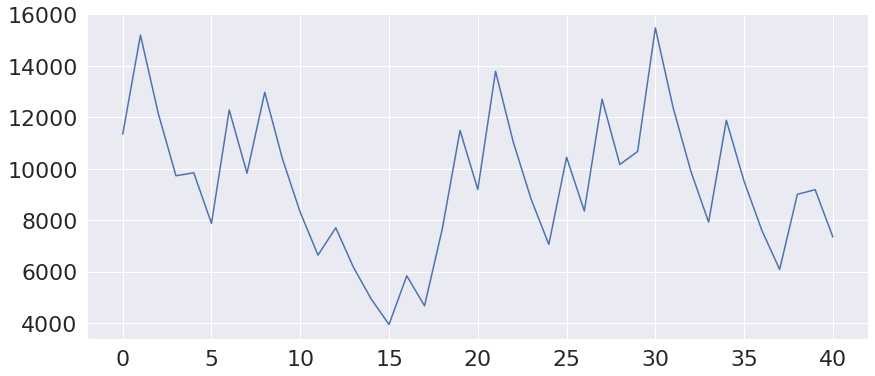

In [177]:
plt.figure(figsize=(14,6))
sns.set(font_scale=2)
sns.lineplot(data =money_history)

In [178]:
money_history

[11340.0,
 15195.6,
 12156.480000000001,
 9725.184000000001,
 9841.886208000002,
 7873.508966400002,
 12282.673987584003,
 9826.139190067202,
 12970.503730888708,
 10376.402984710967,
 8301.122387768773,
 6640.897910215019,
 7703.441575849422,
 6162.7532606795385,
 4930.202608543631,
 3944.162086834905,
 5837.35988851566,
 4669.887910812528,
 7658.616173732547,
 11487.924260598822,
 9190.339408479058,
 13785.509112718588,
 11028.407290174871,
 8822.725832139897,
 7058.180665711918,
 10446.10738525364,
 8356.885908202912,
 12702.466580468426,
 10161.973264374741,
 10670.071927593479,
 15471.604295010544,
 12377.283436008436,
 9901.82674880675,
 7921.461399045401,
 11882.192098568103,
 9505.753678854482,
 7604.602943083586,
 6083.68235446687,
 9003.849884610967,
 9183.926882303187,
 7347.14150584255]

In [179]:
from sklearn.metrics import plot_confusion_matrix
import itertools

In [180]:
conf_pred = []
for idx in y_hat.index:
  if(y_hat.loc[idx, 'hometeam'] == 1):
    conf_pred.append(1)
  if(y_hat.loc[idx, 'draw'] == 1):
    conf_pred.append(0)
  if(y_hat.loc[idx, 'guest'] == 1):
    conf_pred.append(-1)

conf_test = []
for ys in y_test.index:
  if(y_test.loc[ys, 'HomeTeamWin'] ==1):
    conf_test.append(1)
  if(y_test.loc[ys, 'Draw'] ==1):
    conf_test.append(0)
  if(y_test.loc[ys, 'GuestTeamWin'] ==1):
    conf_test.append(-1)

In [181]:
conf_pred

[-1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,


Text(131.0, 0.5, 'Valós eredmény')

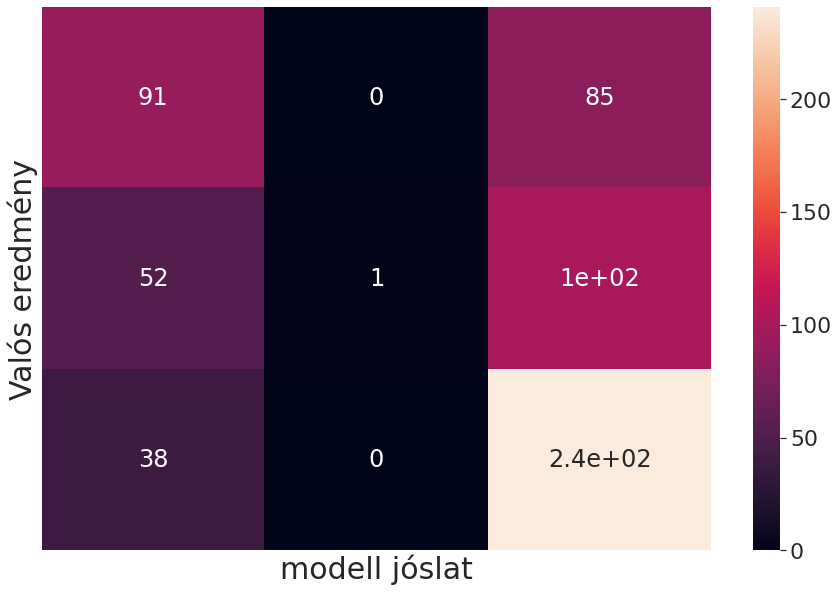

In [182]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(conf_test, conf_pred)
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
f = sns.heatmap(cm, annot=True,xticklabels=False,yticklabels=False)
f.set_xlabel("modell jóslat",fontsize=30)
f.set_ylabel("Valós eredmény",fontsize=30)




---



In [183]:
#model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1]), keras.layers.Dense(units=1,input_shape=[1])])

In [184]:
#model.compile(optimizer='sgd', loss='mean_squared_error')

In [185]:
#model.fit(X, y, epochs=100)

In [186]:
#print(model.predict([0]))

In [187]:
kearas_file = "oddstest.h5"

In [188]:
tf_lite_filename = "dfwinnerpredictone.tflite"

In [189]:
converter = lite.TFLiteConverter.from_keras_model(probability_model)

In [190]:
tfmodel = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpngu6wlzk/assets


In [191]:
tfmodel_name = tf_lite_filename
open(tfmodel_name,"wb").write(tfmodel)

1316

In [192]:
tf.keras.models.save_model(tfmodel, kearas_file)

AttributeError: ignored

# **TENSORFLOW (Egy köztes réteg)**

---



https://www.youtube.com/watch?v=6_2hzRopPbQ&ab_channel=NicholasRenotte
https://www.youtube.com/watch?v=bqBRET7tbiQ&ab_channel=DigitalSreeni

In [193]:
from sklearn.preprocessing import MinMaxScaler

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify = y)

In [195]:
neuralmodelraw_2 = Sequential()
neuralmodelraw_2.add(Dense(units = 32, activation='relu', input_dim=X_train.shape[1]))
neuralmodelraw_2.add(Dense(3))
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

neuralmodelraw_2.compile(loss=loss, optimizer=optim, metrics=metrics)
print(neuralmodelraw_2.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fae40689090>>


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [196]:
neuralmodelraw_2.fit(X_train, y_train, verbose = 1, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
76/76 [==============================] - 1s 6ms/step - loss: 1.0444 - accuracy: 0.4584 - val_loss: 1.0259 - val_accuracy: 0.4638
Epoch 2/300
76/76 [==============================] - 0s 4ms/step - loss: 1.0138 - accuracy: 0.4938 - val_loss: 0.9996 - val_accuracy: 0.5082
Epoch 3/300
76/76 [==============================] - 0s 4ms/step - loss: 0.9882 - accuracy: 0.5222 - val_loss: 0.9733 - val_accuracy: 0.5329
Epoch 4/300
76/76 [==============================] - 0s 4ms/step - loss: 0.9711 - accuracy: 0.5309 - val_loss: 0.9667 - val_accuracy: 0.5345
Epoch 5/300
76/76 [==============================] - 0s 4ms/step - loss: 0.9667 - accuracy: 0.5300 - val_loss: 0.9579 - val_accuracy: 0.5312
Epoch 6/300
76/76 [==============================] - 0s 4ms/step - loss: 0.9626 - accuracy: 0.5296 - val_loss: 0.9553 - val_accuracy: 0.5345
Epoch 7/300
76/76 [==============================] - 0s 4ms/step - loss: 0.9605 - accuracy: 0.5342 - val_loss: 0.9563 - val_accuracy: 0.5362
Epoch 8/300
7

In [197]:
neuralmodel_2 = keras.models.Sequential([
                                             neuralmodelraw_2,
                                             keras.layers.Softmax()
])

In [198]:
y_hat = neuralmodel_2.predict(X_test)
y_hat

array([[0.16405728, 0.21347933, 0.6224634 ],
       [0.77723426, 0.1719665 , 0.05079925],
       [0.23950349, 0.35985717, 0.4006393 ],
       ...,
       [0.1642781 , 0.2463242 , 0.5893977 ],
       [0.28141904, 0.24099049, 0.4775904 ],
       [0.6138174 , 0.236133  , 0.15004961]], dtype=float32)

In [199]:
y_hat = pd.DataFrame(y_hat, columns = ['hometeam','draw','guest'])
y_hat.head()

,hometeam,draw,guest
0,0.164057,0.213479,0.622463
1,0.777234,0.171966,0.050799
2,0.239503,0.359857,0.400639
3,0.418878,0.303798,0.277323
4,0.315397,0.365146,0.319457


In [200]:
for idx in y_hat.index: 
  if y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'draw'] and y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 1
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 1
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'draw']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 1

In [201]:
y_hat.head()

,hometeam,draw,guest
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [202]:
accuracy_score(y_test, y_hat)

0.5592105263157895



---



In [203]:
dfhelp = neuralmodel_2.predict(X)
dfhelp = pd.DataFrame(dfhelp, columns = ['Homepredodds','Drawpredodds','Guestpredodds'])
home = dfhelp['Homepredodds']

print(dfhelp['Homepredodds'].max())
print(dfhelp['Homepredodds'].min())
print(dfhelp['Drawpredodds'].max())
print(dfhelp['Drawpredodds'].min())
print(dfhelp['Guestpredodds'].max())
print(dfhelp['Guestpredodds'].min())

0.9642801880836487
0.005799409467726946
0.4944292902946472
0.012322512455284595
0.9818781018257141
0.006671525537967682


In [204]:
df['PredictedHomeOdds'] = dfhelp['Homepredodds'].map(lambda x: 1/x).astype(float)
df['PredictedDrawOdds'] = dfhelp['Drawpredodds'].map(lambda x: 1/x).astype(float)
df['PredictedGuestOdds'] = dfhelp['Guestpredodds'].map(lambda x: 1/x).astype(float)

In [205]:
df.head(10)

,matches,hometeamname,guestteamname,date,bethomewinodds,betdrawodds,betguestwinodds,GoalDiff,winner,PredictedHomeOdds,PredictedDrawOdds,PredictedGuestOdds,PredictedWinner,HomeTeamWin,Draw,GuestTeamWin,season,home_overall,away_overall,home_AttackingRating,away_AttackingRating,home_MidfieldRating,away_MidfieldRating,home_DefenceRating,away_DefenceRating,home_ClubWorth,away_ClubWorth,home_XIAverageAge,away_XIAverageAge,home_DefenceWidth,away_DefenceWidth,home_DefenceDepth,away_DefenceDepth,home_OffenceWidth,away_OffenceWidth,home_Likes,away_Likes,home_Dislikes,away_Dislikes,HomeForm,AwayForm,ShotsOnTargetDiff,OverallRatingDiff,AttackingRatingDiff,MidfieldRatingDiff,DefenceRatingDiff,AverageAgeDiff,DefenceWidthDiff,DefenceDepthDiff,OffenceWidthDiff,LikesDiff,DislikesDiff,FormDiff,CurrectHomeOdds,CurrectDrawOdds,CurrectGuestOdds
0,17.08. 19:00Real SociedadGetafe2 - 0(1 - 0),Real_Sociedad,Getafe,2013-08-17 19:00:00,1.67,3.75,5.0,2.0,1.0,1.637067,4.871177,5.438857,1.0,1.0,0.0,0.0,2014.0,77.0,74.0,80.0,73.0,76.0,73.0,76.0,74.0,174.0,249.0,25.73,27.45,65.0,47.0,48.0,49.0,52.0,42.0,140.0,50.0,30.0,19.0,6.0,6.0,6.0,3.0,7.0,3.0,2.0,-1.72,18.0,-1.0,10.0,90.0,11.0,0.0,1.645673,4.194956,6.495006
1,17.08. 21:00ValladolidAth Bilbao1 - 2(1 - 1),Valladolid,Ath_Bilbao,2013-08-17 21:00:00,2.70,3.10,2.7,-1.0,-1.0,3.230158,3.116257,2.706214,1.0,0.0,0.0,1.0,2014.0,72.0,76.0,73.0,77.0,72.0,78.0,71.0,75.0,90.0,285.0,28.00,25.73,60.0,65.0,51.0,37.0,68.0,68.0,43.0,145.0,11.0,28.0,4.0,8.0,-1.0,-4.0,-4.0,-6.0,-4.0,2.27,-5.0,14.0,0.0,-102.0,-17.0,-4.0,3.501211,3.364939,2.396919
2,17.08. 23:00ValenciaMalaga1 - 0(0 - 0),Valencia,Malaga,2013-08-17 23:00:00,1.40,4.50,8.0,1.0,1.0,1.580560,3.747678,9.952132,1.0,1.0,0.0,0.0,2014.0,77.0,76.0,76.0,75.0,77.0,73.0,76.0,76.0,600.0,300.0,25.91,27.55,59.0,42.0,51.0,64.0,56.0,69.0,243.0,86.0,45.0,25.0,6.0,6.0,-1.0,1.0,1.0,4.0,0.0,-1.64,17.0,-13.0,-13.0,157.0,20.0,0.0,1.631047,4.193311,6.737555
3,18.08. 19:00BarcelonaLevante7 - 0(6 - 0),Barcelona,Levante,2013-08-18 19:00:00,1.06,12.00,26.0,7.0,1.0,1.113217,15.882202,25.813492,1.0,1.0,0.0,0.0,2014.0,84.0,74.0,84.0,72.0,86.0,73.0,84.0,73.0,2100.0,75.0,27.55,28.36,65.0,56.0,61.0,47.0,31.0,61.0,1400.0,39.0,523.0,13.0,12.0,6.0,12.0,10.0,12.0,13.0,11.0,-0.81,9.0,14.0,-30.0,1361.0,510.0,6.0,1.050747,26.278419,97.639226
4,18.08. 21:00OsasunaGranada CF1 - 2(0 - 2),Osasuna,Granada_CF,2013-08-18 21:00:00,2.00,3.30,3.8,-1.0,-1.0,2.272075,3.574484,3.569988,-1.0,0.0,0.0,1.0,2014.0,72.0,73.0,71.0,73.0,71.0,72.0,73.0,71.0,144.0,150.0,27.36,26.27,65.0,64.0,47.0,49.0,59.0,68.0,27.0,45.0,2.0,10.0,4.0,6.0,1.0,-1.0,-2.0,-1.0,2.0,1.09,1.0,-2.0,-9.0,-18.0,-8.0,-2.0,2.315820,3.282874,3.793966
5,18.08. 21:00Real MadridBetis2 - 1(1 - 1),Real_Madrid,Betis,2013-08-18 21:00:00,1.12,8.50,17.0,1.0,1.0,1.110182,11.451473,83.880294,1.0,1.0,0.0,0.0,2014.0,84.0,74.0,88.0,74.0,83.0,72.0,82.0,73.0,2850.0,120.0,26.27,26.45,65.0,58.0,39.0,58.0,54.0,43.0,937.0,163.0,443.0,48.0,10.0,6.0,5.0,10.0,14.0,11.0,9.0,-0.18,7.0,-19.0,11.0,774.0,395.0,4.0,1.130909,10.979435,40.524446
6,18.08. 23:00SevillaAtl. Madrid1 - 3(1 - 1),Sevilla,Atl_Madrid,2013-08-18 23:00:00,2.70,3.25,2.6,-2.0,-1.0,3.582702,3.361503,2.361860,-1.0,0.0,0.0,1.0,2014.0,76.0,81.0,78.0,81.0,75.0,80.0,75.0,81.0,540.0,900.0,25.91,26.73,55.0,55.0,38.0,52.0,57.0,67.0,177.0,394.0,48.0,106.0,8.0,10.0,-1.0,-5.0,-3.0,-5.0,-6.0,-0.82,0.0,-14.0,-10.0,-217.0,-58.0,-2.0,3.296934,3.249417,2.571088
7,19.08. 20:00Rayo VallecanoElche3 - 0(2 - 0),Rayo_Vallecano,Elche,2013-08-19 20:00:00,2.10,3.25,3.6,3.0,1.0,2.522989,3.840302,2.913341,1.0,1.0,0.0,0.0,2014.0,73.0,72.0,71.0,71.0,73.0,72.0,73.0,72.0,39.0,57.0,26.64,26.27,59.0,58.0,63.0,49.0,44.0,54.0,40.0,20.0,7.0,3.0,6.0,4.0,4.0,1.0,0.0,1.0,1.0,0.37,1.0,14.0,-10.0,20.0,4.0,2.0,2.231740,3.562938,3.686609
8,19.08. 22:00AlmeriaVillarreal2 - 3(1 - 0),Almeria,Villarreal,2013-08-19 22:00:00,2.80,3.20,2.5,-1.0,-1.0,3.619897,3.792610,2.173543,-1.0,0.0,0.0,1.0,2014.0,70.0,73.0,73.0,75.0,69.0,74.0,70.0,72.0,159.0,240.0,27.91,24.45,4

In [206]:
#helyes oddsok kiszámolása
def correctodds(a, b, c, d):
    teljesesemenyter = 1/a + 1/b +1/c
    corrodds =1/((1/d) / teljesesemenyter)
    return corrodds

df = df.assign(CurrectHomeOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedHomeOdds))
df = df.assign(CurrectDrawOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedDrawOdds))
df = df.assign(CurrectGuestOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedGuestOdds))
df.head()

,matches,hometeamname,guestteamname,date,bethomewinodds,betdrawodds,betguestwinodds,GoalDiff,winner,PredictedHomeOdds,PredictedDrawOdds,PredictedGuestOdds,PredictedWinner,HomeTeamWin,Draw,GuestTeamWin,season,home_overall,away_overall,home_AttackingRating,away_AttackingRating,home_MidfieldRating,away_MidfieldRating,home_DefenceRating,away_DefenceRating,home_ClubWorth,away_ClubWorth,home_XIAverageAge,away_XIAverageAge,home_DefenceWidth,away_DefenceWidth,home_DefenceDepth,away_DefenceDepth,home_OffenceWidth,away_OffenceWidth,home_Likes,away_Likes,home_Dislikes,away_Dislikes,HomeForm,AwayForm,ShotsOnTargetDiff,OverallRatingDiff,AttackingRatingDiff,MidfieldRatingDiff,DefenceRatingDiff,AverageAgeDiff,DefenceWidthDiff,DefenceDepthDiff,OffenceWidthDiff,LikesDiff,DislikesDiff,FormDiff,CurrectHomeOdds,CurrectDrawOdds,CurrectGuestOdds
0,17.08. 19:00Real SociedadGetafe2 - 0(1 - 0),Real_Sociedad,Getafe,2013-08-17 19:00:00,1.67,3.75,5.0,2.0,1.0,1.637067,4.871177,5.438857,1.0,1.0,0.0,0.0,2014.0,77.0,74.0,80.0,73.0,76.0,73.0,76.0,74.0,174.0,249.0,25.73,27.45,65.0,47.0,48.0,49.0,52.0,42.0,140.0,50.0,30.0,19.0,6.0,6.0,6.0,3.0,7.0,3.0,2.0,-1.72,18.0,-1.0,10.0,90.0,11.0,0.0,1.637067,4.871177,5.438858
1,17.08. 21:00ValladolidAth Bilbao1 - 2(1 - 1),Valladolid,Ath_Bilbao,2013-08-17 21:00:00,2.70,3.10,2.7,-1.0,-1.0,3.230158,3.116257,2.706214,1.0,0.0,0.0,1.0,2014.0,72.0,76.0,73.0,77.0,72.0,78.0,71.0,75.0,90.0,285.0,28.00,25.73,60.0,65.0,51.0,37.0,68.0,68.0,43.0,145.0,11.0,28.0,4.0,8.0,-1.0,-4.0,-4.0,-6.0,-4.0,2.27,-5.0,14.0,0.0,-102.0,-17.0,-4.0,3.230158,3.116257,2.706214
2,17.08. 23:00ValenciaMalaga1 - 0(0 - 0),Valencia,Malaga,2013-08-17 23:00:00,1.40,4.50,8.0,1.0,1.0,1.580560,3.747678,9.952132,1.0,1.0,0.0,0.0,2014.0,77.0,76.0,76.0,75.0,77.0,73.0,76.0,76.0,600.0,300.0,25.91,27.55,59.0,42.0,51.0,64.0,56.0,69.0,243.0,86.0,45.0,25.0,6.0,6.0,-1.0,1.0,1.0,4.0,0.0,-1.64,17.0,-13.0,-13.0,157.0,20.0,0.0,1.580560,3.747678,9.952132
3,18.08. 19:00BarcelonaLevante7 - 0(6 - 0),Barcelona,Levante,2013-08-18 19:00:00,1.06,12.00,26.0,7.0,1.0,1.113217,15.882202,25.813492,1.0,1.0,0.0,0.0,2014.0,84.0,74.0,84.0,72.0,86.0,73.0,84.0,73.0,2100.0,75.0,27.55,28.36,65.0,56.0,61.0,47.0,31.0,61.0,1400.0,39.0,523.0,13.0,12.0,6.0,12.0,10.0,12.0,13.0,11.0,-0.81,9.0,14.0,-30.0,1361.0,510.0,6.0,1.113218,15.882203,25.813493
4,18.08. 21:00OsasunaGranada CF1 - 2(0 - 2),Osasuna,Granada_CF,2013-08-18 21:00:00,2.00,3.30,3.8,-1.0,-1.0,2.272075,3.574484,3.569988,-1.0,0.0,0.0,1.0,2014.0,72.0,73.0,71.0,73.0,71.0,72.0,73.0,71.0,144.0,150.0,27.36,26.27,65.0,64.0,47.0,49.0,59.0,68.0,27.0,45.0,2.0,10.0,4.0,6.0,1.0,-1.0,-2.0,-1.0,2.0,1.09,1.0,-2.0,-9.0,-18.0,-8.0,-2.0,2.272075,3.574484,3.569988


In [207]:
money = 10000
money_history = []
for idx in range(50): 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'CurrectHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betdrawodds'] > df.loc[idx, 'CurrectDrawOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 0:
      betwin = 0.25 * money * df.loc[idx, 'betdrawodds']
    elif df.loc[idx, 'winner'] != 0:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betguestwinodds'] > df.loc[idx, 'CurrectGuestOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == -1:
      betwin = 0.25 * money * df.loc[idx, 'betguestwinodds']
    elif df.loc[idx, 'winner'] != -1:
      betwin = 0
    money = money + betwin
    money_history.append(money)

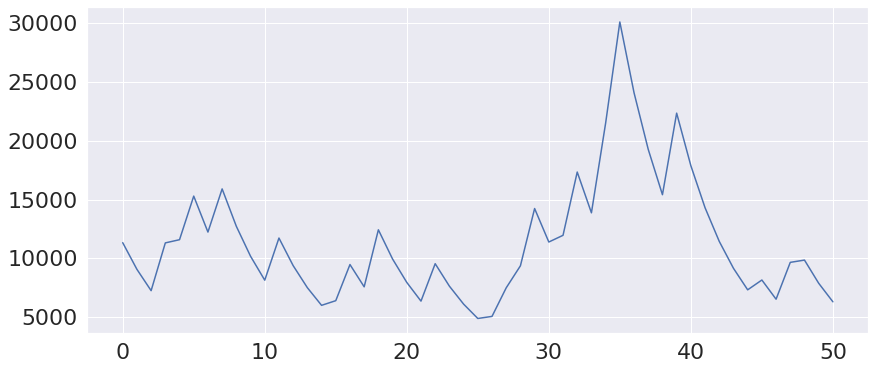

In [208]:
plt.figure(figsize=(14,6))
sns.lineplot(data =money_history)

In [209]:
money_history

[11340.0,
 9072.0,
 7257.6,
 11321.856000000002,
 11593.580544000002,
 15303.526318080005,
 12242.821054464004,
 15915.667370803207,
 12732.533896642566,
 10186.027117314054,
 8148.821693851243,
 11734.303239145791,
 9387.442591316632,
 7509.954073053306,
 6007.963258442645,
 6404.4888334998595,
 9478.643473579792,
 7582.914778863834,
 12435.980237336687,
 9948.784189869351,
 7959.027351895482,
 6367.221881516386,
 9550.83282227458,
 7640.666257819665,
 6112.533006255732,
 4890.026405004586,
 5066.067355584752,
 7497.779686265432,
 9372.224607831791,
 14245.781403904322,
 11396.625123123458,
 11966.45637927963,
 17351.361749955468,
 13881.089399964374,
 21515.68856994478,
 30121.963997922696,
 24097.57119833816,
 19278.056958670528,
 15422.445566936423,
 22362.546072057812,
 17890.03685764625,
 14312.029486117,
 11449.6235888936,
 9159.69887111488,
 7327.759096891905,
 8163.123633937582,
 6530.498907150066,
 9665.1383825821,
 9858.441150233743,
 7886.752920186995,
 6309.4023361495965]

In [211]:
plot_confusion_matrix(neuralmodel_2, X_test, y_test, display_labels=["1", "2", "3"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored



---



In [ ]:
#model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1]), keras.layers.Dense(units=1,input_shape=[1])])

In [ ]:
#model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
#model.fit(X, y, epochs=100)

In [ ]:
#print(model.predict([0]))

In [ ]:
kearas_file = "oddstest.h5"

In [ ]:
tf_lite_filename = "dfwinnerpredicttwo.tflite"

In [ ]:
converter = lite.TFLiteConverter.from_keras_model(neuralmodel_2)

In [ ]:
tfmodel = converter.convert()

In [ ]:
tfmodel_name = tf_lite_filename
open(tfmodel_name,"wb").write(tfmodel)

In [ ]:
tf.keras.models.save_model(neuralmodel, kearas_file)

# **TENSORFLOW (Két köztes réteg)**

---



https://www.youtube.com/watch?v=6_2hzRopPbQ&ab_channel=NicholasRenotte
https://www.youtube.com/watch?v=bqBRET7tbiQ&ab_channel=DigitalSreeni

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify = y)

In [ ]:
neuralmodelraw_3 = Sequential()
neuralmodelraw_3.add(Dense(units = 32, activation='relu', input_dim=X_train.shape[1]))
neuralmodelraw_3.add(Dense(units = 64, activation='relu'))
neuralmodelraw_3.add(Dense(3))
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

neuralmodelraw_3.compile(loss=loss, optimizer=optim, metrics=metrics)
print(neuralmodelraw_3.summary)

In [ ]:
neuralmodelraw_3.fit(X_train, y_train, verbose = 1, epochs=300, validation_data=(X_test, y_test))

In [ ]:
neuralmodel_3 = keras.models.Sequential([
                                             neuralmodelraw_3,
                                             keras.layers.Softmax()
])

In [ ]:
y_hat = neuralmodel_3.predict(X_test)
y_hat = pd.DataFrame(y_hat, columns = ['hometeam','draw','guest'])
for idx in y_hat.index: 
  if y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'draw'] and y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 1
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 1
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'draw']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 1

accuracy_score(y_test, y_hat)



---



In [ ]:
dfhelp = neuralmodel_3.predict(X)
dfhelp = pd.DataFrame(dfhelp, columns = ['Homepredodds','Drawpredodds','Guestpredodds'])
home = dfhelp['Homepredodds']

print(dfhelp['Homepredodds'].max())
print(dfhelp['Homepredodds'].min())
print(dfhelp['Drawpredodds'].max())
print(dfhelp['Drawpredodds'].min())
print(dfhelp['Guestpredodds'].max())
print(dfhelp['Guestpredodds'].min())

In [ ]:
df['PredictedHomeOdds'] = dfhelp['Homepredodds'].map(lambda x: 1/x).astype(float)
df['PredictedDrawOdds'] = dfhelp['Drawpredodds'].map(lambda x: 1/x).astype(float)
df['PredictedGuestOdds'] = dfhelp['Guestpredodds'].map(lambda x: 1/x).astype(float)

In [ ]:
df.head(10)

In [ ]:
#helyes oddsok kiszámolása
def correctodds(a, b, c, d):
    teljesesemenyter = 1/a + 1/b +1/c
    corrodds =1/((1/d) / teljesesemenyter)
    return corrodds

df = df.assign(CurrectHomeOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedHomeOdds))
df = df.assign(CurrectDrawOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedDrawOdds))
df = df.assign(CurrectGuestOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedGuestOdds))
df.head()

In [ ]:
money = 10000
money_history = []
for idx in range(50): 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'CurrectHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betdrawodds'] > df.loc[idx, 'CurrectDrawOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 0:
      betwin = 0.25 * money * df.loc[idx, 'betdrawodds']
    elif df.loc[idx, 'winner'] != 0:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betguestwinodds'] > df.loc[idx, 'CurrectGuestOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == -1:
      betwin = 0.25 * money * df.loc[idx, 'betguestwinodds']
    elif df.loc[idx, 'winner'] != -1:
      betwin = 0
    money = money + betwin
    money_history.append(money)

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data =money_history)

In [ ]:
money_history



---



In [ ]:
#model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1]), keras.layers.Dense(units=1,input_shape=[1])])

In [ ]:
#model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
#model.fit(X, y, epochs=100)

In [ ]:
#print(model.predict([0]))

In [ ]:
kearas_file = "oddstest.h5"

In [ ]:
tf_lite_filename = "dfwinnerpredictthree.tflite"

In [ ]:
converter = lite.TFLiteConverter.from_keras_model(neuralmodel)

In [ ]:
tfmodel = converter.convert()

In [ ]:
tfmodel_name = tf_lite_filename
open(tfmodel_name,"wb").write(tfmodel)

In [ ]:
tf.keras.models.save_model(neuralmodel, kearas_file)

# **TENSORFLOW (Egy köztes réteg,célréteg nem sigmoid hanem softmax)**

---



https://www.youtube.com/watch?v=6_2hzRopPbQ&ab_channel=NicholasRenotte
https://www.youtube.com/watch?v=bqBRET7tbiQ&ab_channel=DigitalSreeni

    //TODO https://github.com/tensorflow/tensorflow/issues/31688
    //elméletileg a tensorflow lite nem támogatja a sigmoid eljárást csak a relut
    //https://www.tensorflow.org/lite/guide/ops_compatibility

Modellfajták: https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify = y)

In [ ]:
neuralmodel_soft = Sequential()
neuralmodel_soft.add(Dense(units = 32, activation='relu', input_dim=X_train.shape[1]))
neuralmodel_soft.add(Dense(units = 3, activation='softmax'))

In [ ]:
neuralmodel_soft.compile(loss='mean_squared_error', optimizer='sgd',metrics='accuracy')
print(neuralmodel_soft.summary)

In [ ]:
neuralmodel_soft.fit(X_train, y_train, verbose = 1, epochs=400, validation_data=(X_test, y_test))

In [ ]:
y_hat = neuralmodel_soft.predict(X_test)
y_hat

In [ ]:
y_hat = pd.DataFrame(y_hat, columns = ['hometeam','draw','guest'])
y_hat.head()

In [ ]:
for idx in y_hat.index: 
  if y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'draw'] and y_hat.loc[idx, 'hometeam'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 1
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'draw'] > y_hat.loc[idx, 'guest']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 1
    y_hat.loc[idx, 'guest'] = 0
  elif y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'hometeam'] and y_hat.loc[idx, 'guest'] > y_hat.loc[idx, 'draw']:
    y_hat.loc[idx, 'hometeam'] = 0
    y_hat.loc[idx, 'draw'] = 0
    y_hat.loc[idx, 'guest'] = 1

In [ ]:
y_hat.head()

In [ ]:
accuracy_score(y_test, y_hat)



---



In [ ]:
dfhelp = neuralmodel_2.predict(X)
dfhelp = pd.DataFrame(dfhelp, columns = ['Homepredodds','Drawpredodds','Guestpredodds'])
home = dfhelp['Homepredodds']

print(dfhelp['Homepredodds'].max())
print(dfhelp['Homepredodds'].min())
print(dfhelp['Drawpredodds'].max())
print(dfhelp['Drawpredodds'].min())
print(dfhelp['Guestpredodds'].max())
print(dfhelp['Guestpredodds'].min())

In [ ]:
df['PredictedHomeOdds'] = dfhelp['Homepredodds'].map(lambda x: 1/x).astype(float)
df['PredictedDrawOdds'] = dfhelp['Drawpredodds'].map(lambda x: 1/x).astype(float)
df['PredictedGuestOdds'] = dfhelp['Guestpredodds'].map(lambda x: 1/x).astype(float)

In [ ]:
df.head(10)

In [ ]:
#helyes oddsok kiszámolása
def correctodds(a, b, c, d):
    teljesesemenyter = 1/a + 1/b +1/c
    corrodds =1/((1/d) / teljesesemenyter)
    return corrodds

df = df.assign(CurrectHomeOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedHomeOdds))
df = df.assign(CurrectDrawOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedDrawOdds))
df = df.assign(CurrectGuestOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedGuestOdds))
df.head()

In [ ]:
money = 10000
money_history = []
for idx in df.index: 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'CurrectHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betdrawodds'] > df.loc[idx, 'CurrectDrawOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 0:
      betwin = 0.25 * money * df.loc[idx, 'betdrawodds']
    elif df.loc[idx, 'winner'] != 0:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betguestwinodds'] > df.loc[idx, 'CurrectGuestOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == -1:
      betwin = 0.25 * money * df.loc[idx, 'betguestwinodds']
    elif df.loc[idx, 'winner'] != -1:
      betwin = 0
    money = money + betwin
    money_history.append(money)

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data =money_history)

In [ ]:
money_history



---



In [ ]:
#model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1]), keras.layers.Dense(units=1,input_shape=[1])])

In [ ]:
#model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
#model.fit(X, y, epochs=100)

In [ ]:
#print(model.predict([0]))

In [ ]:
kearas_file = "oddstest.h5"

In [ ]:
tf_lite_filename = "dfwinnerpredict.tflite"

In [ ]:
converter = lite.TFLiteConverter.from_keras_model(neuralmodel)

In [ ]:
tfmodel = converter.convert()

In [ ]:
tfmodel_name = tf_lite_filename
open(tfmodel_name,"wb").write(tfmodel)

In [ ]:
tf.keras.models.save_model(neuralmodel, kearas_file)

In [ ]:
traindf, valdf = train_test_split(df, test_size=0.1)

# **TRAIN TESZT KÉSZÍTÉS(GoalDiff)**

---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.info()

In [ ]:
cnames = list(df)
cnames

In [ ]:
#train test halmaz kiválasztása
X = df.loc[:,[
              'OverallRatingDiff',
              'AttackingRatingDiff',
              'MidfieldRatingDiff',
              'DefenceRatingDiff',
              'AverageAgeDiff',
              'DefenceWidthDiff',
              'DefenceDepthDiff',
              'OffenceWidthDiff',
              'bethomewinodds',
              'betdrawodds',
              'betguestwinodds'
              ]]
y = df.loc[:,['GoalDiff']]
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.size)
print(y_train.size)

In [ ]:
X_train.info()

# **TENSORFLOW (GoalDiff)**

---



https://www.youtube.com/watch?v=6_2hzRopPbQ&ab_channel=NicholasRenotte
https://www.youtube.com/watch?v=bqBRET7tbiQ&ab_channel=DigitalSreeni

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify = y)

In [ ]:
scaler_mm = MinMaxScaler()
#scaler_mm.fit(X)
X = scaler_mm.fit_transform(X)
X

In [ ]:
goaldiffmodel = Sequential()
goaldiffmodel.add(Dense(units = 32, activation='relu', input_dim=X_train.shape[1]))
goaldiffmodel.add(Dense(units = 64, activation='relu'))
goaldiffmodel.add(Dense(units = 1, activation='relu'))

In [ ]:
goaldiffmodel.compile(loss='mean_squared_error', optimizer='sgd',metrics='accuracy')
print(goaldiffmodel.summary)

In [ ]:
goaldiffmodel.fit(X_train, y_train, verbose = 1, epochs=400, validation_data=(X_test, y_test))



---



In [ ]:
df['PredictedHomeOdds'] = dfhelp['Homepredodds'].map(lambda x: 1/x).astype(float)
df['PredictedDrawOdds'] = dfhelp['Drawpredodds'].map(lambda x: 1/x).astype(float)
df['PredictedGuestOdds'] = dfhelp['Guestpredodds'].map(lambda x: 1/x).astype(float)

In [ ]:
df.head(10)

In [ ]:
#helyes oddsok kiszámolása
def correctodds(a, b, c, d):
    teljesesemenyter = 1/a + 1/b +1/c
    corrodds =1/((1/d) / teljesesemenyter)
    return corrodds

df = df.assign(CurrectHomeOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedHomeOdds))
df = df.assign(CurrectDrawOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedDrawOdds))
df = df.assign(CurrectGuestOdds=lambda x: correctodds(x.PredictedHomeOdds,x.PredictedDrawOdds, x.PredictedGuestOdds,x.PredictedGuestOdds))
df.head()

In [ ]:
money = 10000
money_history = []
for idx in df.index: 
  if df.loc[idx, 'bethomewinodds'] > df.loc[idx, 'CurrectHomeOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 1:
      betwin = 0.25 * money * df.loc[idx, 'bethomewinodds']
    elif df.loc[idx, 'winner'] != 1:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betdrawodds'] > df.loc[idx, 'CurrectDrawOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == 0:
      betwin = 0.25 * money * df.loc[idx, 'betdrawodds']
    elif df.loc[idx, 'winner'] != 0:
      betwin = 0
    money = money + betwin
    money_history.append(money)
  if df.loc[idx, 'betguestwinodds'] > df.loc[idx, 'CurrectGuestOdds'] :
    money = money * 0.8
    if df.loc[idx, 'winner'] == -1:
      betwin = 0.25 * money * df.loc[idx, 'betguestwinodds']
    elif df.loc[idx, 'winner'] != -1:
      betwin = 0
    money = money + betwin
    money_history.append(money)

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data =money_history)

In [ ]:
money_history



---



In [ ]:
#model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1]), keras.layers.Dense(units=1,input_shape=[1])])

In [ ]:
#model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
#model.fit(X, y, epochs=100)

In [ ]:
#print(model.predict([0]))

In [ ]:
kearas_file = "oddstest.h5"

In [ ]:
tf_lite_filename = "dfwinnerpredict.tflite"

In [ ]:
converter = lite.TFLiteConverter.from_keras_model(neuralmodel)

In [ ]:
tfmodel = converter.convert()

In [ ]:
tfmodel_name = tf_lite_filename
open(tfmodel_name,"wb").write(tfmodel)

In [ ]:
convert_bytes(get_file_size(tf_lite_filename), "Kb")

In [ ]:
tf.keras.models.save_model(neuralmodel, kearas_file)

In [ ]:
team.teamname = teamname
team.matches_played = matches_played
team.overall = overall
team.attackingRating = attackingRating
team.midfieldRating = midfieldRating
team.defenceRating = defenceRating
team.clubWorth = clubWorth
team.xIAverageAge = xIAverageAge
team.defenceWidth = defenceWidth
team.offenceWidth = offenceWidth
team.likes = likes
team.dislikes = dislikes
team.avgoals = avgoals
team.avconceded = avconceded
team.avgoalattempts = avgoalattempts
team.avshotsongoal = avshotsongoal
team.avshotsoffgoal = avshotsoffgoal
team.avblockedshots = avblockedshots
team.avpossession = avpossession
team.avfreekicks = avfreekicks
team.avGoalDiff = avGoalDiff
team.avwins = avwins
team.avdraws = avdraws
team.avlose = avlose

In [ ]:
append/3
append/2
member/2
memberchk/2
select/3
reverse/2
nth0/3
nth1/3
sumlist/2
last/2,
sort/2
between/3
findall/3
bagof/3
setof/3

In [ ]:
models_x = ['T1-100','T1-200','T1-300','T1-400','T1-500','T2-200','T2-300','T2-400','T3-200','T2-300','T2-400']
value_y = [
0.536,
0.546,
0.55,
0.56,
0.55,

0.5477,
0.552,
0.554,

0.513,
0.524,
0.508
]
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)
ax = sns.barplot(x=models_x, y = value_y,ci=None)
ax.set_xlabel("Modell",fontsize=20)
ax.set_ylabel("Pontosság",fontsize=20)